<br>

# <center>Tabular Data Science Course, Bar-Ilan University</center>
## <center><b>TDS Project, Part 2 - Advanced Model Analysis, Optimization and Conclusions

### Submitted to: <b>Dr. Amit Somech & Itay Elyashiv</b>

#### Submitted by: Yoav Yoscovich

# Introduction & Objective:
Based on the extensive error analysis & EDA that was conducted and presented as part of [<b>part 1 of this project</b>](https://github.com/YoavYoscov/TabularDataScience/blob/main/Ex1YoavYoscovich.ipynb), I explored various enhancements and adjustements that may be applied to the pipeline in order to improve model's performance by addressing identified weaknesses.
In this work, I will present the most useful adjustements and pipeline modifications.
<br><br>
### A brief reminder - dataset overview:
As a dataset suited for a <b>regression</b> problem (rather than a classification problem), meeting the criteria specified in the assignment guidelines, I chose [<b>the largest diamond dataset currently available on Kaggle</b>](https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle/data). As detailed in part 1 of the project, this dataset meets the criteria defined in the assignment guidlines. The dataset includes:

- **Number of Records (rows)**: 219,703
- **Number of Attributes (features)**: 25
- **Attribute names and types**:
This dataset includes **7 numeric features** and **18 categorial features**, detailed below:
    - **Numeric Features**: carat_weight, depth_percent, table_percent, meas_length, meas_width, meas_depth and <b><i>total_sales_price</i> (the diamond price, which I selected as the target feature)</b>.
    - **Categorical Features**: cut, color, clarity, cut_quality, lab, symmetry, polish, eye_clean, culet_size, culet_condition, girdle_min, girdle_max, fluor_color, fluor_intensity, fancy_color_dominant_color, fancy_color_secondary_color, fancy_color_overtone, fancy_color_intensity.
<br><br>

# 1. Error Analysis Conclusions & Work Plan
### <b><u>Error Analysis Conclusions</u></b>:
I will present below the workplan - the steps I am going to perform in order to address weaknesses which I have identified in the model, based on the error analysis; before I will perform each step, I will show relevant plots & calculations and explain in details how that specific step stems from the error analysis. But before that, as instructed according to the assignment guidelines, I will first present an overall summary of the error analysis conclusions from part 1 of the project:<br>
<ol>
    <li>
        <b><u>On which items does the model perform the best or the worst</u></b>?<br>
        As presented in the error analysis presented in part 1 of the project, we have seen that this question could be intrepreted in <u>two ways</u>: either as by <b>looking at the error value</b> or by <b>looking at the error in percents:</b>
        <br>
        <ul>
            <li>
                <b>When looking at the error value</b>: based on 3 visualizations and calculations, we have seen that when looking at errors values, <b>they increase as the diamond price increases</b>. This conclusion was based both on a plot of <b>Residuals value vs. predicted diamond price</b>, where could see that the bigger mistakes are when the diamond prices are larger (very expensive diamonds), and also by <b>analyzing the RMSE score which our model gets, and comparing it to the MAE score</b> (the RMSE score was more than 825% higher than the MAE score for our model; and since RMSE squares the errors, making large errors more significant, while MAE treats all errors linearly, this means there are larger errors in the model's predictions).
            </li>
            <br>
            <li>
                <b>When looking at the error in percents</b>: based on 2 visualizations and calculations, we have seen that when looking at errors in percents of the price, <b>they increase as the diamond price decreases</b>. This conclusion was based both on a plot of <b>residuals of the model in percents</b> (where we could see that the more significant residuals in percents are around the lower values of the target variable), and also by <b>analyzing the MAE score which our model gets</b> (it was explained that while the MAE score ($1141) is 16.5% of the mean diamond price ($6908), which is not ideal but not really terrible, in fact - <b>the MAE score is 58% of the median price</b> ($1970). This is unacceptable, as most of the diamonds are near the median, and not very expensive, relatively speaking).
            </li>
        </ul>
    </li>
    <br>
    <li>
        <b><u>Examining the percentage error of our model</u></b>:<br>
        We saw that our model achieved low estimation error (<b>error less than 5%</b>) 28.23% of the time; achieved quite high estimation error (<b>error more than 20%</b>) 19.22% of the time; and achieved a very high estimation error (<b>error more than 30%</b>) 8.75% of the time. This is not bad, but there is definitely room for improvement.
    </li>
    <br>
    <li>
        <b><u>Is the model mostly overestimating or Underestimating?</u></b><br>
        As presented in the error analysis presented in part 1 of the project, we have seen that this question could be intrepreted in <u>two ways</u>: either as by <b>looking at the <u>"sum of error"</u></b> or by <b>looking at the <u>number of times</u> the model overestimates and underestimates the diamond price</b>.
        <br><br>
        <ul>
            <li>
                <b>When looking at the "sum of error"</b>: we can see that the model is underestimating the total price of diamonds by $2,070,996. In other words, looking at the sum of prices, our model is predicting prices that are <u>lower</u> than the real prices of the diamonds. Moreover, this means that <i>the sum of residuals is only about 0.68% of the total sum of the prices of all diamonds in the test set</i> (percent of underestimation), which is not bad at all. 
            </li>
            <br>
            <li>
                <b>When considering the <i>the number of times</i> the model overestimates and underestimates the diamond price</b>: from the pie chart presented in part 1 of the project, we could see that the model <i>slightly</i> tends to <u>overestimate</u> the diamond price more often than it underestimates it (52.8% vs. 47.2%); the difference is very small, and overall we can definitely say that in terms of counting the number of underestimations vs. the number of overestimations, the model is <u>well-balanced</u>.
            </li>
    </li>
    <br>
    <li>
        <b><u>Are some features sabotaging the model?</u></b><br>
        This was a prominent section in the error analysis conducted in the first part of this project; <bb>and we will see later on that based on the information we could conclude from that section - we could use it to <b>remove 8(!) "sabotaging features"</b>, which has dramatically improved the R^2 and RMSE scores of the model!</b> I will present the relevant plots and calculations later on during step 5 of the workplan, but now I will note the main themes of this analysis:
        <ul>
            <li>
                <b>Using <i>SHAP values</i> and the <i>beeswarm</i> plot:</b> we could observe that when the carat_weight is high (red color), it makes the model think that the diamond price will be much higher. This is a positive impact on the model; when the carat_weight is low (blue color), it makes the model think that the diamond price will be lower (but it doesn't have a big impact on the model as it has when the carat_weight is high). Similarly, we could see that when the 'meas_length' or the 'meas_width' are high (red color), it makes the model think that the diamond price will be higher. Same as with the 'meas_depth' feature etc.
            </li>
            <li>
                <b>By analyzing the model's worst prediction using a <i>waterfall plot</i> of the SHAP values</b>: we could see the contribution of each feature to the prediction, and how each feature affects the prediction, helping us understand why the model made such a bad prediction. As presented in the first part of the project, for this worst prediction (with the biggest relative error), our model predicted a price of: $18,626.479, while the real price is: $1,014, <b>which means an error percentage of 1736.93%</b>. One of the best conclusions that may be drawn from that plot is that the <u>'depth_percent'</u> feature was adding $7055.51 to the predicted price of that diamond, <u>but the correlation between it to the target feature is just 0.03</u>.</b> This information will be used in step 5 of this work, to enhance model's performance.
            </li>
        </ul>
    </li>
</ol>
<br>

> Another point I would like to highlight before moving on is step 3: <b>Feature Engineering - Dealing with the anomaly associated with <i>SI3 clarity level</i></b>. <u>In my opinion, this is the <b>most interesting part in this project</b></u>, since it highlights the connection between meaningful conclusions that have been drawn during the EDA & error analysis, and how they lead to performing a technique for addressing the indentified issue, leading to a dramatic improvement of the model's fairness and usability in real-world terms (see the explanation in step 3).
<br>

Now, after highlighting some of the prominent results of the error analysis, I will move on to describe the workplan for this part of the project:
<br><br>



### <b><u>Workplan</u>: What relevant enhancements are planned to be applied in order to address the identified weaknesses?</b>
In this work, I will present the most useful adjustements and pipeline modifications to enhance model's performance; <i> I have also tested other adjustements and pipeline changes, but to keep the notebook clear and concise, I will present only the most meaningful ones</i>. According to the instructions of the assignment, we were advised to test performing 4 types of techniques; <b>In this work, I will perform 6 techniques to enhance model's performance</b>, which can be divided into the categories defined in the assignment instructions as follows:
<ul>
    <li>
        <b><u>Feature Engineering</u></b>:
        <ol>
            <li>
                <b>Removing 8 sabotaging features</b>:
                One of the prominent techniques I will perform as part of Feature Engineering is Feature Selection; in this step, I will remove features which are <i><u>counterproductive</u></i> to the model's performance. To make this step clearer and more organized, I divided this step into substeps, where each time I will focus on a specific feature, explain based on the <i>Error Analysis</i> why it is counterproductive; then, I will remove these counterproductive features, retrain the model, and see whether its performance has improved.<br>
                The 8 features I will remove are:
                <ul>
                    <li>depth_percent</li>
                    <li>table_percent</li>
                    <li>girdle_max</li>
                    <li>girdle_min</li>
                    <li>symmetry</li>
                    <li>lab</li>
                    <li>fancy_color_overtone</li>
                    <li>fancy_color_secondary_color</li>
                </ul>
            </li>
            <li>
                <b>Ordinal Encoding for categorical features having a meaningful order - preserving inherent ordering</b>:
                As observed and mentioned as part of part 1 of this project, <b>more than 70%</b> of the features in this dataset are categorical; as we have learned in class, while plenty of datsets include categorical features, many models, including XGBoost which is used in this work, expect numerical input features. To deal with this issue, the most straightforward solution is applying <b><i>One-Hot-Encoding</i></b> on categorical features, creating new boolean features for each category in the original categorical feature; each category in the original column is represented as a separate column, where a value of True indicates the presence of that category, and False indicates its absence. In part 1, I have used One-Hot-Encoding as part of the baseline pipeline. As part this work, I will identify features appropriate to perform <b>Ordinal Encoding</b> on them (rather than One-Hot-Encoding); as will be explained below, this will have several benefits, including retaining the ordinal information that is lost with one-hot encoding and reducing the numbers of features in the model (less features created as a result of One-Hot-Encoding).
            </li>
            <br>
            <li>
                <b>Dealing with the anomaly associated with <i>SI3 clarity level</i></b>:
                <u>In my opinion, this is the most interesting observation in this work</u>. In fact, it is of enormous importance in terms of allowing the model to be used by real users, and will help avoid false pricing by various sellers in the market.
                This observation stems from visualization #3 presented in part 1 of this project; as presented there, when neutrilizing the trade-off for the customer between diamonds with better clarity level, while having smaller carat_weight (or vice versa), and exploring the median diamond price PER CARAT, the diamond price increases as the clarity level improves. However, as also noted by the assignment reviewer, the visualization presented there brought up an anomaly- the median diamond price per carat for SI3 Clarity level is -68.49 % lower than the overall median diamond price per carat. As will be detailed below, after exploring various possible reasons for this matter, <b>I found out that this anomaly is deeply rooted in real-world professional dispute regarding this clarity level</b>; it turns out that although this clarity level (SI3) has been introduced by the European Gemological Laboratory (EGL), it is NOT recognized globally as part of the GIA Diamond Grading Scale, and <a href="https://willyou.com/buying-guides/4cs/clarity/si3"><b>considered "misleading for inexperienced shoppers"</b></a>. In this work, I will address this issue, ensuring fair pricing for every diamond, also for SI3 clarity level diamonds, in a way that allows the model to be used for real-world needs.
            </li>
        </ol>
    </li>
    <li><b><u>Hyperparameter Tuning</u>:<br>
        <ol>
            <li value="4">
                Tuning 4 hyperparameters</b>: As will be shown below, eventually in this step I will perform hyperparameter tuning for 4 hyperparameters, improving model's performance</b>. Instead of only doing trial and error or only using tools like <i>GridSearchCV</i>, to make the process more efficient and more data-science oriented, we can use these tools more wisely by first analyzing the <b><u>Loss-Curve Plot</u></b> to guide our hyperparameter tuning process. The 4 hyperparameters I will tune are:
                <ul>
                    <li>Learning Rate.</li>
                    <li>n estimators.</li>
                    <li>L1 regularization ('reg_alpha').</li>
                    <li>L2 regularization ('reg_lambda').</li>
                </ul>
            </li>
        </ol>
    </li>
    <li>
        <b><u>Handling missing data or outliers effectively</u></b>:
        <ol>
            <li value="5">
                <b>Handling missing data by using Predictive Imputation:</b> I have trained a model to predict the missing values of certain features in the dataset. Some featuers are highly correlated between one to another, enabling filling missing values more wisely rather than using simple techniques such as filling the mean/median value, deleting these entries, etc. It is important to note, as will be detailed below, that in order to avoid data leakage, <u>I have trained the predictive imputation model only based on the TRAINING data, and not on the test data</u>. Only then I apply the predictive model on the test set.
            </li>
        </ol>
    </li>
    <li>
        <b><u>Balancing data for fairness or model accuracy</u></b>:
        <ol>
            <li value="6">
                <b>Applying Box-Cox Transformation (with lambda=0.65, close to a square-root transformation) on the target variable (diamond price):</b> trying this technique in our dataset is deeply rooted in conclusions drawn in <i>visualization #1</i> presented in part 1 of this project, as well as from the error analysis conducted (especially, from the graph <i>"Residuals of the Model in Percentage (%) as a function of the Actual Diamond Price"</i> presented there). As can be observed from visualization #1, the diamond prices are <b>heavily right-skewed</b>, so based on what we have learned in class, I assumed that applying a <b><i>sub-linear</i> transformation</b> on the target variable would address this issue, "compress" extraordinary expensive diamond prices (dealing with extreme outliers), making the model more robust. Indeed, we will see that applying such a transformation significantly improves the model's performance. As will be explained later, this transformation is ideal - not too much non-linear as log (which resulted in worse results), but <b>a square-root-like transformation</b>, which has a better balance of <b>minimizing relative errors</b> (such as <i>MAPE</i> and <i>MAE</i>) resulting from large outliers while still maintaining good results for absolue errors (<i>R^2</i> and <i>RMSE</i>) due to better linearity relationship between the features and the target.<br>
            </li>
        </ol>
    </li>

</ul>

In this assignment, I will implement each of these techniques, explain how each of them addresses a weakness in the initial baseline model, and how it stems from the error analysis.
<br>
Although most of these techniques involve several actions and features, to make the model improvement process clearer and more organized, I will summarize each technique and assign it with a number, in order to provide a <u>step-by-step workplan</u>, as follows:
<ul>
    <li><b><u>Step 1</u>: Feature Engineering - Ordinal Encoding for categorical features having a meaningful order - preserving inherent ordering</b>.</li><br>
    <li><b><u>Step 2</u>: Handling missing data by using Predictive Imputation</b>.</li><br>
    <li><b><u>Step 3</u>: Feature Engineering - Dealing with the anomaly associated with <i>SI3 clarity level</i></b>.</li><br>
    <li><b><u>Step 4</u>: Feature Engineering - Removing 8 sabotaging features</b>.</li><br>
    <li><b><u>Step 5</u>: Hyperparameter Tuning</b>.</li><br>
    <li><b><u>Step 6</u>: Balancing data for fairness or model accuracy - Applying <i>Box-Cox Transformation</i> (with <i>lambda=0.65</i>, close to a square-root transformation) on the target variable (diamond price)</b>.</li><br>
</ul>

## Dataset Loading:

Note: according to the assignment guidelines, we should include a requirements.txt file <i>"if you use non trivial packages (not introduced in class)"</i>.
<br><u>I haven't used any non-trivial packages</u>; however, to be on the safe side, I also included a requirements.txt file.
<br>
To install the required dependencies, run:
```
pip install -r requirements.txt
```
Importing all the libraries used in this notebook:

In [144]:
# Data Processing
import pandas as pd
import numpy as np

# Data Visualizations
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

%matplotlib inline

# Machine learning library
# Importing xgboost and the evaluation metrics:
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

# I use the 'itertools' library to generate all possible combinations of features, used later on in the assignment.
from itertools import combinations

# Importing the train_test_split function from the sklearn.model_selection module, to split the data into training and testing sets.
from sklearn.model_selection import train_test_split

# SHAP library enables us to understand the importance of each feature in the model, widely used in section 4 of the assignment.
import shap

# Importing the stats module from the scipy library, I will use it for linear regression line & for calculating Spearman's rank correlation coefficient.
from scipy import stats
import statsmodels.api as sm

# For the Random Forest model (used for predictive imputation - filling missing values):
from sklearn.ensemble import RandomForestClassifier

# For Ordinal Encoding:
from sklearn.preprocessing import OrdinalEncoder

# For Hyperparameter Tuning:
from sklearn.model_selection import GridSearchCV




### Loading the CSV dataset:

In [145]:
dtf = pd.read_csv("./data/diamonds.csv",index_col=0)

In [146]:
# Now I create a dtf, consisting of the detailed columns:
cols = ["cut","color","clarity", "carat_weight", "cut_quality", "lab", "symmetry", "polish", "eye_clean", "culet_size", "culet_condition", "depth_percent", "table_percent", "meas_length", "meas_width", "meas_depth",
        "girdle_min", "girdle_max", "fluor_color", "fluor_intensity", "fancy_color_dominant_color", "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity", "total_sales_price"]
dtf = dtf[cols]

### Reference
Before moving on to the model improvements, I'll provide a reference to the dataset which I selected and also a reference to part 1 of the project:
> **Reference**: [<b>the largest diamond dataset currently available on Kaggle</b>](https://www.kaggle.com/datasets/hrokrin/the-largest-diamond-dataset-currely-on-kaggle/data).
<br>
> **Reference**: [<b>Part 1 of this project</b>](https://github.com/YoavYoscov/TabularDataScience/blob/main/Ex1YoavYoscovich.ipynb).
---

# 2. Improving Model Performance
As we were instructed according to the email sent on January 9th 2025, we should perform a "before vs. after" examination for each improvement we present; therefore, before addressing the identified weaknesses and applying the relevant enhancements to the pipeline, I will start by presenting the baseline performance - that is the model's performance using the baseline pipeline I have used in part 1 of the project:


### <b><u>Preliminary Step</u>: Recall the performance of the original model, using the baseline pipeline from part 1 of the project</b>:

In [147]:
# The baseline pipeline:
# First of all, as we did in class, we divide the data into training and testing sets:
# Using 80% of the data for training and 20% for testing, and setting a random seed for reproducibility (we want to get the same results every time we run the code, and I saw that it is a common value to use):
dtf_train, dtf_test = train_test_split(dtf, test_size=0.2, random_state=42)

# Filling missing values with "unknown" for the "fluor_intensity" and "fancy_color_overtone" columns:
dtf_train["fluor_intensity"] = dtf_train["fluor_intensity"].fillna("unknown")
dtf_test["fluor_intensity"] = dtf_test["fluor_intensity"].fillna("unknown")

# Filling missing values with "unknown" for the "fancy_color_overtone" column:
dtf_train["fancy_color_overtone"] = dtf_train["fancy_color_overtone"].fillna("unknown")
dtf_test["fancy_color_overtone"] = dtf_test["fancy_color_overtone"].fillna("unknown")


# Taking only the categorial columns (we can find them by selecting the columns with the type 'object'):
categorialCols = dtf.select_dtypes(include=['object']).columns

# Taking the categorial columns which are defined as categorial in the dataset description on Kaggle:
cols = ["cut","color", "clarity","cut_quality", "lab", "symmetry", "polish", "eye_clean", "culet_size", "culet_condition", "girdle_min", "girdle_max", "fluor_color", "fluor_intensity", "fancy_color_dominant_color",
        "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity"]

# 'cols' are the categorial columns that we want to convert to dummy columns:
# So, now we use the code presented in class, and convert each such categorial feature to dummy columns and add them to the dataframe:
for col in cols:
    dummy_train = pd.get_dummies(dtf_train[col], prefix=col)
    dtf_train = pd.concat([dtf_train, dummy_train], axis=1)
    dtf_train = dtf_train.drop(col, axis=1)
    
    dummy_test = pd.get_dummies(dtf_test[col], prefix=col)
    dtf_test = pd.concat([dtf_test, dummy_test], axis=1)
    dtf_test = dtf_test.drop(col, axis=1)

# Removing from the train set these columns which are in the training set but not in the test set:
missingCols = [x for x in dtf_train.columns if x not in dtf_test.columns]
dtf_train = dtf_train.drop(missingCols, axis=1)


# Separating X from y (X are the features, y is the target variable):
X_train_OriginalPipeline = dtf_train.drop('total_sales_price',axis=1)
X_test_OriginalPipeline = dtf_test.drop('total_sales_price',axis=1)

y_train = dtf_train['total_sales_price']
y_test = dtf_test['total_sales_price']
y_test_OriginalPipeline = y_test.copy()

# Initializing the XGBoost regressor model:
xgb_model_OriginalPipeline = XGBRegressor()

# Training the model on the training data (fitted to the training data):
xgb_model_OriginalPipeline.fit(X_train_OriginalPipeline, y_train)

# Now, we can make predictions on the test data:
prediction_OriginalPipeline = xgb_model_OriginalPipeline.predict(X_test_OriginalPipeline)

# Evaluating the model using the evaluation metrics we have imported above:
xgb_r2_originalPipeline = r2_score(y_test, prediction_OriginalPipeline)
xgb_mape_originalPipeline = mean_absolute_percentage_error(y_test, prediction_OriginalPipeline)
xgb_mae_originalPipeline = mean_absolute_error(y_test, prediction_OriginalPipeline)
xgb_rmse_originalPipeline = np.sqrt(mean_squared_error(y_test, prediction_OriginalPipeline))

# Print the evaluation metrics
print(f"R^2 Score: {xgb_r2_originalPipeline:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape_originalPipeline:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae_originalPipeline:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_originalPipeline:.0f}")



R^2 Score: 0.856
Mean Absolute Percentage Error (MAPE): 0.145
Mean Absolute Error (MAE): 1141
Root Mean Squared Error (RMSE): 10567


Above we can see the performance of the model using the baseline pipeline; I will use these values for performing "before vs. after" examination after each technique I will perform to address weaknesses in the initial baseline model.
<br>
Now, we can move on to addressing weaknesses in the baseline pipeline, and applying suitable techniques to deal with them:

----


### <b><u>Step 1</u>: Feature Engineering - Ordinal Encoding for categorical features having a meaningful order - preserving inherent ordering</b>.<br>
As observed and mentioned as part of part 1 of this project, <b>more than 70%</b> of the features in this dataset are categorical; as we have learned in class, while plenty of datsets include categorical features, many models, including XGBoost which is used in this work, expect numerical input features. To deal with this issue, the most straightforward solution is applying <b><i>One-Hot-Encoding</i></b> on categorical features, creating new boolean features for each category in the original categorical feature; each category in the original column is represented as a separate column, where a value of True indicates the presence of that category, and False indicates its absence. In part 1, I have used One-Hot-Encoding as part of the baseline pipeline. This technique was also used in [<b>the introduction example demonstrated in class</b>](https://github.com/amitsomech/TDS-COURSE/tree/master/1.%20Introduction).
<br><br>
To enhance the model's performance, below I will identify features appropriate to perform <b>Ordinal Encoding</b> on them (rather than One-Hot-Encoding).
Applying in the right cases Ordinal Encoding, rather than One-Hot-Encoding, has several benefits, including:
<ol>
    <li><b>Retaining the ordinal information between categories that is lost with one-hot encoding</b>. For example, if we have a categorical coulumn with two categories "blue" and "yellow", One-Hot-Encoding is appropriate to use; however, if the two categories were "good" and "very good", if we just do One-Hot-Encoding, this will result in creating two columns, 'isGood' and 'isVeryGood', but the original meaning that Very Good is better than Good will be lost. By performing Ordinal Encoding, and for example assigning 'Good' the value 1 and 'Very Good' the value 2, we preserve the natural quality ranking, without losing information.</li>
    <li><b>Reduced Dimensionality - reducing the numbers of features in the model</b>: if we do One-Hot-Encoding also on features which are suitable for Ordinal Encoding, this will result in having more features, since One-Hot-Encoding creates a new feature for each category of the original categorical column, increasing the <i>feature space</i> (as we learned in ML course last year), whereas Ordinal Encoding represents categorical values with only a single column.</li>
    <li><b>Ordinal is usually preferred when using <u>Tree-Based Models</u> (e.g. XGBoost, as in our case)</b>: such models can benefit from ordinal encoding for ordinal features because they make binary splits based on the feature values (<a href="https://machinelearningmastery.com/decision-trees-and-ordinal-encoding-a-practical-guide/#:~:text=Tree%2Dbased%20models%2C%20which%20include,based%20on%20the%20feature%20values.">source I read about it from</a>).</li>
    <li><b>Computational Efficiency</b>: since ordinal encoding uses only one column instead of one-per-category, this results in consuming less memory and faster model training.</li>
</ol>

Since this technique is part of the Data Cleaning & Preprocessing stage, I will perform it alongside with the other necessary steps required as part of this stage (e.g. One-Hot-Encoding for other columns):
#### Data Cleaning and Preprocessing:

In [148]:
# First of all, as we did in class, we divide the data into training and testing sets:
# Using 80% of the data for training and 20% for testing, and setting a random seed for reproducibility (we want to get the same results every time we run the code, and I saw that it is a common value to use):
dtf_train, dtf_test = train_test_split(dtf, test_size=0.2, random_state=42)

**Filling null values**:
<br>
First, let's find out which columns have null values, and how much null values are present:

In [149]:
# Printing the number of missing values (for each column) in the training set:
dtf_train.isna().sum()

cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                114699
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1311
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

As we can see above, there are missing values in two columns:
- The "flour_intensity" column: contains 114,699 missing values.
- The "fancy_color_overtone" column: contains 1,311 missing values.
<br><br>
As we have learned in class, there are multiple approaches regarding how to deal with missing values (e.g. delete the relevant rows, filling with the mean value etc.).
In our case, the missing values are in categorial columns; in addition, as we saw in part 1 of this project, both these columns already have a categorial value of "unknown", so we will fill the missing values with "unknown" to remain consistent (one of the next steps which I will perform trying to improve model's performance is filling missing values using predictive imputation, but this is not the current step - one step at a time):

In [150]:
# Filling missing values with "unknown" for the "fluor_intensity" and "fancy_color_overtone" columns:
dtf_train["fluor_intensity"] = dtf_train["fluor_intensity"].fillna("unknown")
dtf_test["fluor_intensity"] = dtf_test["fluor_intensity"].fillna("unknown")

# Filling missing values with "unknown" for the "fancy_color_overtone" column:
dtf_train["fancy_color_overtone"] = dtf_train["fancy_color_overtone"].fillna("unknown")
dtf_test["fancy_color_overtone"] = dtf_test["fancy_color_overtone"].fillna("unknown")

In [151]:
# Verifying that there are no missing values in the training set (after we have filled the missing values):
print(dtf_train.isna().sum())

cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64


<b>Now, we can perform the Ordinal Encoding on both the 'polish' and 'cut_quality' features</b>.
<br>
First, we will inspect which values appear in the 'polish' column and how frequent each one is:

In [152]:
# Printing distribution of values for 'polish' column: in %:
print(dtf_train["polish"].value_counts(normalize=True)*100)

polish
Excellent    79.985435
Very Good    19.297687
Good          0.712327
Fair          0.003983
Poor          0.000569
Name: proportion, dtype: float64


We can see that the 5 unique values of the 'polish' column <b>reflect an order of quality - from the worst ('Poor') to the best ('Excellent'); <u>this is appropriate for Ordinal Encoding</u></b>: 'Poor' will get value of 0 and the values will increase until the value of 4 for 'Excellent'. 
<br>
Let's also inspect which values appear in the 'cut_quality' column and how frequent each one is:

In [153]:
# Printing distribution of values for 'cut_quality' column: in %:
print(dtf_train["cut_quality"].value_counts(normalize=True)*100)


cut_quality
Excellent    56.903654
unknown      27.542927
Very Good    15.536350
Good          0.013655
Fair          0.002845
Ideal         0.000569
Name: proportion, dtype: float64


Now, I will perform the Ordinal Encoding for both the 'polish' and 'cut_quality' features:

In [154]:
# Doing Oridnal Encoding to the 'polish' feature:
# I need to list separately the 'polish' and 'cut_quality' categorical columns, because they have different scales (until 'Ideal' or just until 'Excellent'...):
ordinal_columns_PoorToExcellent = ['polish']
ordinal_columns_FairToIdeal = ['cut_quality']

# For the 'polish' column:
for col in ordinal_columns_PoorToExcellent:
    # Initializing the Ordinal Encoder with the categories in the correct order and using it:
    encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']])    
    dtf_train[col] = encoder.fit_transform(dtf_train[[col]])
    dtf_test[col] = encoder.transform(dtf_test[[col]])

# For the 'cut_quality' column:
for col in ordinal_columns_FairToIdeal:
    # Initializing the Ordinal Encoder with the categories in the correct order and using it:
    encoder = OrdinalEncoder(categories=[['unknown', 'Fair', 'Good', 'Very Good', 'Excellent', 'Ideal']])    
    dtf_train[col] = encoder.fit_transform(dtf_train[[col]])
    dtf_test[col] = encoder.transform(dtf_test[[col]])

To verify that the Ordinal Encoding has completed successfully, I will print the unique values of this column, to verify that they indeed changed:<br>
For the 'polish' feature:

In [155]:
# Printing the distinct values of the 'polish' column:
print(np.sort(dtf_train["polish"].unique()))

[0. 1. 2. 3. 4.]


Indeed, we can see that now there are 5 unique values of this column, representing the ordinal encoding of the 'polish' feature.<br>
And for the 'cut_quality' feature:

In [156]:
# Printing the distinct values of the 'cut_quality' column:
print(np.sort(dtf_train["cut_quality"].unique()))

[0. 1. 2. 3. 4. 5.]


Indeed, we can see that now there are 6 unique values of this column, representing the ordinal encoding of the 'cut_quality' feature.
#### Now, we move on to deal with the rest of the categorial columns (which are not suitable for Ordinal Encoding), applying One-Hot-Encoding to them.
<b>"One-Hot-Encoding" for the rest of the categorical variables:</b> To remain consistent with what we have learned in class, I will use an adaptation of the code from the class to work with multiple categorial columns.
<br>
> **Note:** we do NOT apply One-Hot-Encoding to columns which we have already encoded using Ordinal Encoding, only to other categorical columns.


In [157]:
# Taking only the categorial columns (we can find them by selecting the columns with the type 'object'):
categorialCols = dtf.select_dtypes(include=['object']).columns

# Taking the categorial columns which are defined as categorial in the dataset description on Kaggle:
cols = ["cut","color", "clarity","cut_quality", "lab", "symmetry", "polish", "eye_clean", "culet_size", "culet_condition", "girdle_min", "girdle_max", "fluor_color", "fluor_intensity", "fancy_color_dominant_color",
        "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity"]

# Checking whether the columns in the list "cols" are the same as the categorial columns detected:
if set(cols) == set(categorialCols):
    print("Verified that 18 categorial columns are detected, as written in the dataset description on Kaggle.")

Verified that 18 categorial columns are detected, as written in the dataset description on Kaggle.


In [158]:
# Now, we REMOVE all the categorial columns we have already encoded using Ordinal Encoding:
alreadyOrdinalEncodedCols = ["polish", "cut_quality"]
for col in alreadyOrdinalEncodedCols:
    cols.remove(col)

# 'cols' are the categorial columns that we want to convert to dummy columns:
# So, now we use the code presented in class, and convert each such categorial feature to dummy columns and add them to the dataframe:
for col in cols:
    dummy_train = pd.get_dummies(dtf_train[col], prefix=col)
    dtf_train = pd.concat([dtf_train, dummy_train], axis=1)
    dtf_train = dtf_train.drop(col, axis=1)
    
    dummy_test = pd.get_dummies(dtf_test[col], prefix=col)
    dtf_test = pd.concat([dtf_test, dummy_test], axis=1)
    dtf_test = dtf_test.drop(col, axis=1)
    

#### At that point, it is important to make sure that the train and test sets have the same number of columns after applying One-Hot-Encoding to the categorial columns, otherwise the model will not be able to make predictions on the test set.
The problem may arise if the train and test sets have different values in the categorial columns, which will result in different dummy columns being created for the train and test sets.
<br>
It should be noted that in other implementations of One-Hot-Encoding, this problem is already taken care of, but I sticked to the code presented in class, so I will add below code dealing with this issue.

In [159]:
# We check whether the train and test sets have the same number of columns after converting the categorial columns to dummy columns, doing One-Hot-Encoding to the categorial columns:
if len(dtf_train.columns) == len(dtf_test.columns):
    print("The train and test sets have the same number of columns after applying One-Hot-Encoding to the categorial columns.")
else:
    print("The train and test sets have different number of columns after applying One-Hot-Encoding to the categorial columns.")
    print("Num of columns in the train set is:", len(dtf_train.columns), ". The num of columns in the test set is:", len(dtf_test.columns))


The train and test sets have different number of columns after applying One-Hot-Encoding to the categorial columns.
Num of columns in the train set is: 143 . The num of columns in the test set is: 137


So, we understand that there are less 143 columns in the train set, but only 137 columns in the test set.
<br>
This does not necessarily mean that there are 6 more columns in the train set; maybe some columns appear only in the train set, but some appear only in the test set. Therefore, I will check whether this is the case:

In [160]:
# We print the columns which appear in the training set, but do not appear in the test set:
cols_only_in_train = [x for x in dtf_train.columns if x not in dtf_test.columns]
print("columns which appear in the training set, but do not appear in the test set:", cols_only_in_train)

# We print the columns which appear in the test set, but do not appear in the training set:
cols_only_in_test = [x for x in dtf_test.columns if x not in dtf_train.columns]
print("columns which appear in the test set, but do not appear in the training set:", cols_only_in_test)


columns which appear in the training set, but do not appear in the test set: ['culet_size_EL', 'culet_size_VL', 'girdle_max_STN', 'fancy_color_dominant_color_Other', 'fancy_color_secondary_color_Red', 'fancy_color_overtone_Grayish']
columns which appear in the test set, but do not appear in the training set: []


From the results of the code cell above, we can clearly see that there are 6 columns which appear in the train set, but not in the test set.
<br>
On the other hand, as we have verified in the code cell above, there are no columns appearing only in the test set (and not in the train set).
<br><br>
In part 1 of the project, we have seen the nature these columns, that appear only in the train set; we observed that 100% of the records in the train have 'False' value for each of the columns that appear only in the train set! Therefore, we can drop these columns from the train and test sets, as they do not provide the model any extra information! (thus also fixing the problem of unmatching number of columns, between the train set and the test set).

In [161]:
# Removing from the train set these columns which are in the training set but not in the test set:
missingCols = [x for x in dtf_train.columns if x not in dtf_test.columns]
dtf_train = dtf_train.drop(missingCols, axis=1)


Now, we can run the same code we ran above, now it should detect and indicate that the train set and the test set have the same number of columns:

In [162]:
# We check whether the train and test sets have the same number of columns after converting the categorial columns to dummy columns, doing One-Hot-Encoding to the categorial columns:
if len(dtf_train.columns) == len(dtf_test.columns):
    print("The train and test sets have the same number of columns after applying One-Hot-Encoding to the categorial columns, which is", len(dtf_train.columns), "columns.")
else:
    print("The train and test sets have different number of columns after applying One-Hot-Encoding to the categorial columns.")
    print("Num of columns in the train set is:", len(dtf_train.columns), ". The num of columns in the test set is:", len(dtf_test.columns))


The train and test sets have the same number of columns after applying One-Hot-Encoding to the categorial columns, which is 137 columns.


Indeed, we see above that the train and test sets have the same number of columns after converting the categorial columns to dummy columns, doing One-Hot-Encoding to the categorial columns.
<br>
Now, after we finished performing Ordinal Encoding on the relevant columns (and One-Hot-Encoding on the rest of the categorical columns), we can move on to building the machine learning model we used in part 1 of the project to predict the price of diamonds, and <b>compare its performance with the new piepeline against its performance using the original pipeline ("before vs. after").</b>

#### To make the "before vs. after" comparison clear, I will use these evaluation metrics which we have imported above:
- <b>$R^2$ (Coefficient of Determination)</b>.
- <b>MAE (Mean Absolute Error)</b>.
- <b>MAPE (Mean Absolute Percentage Error)</b>.
- <b>RMSE (Root Mean Squared Error)</b>.

In [163]:
# Separating X from y (X are the features, y is the target variable):
X_train = dtf_train.drop('total_sales_price',axis=1)
X_test = dtf_test.drop('total_sales_price',axis=1)

y_train = dtf_train['total_sales_price']
y_test = dtf_test['total_sales_price']

# Initializing the XGBoost regressor model:
xgb_model = XGBRegressor()
#xgb_model = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=500)

# Training the model on the training data (fitted to the training data):
xgb_model.fit(X_train, y_train)

# Now, we can make predictions on the test data:
prediction_afterStep1 = xgb_model.predict(X_test)

# Evaluating the model using the evaluation metrics we have imported above:
xgb_r2_afterStep1 = r2_score(y_test, prediction_afterStep1)
xgb_mape_afterStep1 = mean_absolute_percentage_error(y_test, prediction_afterStep1)
xgb_mae_afterStep1 = mean_absolute_error(y_test, prediction_afterStep1)
xgb_rmse_afterStep1 = np.sqrt(mean_squared_error(y_test, prediction_afterStep1))

# Print the evaluation metrics
print(f"R^2 Score: {xgb_r2_afterStep1:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape_afterStep1:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae_afterStep1:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_afterStep1:.0f}")


R^2 Score: 0.861
Mean Absolute Percentage Error (MAPE): 0.142
Mean Absolute Error (MAE): 1131
Root Mean Squared Error (RMSE): 10394


Above we can see the performance of the model using the pipeline after performing Ordinal Encoding; we can see that the evaluation metrics show results indicating that <b>the model's performance has indeed improved thanks to performing this technique</b>.
<br>
To make the comparison clear and convenient for testing the exercise, I will show a graph summarizing the improvement in performance:

In [164]:
# This function will be used to plot the evaluation metrics comparison between the original pipeline and the pipeline after performing each step.
# Each time, I will call it with the data of the steps performed until that point, and get a plot accordingly.
# This will help us see the trend of improvement in model's performance as we perform each step.
def plot_evaluation_metrics_comparison(evaluation_metrics, original_values, *steps_values, step_labels=None, colors=None):
    num_steps = len(steps_values)
    fig_width = 10 + (num_steps - 1) * 1.5
    fig, ax = plt.subplots(figsize=(fig_width, 8))
    barWidth = 0.8 / (num_steps + 1)
    r1 = np.arange(len(evaluation_metrics))

    # I also add a line representing the original pipeline (0% change) to make the comparison clearer:
    ax.axhline(0, color='black', linewidth=2, linestyle='--', label='Original Pipeline (0% change)')

    # Calculating the change in % for each step:
    percentage_changes = []
    for step_values in steps_values:
        percentage_change = [(after - before) / before * 100 for before, after in zip(original_values, step_values)]
        percentage_changes.append(percentage_change)

    # Plotting the bars for each step:
    for i, percentage_change in enumerate(percentage_changes):
        label = step_labels[i] if step_labels else f'Step {i+1}'
        color = colors[i] if colors else None
        ax.bar(r1 + i * barWidth, percentage_change, width=barWidth, edgecolor='grey', label=label, color=color)

    ax.set_xticks(r1 + barWidth * (num_steps - 1) / 2)
    ax.set_xticklabels(evaluation_metrics)
    ax.set_xlabel('Evaluation Metric')
    ax.set_ylabel('Percentage Change (%) relative to the original pipeline')
    ax.set_title('Comparison between the evaluation metrics of the original pipeline and the pipeline after performing each step - change in %')
    ax.legend()

    # Adding text on each bar (the %  for it)
    for i, percentage_change in enumerate(percentage_changes):
        for j, v in enumerate(percentage_change):
            if v < -99:
                text = f'{v:.3f}%'
            else:
                text = f'{v:.1f}%'
            ax.text(j + i * barWidth, v, text, ha='center', va='bottom', fontsize=10)
    
            
    plt.show()


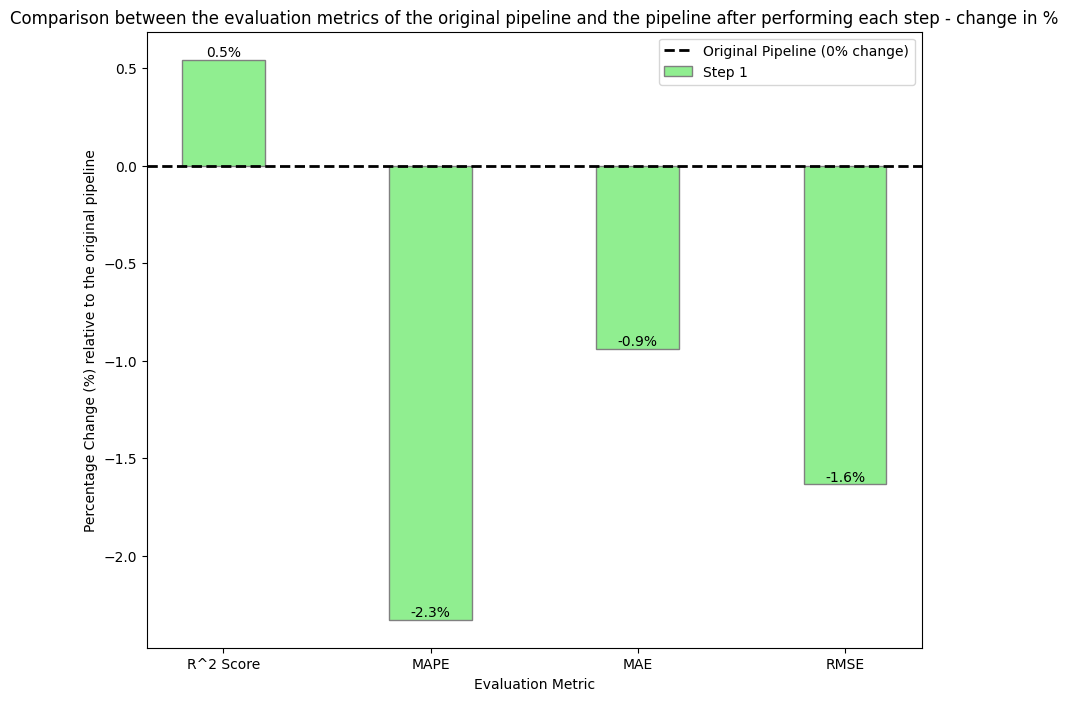

In [165]:
# Presenting a graph showing comparison between the evaluation metrics of the original pipeline and the pipeline after the first step:
evaluation_metrics = ['R^2 Score', 'MAPE', 'MAE', 'RMSE']
original_values = [xgb_r2_originalPipeline, xgb_mape_originalPipeline, xgb_mae_originalPipeline, xgb_rmse_originalPipeline]
step1_values = [xgb_r2_afterStep1, xgb_mape_afterStep1, xgb_mae_afterStep1, xgb_rmse_afterStep1]
colors = ['lightgreen']

plot_evaluation_metrics_comparison(evaluation_metrics, original_values, step1_values, step_labels=['Step 1'], colors=colors)

<b>We can see that by performing this step, <u>all these 4 evaluations metrics have improved</u>, comparing to the original pipeline!</b> In particular, we can see that the <i>MAPE</i> score has significantly been improved (decreased) by -2.3%, , the <i>RMSE</i> score also has been significantly improved (reduced) by -1.6%, and also the other two evaluation metrics have been improved!<br>
Let's move on to performing additional step, to further improve model's performance:

---

### <b><u>Step 2</u>: Handling missing data by using Predictive Imputation:</b>


In this step, I will train a model to predict the missing values of certain features in the dataset. Some featuers are highly correlated between one to another, enabling filling missing values more wisely rather than using simple techniques such as filling the mean/median value, deleting these entries, etc. It is important to note, as will be detailed below, that in order to avoid data leakage, <u>I have trained the predictive imputation model only based on the TRAINING data, and not on the test data</u>. Only then I apply the predictive model on the test set.<br><br>
Let's inspect the values appearing in the dataset for the 'culet_size' feature (which is a categorical feature):

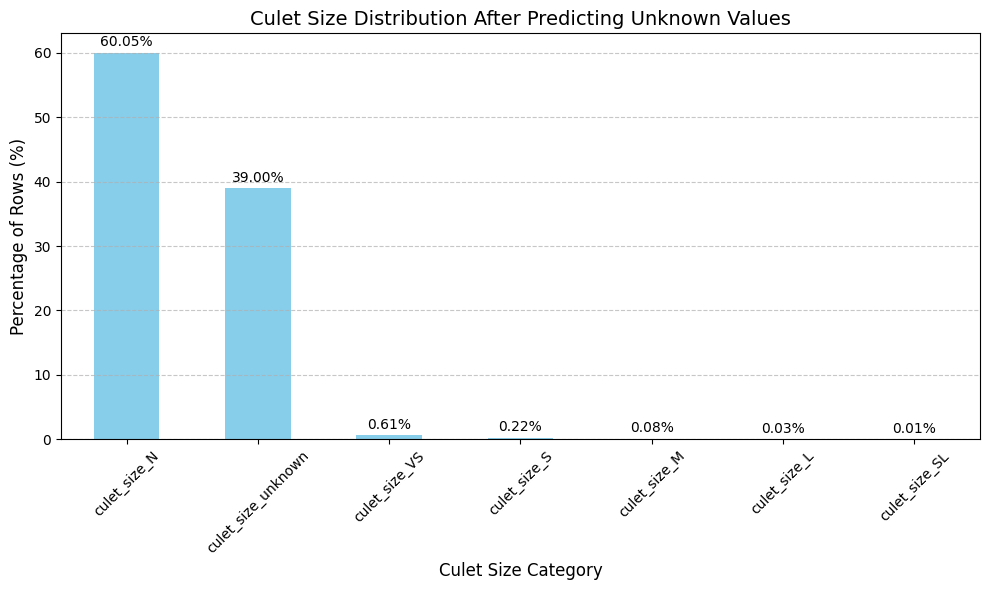

In [ ]:
def plot_culet_size_distribution(data, feature_prefix, title):
    # Choosing the columns to be used:
    culet_size_cols = [col for col in data.columns if col.startswith(f"{feature_prefix}_")]
    
    # Calculate the percentage of rows containing each culet_size value (to see the distribution...):
    culet_size_distribution = data[culet_size_cols].sum() / len(data) * 100    
    culet_size_distribution = culet_size_distribution.sort_values(ascending=False)
    
    plt.figure(figsize=(10, 6))
    ax = culet_size_distribution.plot(kind='bar', color='skyblue')
    plt.title(title, fontsize=14)
    plt.xlabel('Culet Size Category', fontsize=12)
    plt.ylabel('Percentage of Rows (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Addding the % in text to be more clear to compare:
    for i in range(len(culet_size_distribution)):
        ax.text(i, culet_size_distribution[i] + 0.5, f'{culet_size_distribution[i]:.2f}%', ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

    return culet_size_distribution


culet_size_distribution_beforePredicting = plot_culet_size_distribution(
    X_train,
    feature_prefix="culet_size",
    title="Culet Size Distribution After Predicting Unknown Values"
)

We can see that the 'culet_size' feature has many <b>missing values - 39% of the data</b>; in fact, it is the 2nd most common value in the feature, while the next most common value consists of only 0.61% of the data. Let's use a model to predict and fill the missing values of the 'culet_size' feature:

In [167]:
# Predicting unknown values for the 'culet_size' feature:
def predict_unknown_values(X_train, X_test, categorical_features, selected_features_to_fill_unknown_values):
    X_train_copy = X_train.copy()
    X_test_copy = X_test.copy()    
    X_train_copy = X_train_copy.fillna(0)
    X_test_copy = X_test_copy.fillna(0)
    
    for feature in categorical_features:
        if feature not in selected_features_to_fill_unknown_values:
            continue
        
        print(f"\nProcessing feature: {feature}")
        
        feature_cols = [col for col in X_train_copy.columns if col.startswith(f"{feature}_")]
        unknown_col = f"{feature}_unknown"
        
        if unknown_col not in feature_cols:
            continue
            
        value_cols = [col for col in feature_cols if col != unknown_col]
        
        print("Processing training data...")
        
        unknown_indices_train = X_train_copy[unknown_col][X_train_copy[unknown_col] == 1].index
        known_indices_train = X_train_copy[unknown_col][X_train_copy[unknown_col] == 0].index
        
        if len(known_indices_train) == 0:
            continue
        
        y_known_train = pd.Series(index=known_indices_train, dtype=str)
        print(f"Creating target variable for {len(known_indices_train)} known samples")
        missing_values = 0
        
        for idx in known_indices_train:
            value_found = False
            for col in value_cols:
                if X_train_copy.loc[idx, col] == 1:
                    y_known_train[idx] = col.replace(f"{feature}_", "")
                    value_found = True
                    break
            if not value_found:
                missing_values += 1
                
        X_columns = [col for col in X_train_copy.columns 
                    if not col.startswith(f"{feature}_")]
        
        X_train_features = X_train_copy.loc[known_indices_train, X_columns].copy()
        X_train_features = X_train_features.replace([np.inf, -np.inf], 0)
        X_train_features = X_train_features.fillna(0)
        
        # Debug information
        print(f"Training data preparation complete:")
        print(f"- Shape: {X_train_features.shape}")
        print(f"- Number of features: {len(X_columns)}")
        print(f"- Number of samples: {len(known_indices_train)}")
        
        if y_known_train.isna().any():
            y_known_train = y_known_train.fillna('unknown')
        
        print("Fitting RandomForest...")
        # Now, I train a Random Forest model to predict the unknown values of the 'culet_size' feature:
        rf = RandomForestClassifier(n_estimators=100, random_state=42)
        
        # Important - this is something I paid attention to, to make sure that there is no leakage of information from the test set to the training set:
        # Payy attention to the fact that I am training the model only on the training set, and not on the test set!
        try:
            rf.fit(X_train_features, y_known_train)
        except Exception as e:
            print(f"Error during fitting: {str(e)}")
            continue

        # Predicting the missing values for training set:
        if len(unknown_indices_train) > 0:
            X_unknown_train = X_train_copy.loc[unknown_indices_train, X_columns].copy()
            X_unknown_train = X_unknown_train.replace([np.inf, -np.inf], 0)
            X_unknown_train = X_unknown_train.fillna(0)
            
            predictions_train = rf.predict(X_unknown_train)            
            X_train_copy.loc[unknown_indices_train, feature_cols] = 0            
            for idx, pred in zip(unknown_indices_train, predictions_train):
                pred_col = f"{feature}_{pred}"
                if pred_col in X_train_copy.columns:
                    X_train_copy.loc[idx, pred_col] = 1

        # Predicting missing values for test set:
        unknown_indices_test = X_test_copy[unknown_col][X_test_copy[unknown_col] == 1].index
        if len(unknown_indices_test) > 0:
            X_unknown_test = X_test_copy.loc[unknown_indices_test, X_columns].copy()
            X_unknown_test = X_unknown_test.replace([np.inf, -np.inf], 0)
            X_unknown_test = X_unknown_test.fillna(0)
            
            predictions_test = rf.predict(X_unknown_test)
            X_test_copy.loc[unknown_indices_test, feature_cols] = 0
            
            for idx, pred in zip(unknown_indices_test, predictions_test):
                pred_col = f"{feature}_{pred}"
                if pred_col in X_test_copy.columns:
                    X_test_copy.loc[idx, pred_col] = 1
        
        print(f"Successfully completed predictions for unknown values in feature {feature}")
        
        # Remove the unknown column after predictions are done
        X_train_copy = X_train_copy.drop(columns=[unknown_col])
        X_test_copy = X_test_copy.drop(columns=[unknown_col])
    
    return X_train_copy, X_test_copy

categorical_features = ['cut', 'color', 'clarity', 'cut_quality', 'lab', 'symmetry', 'polish', 
                    'eye_clean', 'culet_size', 'culet_condition', 'girdle_min', 'girdle_max', 
                    'fluor_color', 'fluor_intensity', 'fancy_color_dominant_color', 
                    'fancy_color_secondary_color', 'fancy_color_overtone', 'fancy_color_intensity']

# Predicting missing values for the 'culet_size' feature:
selected_features_to_fill_unknown_values = ['culet_size']


X_train_filled, X_test_filled = predict_unknown_values(X_train, X_test, categorical_features, selected_features_to_fill_unknown_values)



Processing feature: culet_size
Processing training data...
Creating target variable for 107217 known samples
Training data preparation complete:
- Shape: (107217, 129)
- Number of features: 129
- Number of samples: 107217
Fitting RandomForest...
Successfully completed predictions for unknown values in feature culet_size


Now, after predicting the missing values of the 'culet_size' feature, let's plot:
<ul>
    <li>
        The distribution of values of the 'culet_size' feature <u>after</u> the prediction of the missing values.
    </li>
    <li>
        The change in % for rows having each unique value of the 'culet_size' feature.
    </li>
</ul>

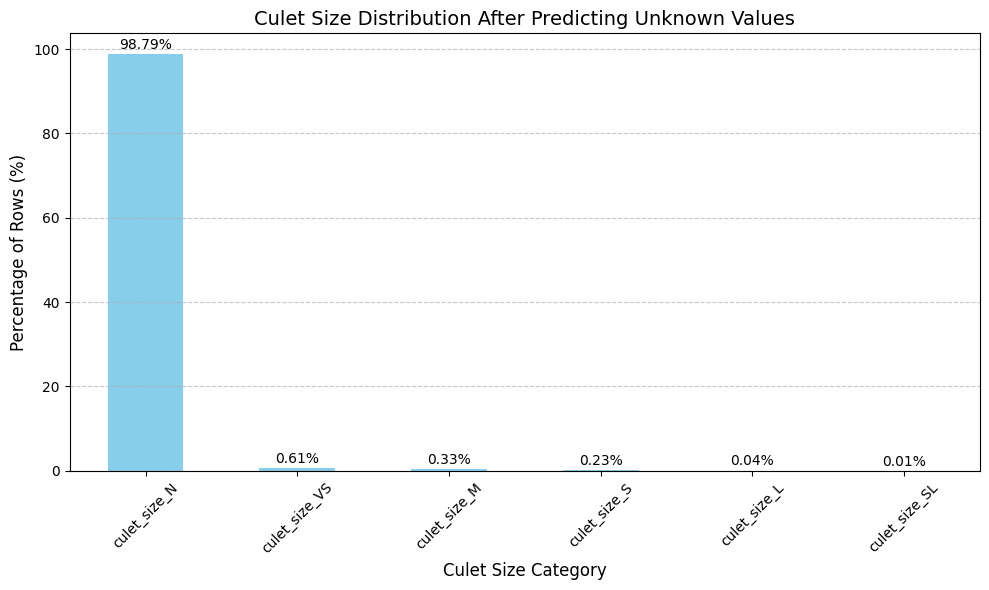

In [168]:
# After running the prediction function
culet_size_distribution_afterPredicting = plot_culet_size_distribution(
    X_train_filled,
    feature_prefix="culet_size",
    title="Culet Size Distribution After Predicting Unknown Values"
)

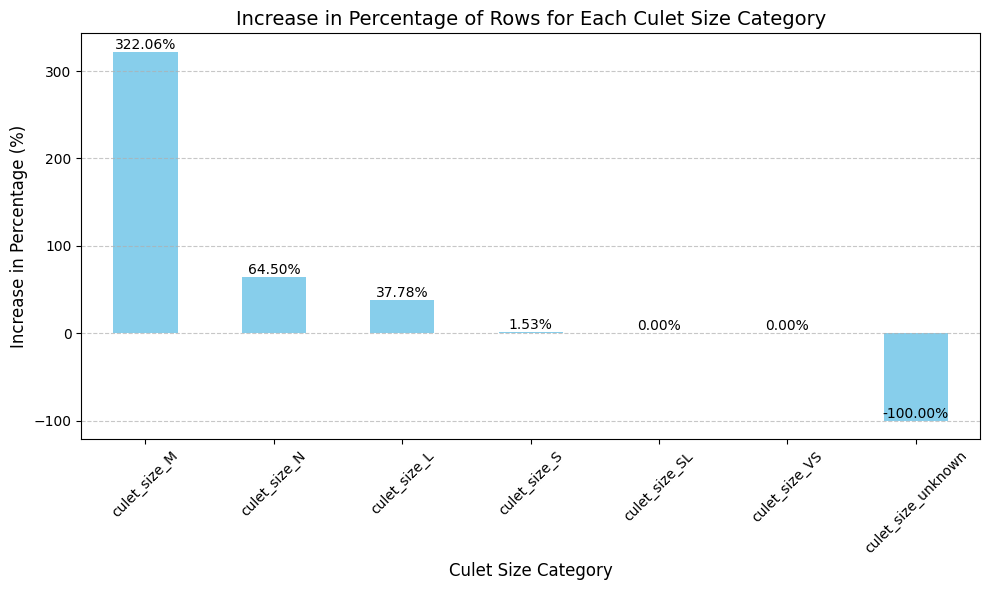

In [169]:
# Calculating the increase (before and after predicting the missing values for the 'culet_size' feature) in percentage:
all_categories = culet_size_distribution_beforePredicting.index.union(
    culet_size_distribution_afterPredicting.index
)

before = culet_size_distribution_beforePredicting.reindex(all_categories, fill_value=0)
after = culet_size_distribution_afterPredicting.reindex(all_categories, fill_value=0)

increase_in_percentage = ((after - before) / before.replace(0, float('nan')) * 100).fillna(-100)

# Sorting the values by the change in % to make the visualization more clearr:
increase_in_percentage = increase_in_percentage.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
ax = increase_in_percentage.plot(kind='bar', color='skyblue')
plt.title("Increase in Percentage of Rows for Each Culet Size Category", fontsize=14)
plt.xlabel('Culet Size Category', fontsize=12)
plt.ylabel('Increase in Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the change in % on top of each bar:
for i in range(len(increase_in_percentage)):
    ax.text(i, increase_in_percentage[i], f'{increase_in_percentage[i]:.2f}%', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

<b>What is very interesting to observe is the massive increase in percentage of diamonds classified as having culet size category of M, while <u>originally only 0.08% were classified as having culet size of M</u>!</b> <u>Namely, if we used a simple technique , we would have only filled unknown values with culet size of N (the mode value for that feature)</u>; however, using the predictive imputation model, we can see that based on other features, it has also filled other values when it was more appropriate. As we will see, this step will further improve the model's performance, and it might be thanks to "smart" technique of filling the missing values, rather than for example just filling the mode value.<br><br>
<b>Let's see the performance of the model after this change:</b>

In [170]:
# Ensure all columns are numeric after one-hot encoding
X_train_filled = X_train_filled.apply(pd.to_numeric, errors='coerce')
X_test_filled = X_test_filled.apply(pd.to_numeric, errors='coerce')

# Now, train the XGBoost model
xgb_model = XGBRegressor()

# Training the model on the training data (fitted to the training data):
xgb_model.fit(X_train_filled, y_train)

# Now, we can make predictions on the test data:
prediction_afterStep2 = xgb_model.predict(X_test_filled)



# Evaluating the model using the evaluation metrics we have imported above:
xgb_r2_afterStep2 = r2_score(y_test, prediction_afterStep2)
xgb_mape_afterStep2 = mean_absolute_percentage_error(y_test, prediction_afterStep2)
xgb_mae_afterStep2 = mean_absolute_error(y_test, prediction_afterStep2)
xgb_rmse_afterStep2 = np.sqrt(mean_squared_error(y_test, prediction_afterStep2))

# Print the evaluation metrics
print(f"R^2 Score: {xgb_r2_afterStep2:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape_afterStep2:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae_afterStep2:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_afterStep2:.0f}")


R^2 Score: 0.865
Mean Absolute Percentage Error (MAPE): 0.137
Mean Absolute Error (MAE): 1104
Root Mean Squared Error (RMSE): 10252


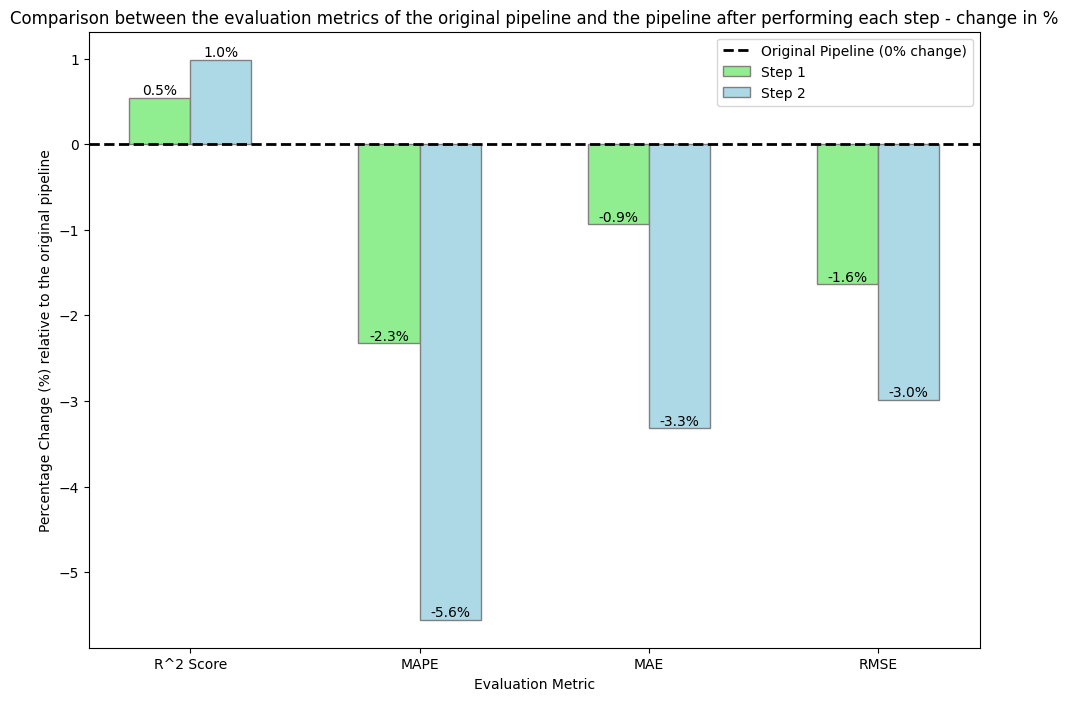

In [171]:
# Updating the comparison plot to also include the evaluation metrics after the second step:
evaluation_metrics = ['R^2 Score', 'MAPE', 'MAE', 'RMSE']
original_values = [xgb_r2_originalPipeline, xgb_mape_originalPipeline, xgb_mae_originalPipeline, xgb_rmse_originalPipeline]
step1_values = [xgb_r2_afterStep1, xgb_mape_afterStep1, xgb_mae_afterStep1, xgb_rmse_afterStep1]
step2_values = [xgb_r2_afterStep2, xgb_mape_afterStep2, xgb_mae_afterStep2, xgb_rmse_afterStep2]
colors = ['lightgreen', 'lightblue']

plot_evaluation_metrics_comparison(evaluation_metrics, original_values, step1_values, step2_values, step_labels=['Step 1', 'Step 2'], colors=colors)

We can see that this step has further improved model's performance - <b>it has improved all these 4 evaluation metrics, with a very significant improvement for the MAPE value</b>; we can see that all four evaluation metrics have been dramatically improved.
Let's move on and perform additional step to further improve model's performance:

---

### <b><u>Step 3</u>: Dealing with the anomaly associated with <i>SI3 clarity level</i> by performing <u>MODIFIED</u> Ordinal Encoding on the clarity feature and penalizing diamonds classified as having this clarity level</b>:
<center><u>In my opinion, this is the most interesting observation in this work</u>.</center>
<br>
Before addressing the issue, to understand the anomaly, we should recall what was discussed regarding <b>visualization #3 presented in part 1 of this project</b>:

It is commonly known that the clarity level of a diamond is a very important factor in determining its price, so we would expect a strong correlation between the clarity level and the price of the diamond. <b>It is such a known factor that the <i>Gemological Institute of America (GIA)</i> has developed and introduced the diamond clarity grading system (the GIA Clarity Scale). It is the standard method used internationally to assess the clarity of diamonds, <u>ranging from Flawless (FL) to Included (I1, I2, I3)</u>.</b>
Therefore, in part 1 of the project I wanted to explore whether this grading system may reflect price changes in various diamonds in the dataset, based on their clarity level:
<br>

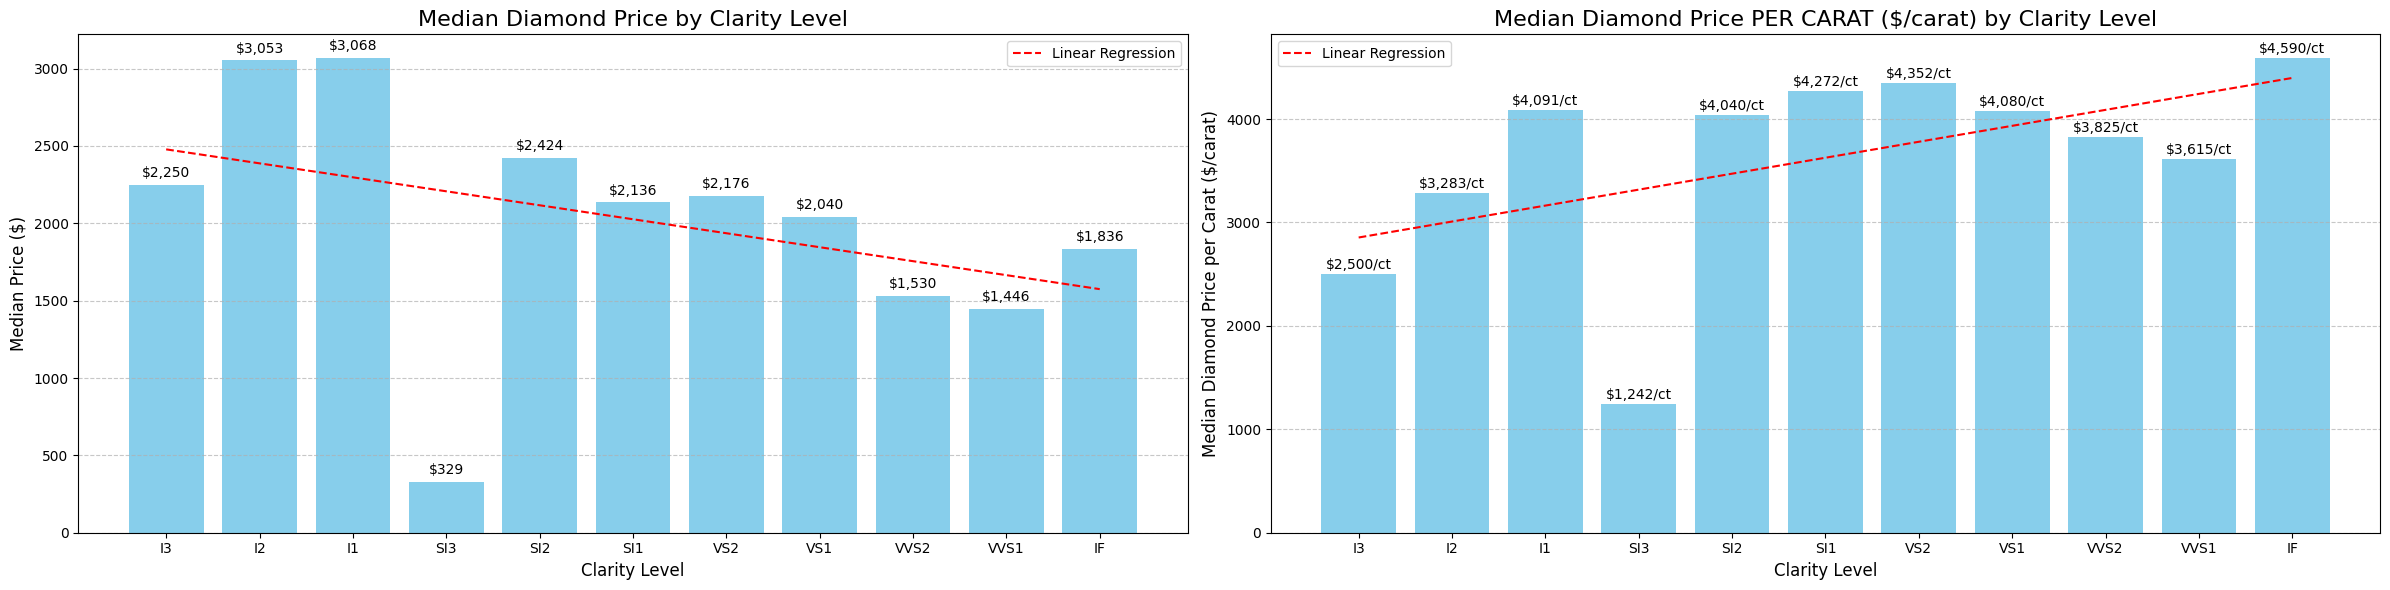

In [172]:
# Writing the order of diamond clarity from the worst to the best (according to the GIA scale, which I explained in part 1 of the project):
clarity_order = ['I3', 'I2', 'I1', 'SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Now, I will calculate the median diamond prices for each clarity level:
clarity_medians = dtf.groupby('clarity')['total_sales_price'].median()
clarity_medians = clarity_medians.reindex(clarity_order)

# I will create a figure with the two subplots side by side, so I can compare between them:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
fig.subplots_adjust(wspace=0.4)

# ALEF: I will plot the median diamond prices for each clarity level in the first subplot:
clarity_order = ['I3', 'I2', 'I1', 'SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ax1.bar(clarity_order, clarity_medians[clarity_order], color='skyblue')
ax1.set_title('Median Diamond Price by Clarity Level', fontsize=16)
ax1.set_xlabel('Clarity Level', fontsize=12)
ax1.set_ylabel('Median Price ($)', fontsize=12)

# To also see the actual values on top of each bar (the median diamond price for each clarity level):
for i, v in enumerate(clarity_medians[clarity_order]):
   ax1.text(i, v + 50, f'${v:,.0f}', ha='center', fontsize=10)

ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the linear regression line to the plot, to see the trend of the median diamond prices:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(range(len(clarity_order)), clarity_medians[clarity_order])
x = np.array(range(len(clarity_order)))
ax1.plot(x, slope1*x + intercept1, color='red', linestyle='--', label='Linear Regression')
ax1.legend()

# Calculating the median carat weight for each clarity level:
carat_medians = dtf.groupby('clarity')['carat_weight'].median()
# VERY IMPORTANT STEP that took time to think- I normalize the prices (price per carat)!
normalized_medians = clarity_medians / carat_medians

# Second subplot - Normalized prices
ax2.bar(clarity_order, normalized_medians[clarity_order], color='skyblue')
ax2.set_title('Median Diamond Price PER CARAT ($/carat) by Clarity Level', fontsize=16)
ax2.set_xlabel('Clarity Level', fontsize=12)
ax2.set_ylabel('Median Diamond Price per Carat ($/carat)', fontsize=12)

# To also see the actual values on top of each bar (the median diamond price per carat for each clarity level):
for i, v in enumerate(normalized_medians[clarity_order]):
   ax2.text(i, v + 50, f'${v:,.0f}/ct', ha='center', fontsize=10)

ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the linear regression line to the plot, to see the trend of the median diamond prices per carat:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(range(len(clarity_order)), normalized_medians[clarity_order])
ax2.plot(x, slope2*x + intercept2, color='red', linestyle='--', label='Linear Regression')
ax2.legend()

plt.tight_layout()

# Show the plot
plt.show()

However, when looking at the left graph above, we can see that overall, <b>as the clarity level improves, the median diamond prices significantly decreases</b>.
<br>
<b><u>This observation is very odd, since the diamond prices should increase as the clarity level increases; but it seems not to be the case at first glance.</u></b>
<br>
Nevertheless, as explained in part 1 of the project, we should also take into account the carat_weight of the diamond! <b>It turns out that as the clarity level improves, the median carat_weight of diamonds at that clarity level decreases. This is logical - this introduces a trade-off for the customer between diamonds with better clarity level, while having smaller carat_weight (or vice versa)</b>.

##### The right graph above approves this hypothesis; we can see that when we look at the median diamond price <i><u>PER CARAT</u></i>, meaning that we neutralize the factor of carat_weight, <u>we can see that indeed the diamond price increases as the clarity level improves, as we would expect in the first place!</u>

However, as also noted by the assignment reviewer regarding this visualization in part 1, we can also invesitigate another interesting finding related to this visualization - the visualization presented above has brought up an additional anomaly - <b>the median diamond price per carat <u>for the <i>SI3</i> Clarity level</u> seems NOT to align with the overall trend of increase in price/carat as the clarity level improves</b>; in fact, when calculating the median price per carat:

In [173]:
# printing the median diamond prices per carat overall:
print("Median Diamond Price per Carat (overall): ", dtf.total_sales_price.median() / dtf.carat_weight.median())

# writing how % lower is the median diamond price per carat for SI3 clarity level compared to the overall median diamond price per carat:
print("SI3 Clarity Median Diamond Price per Carat is ", (normalized_medians['SI3'] / (dtf.total_sales_price.median() / dtf.carat_weight.median()) - 1) * 100, "% lower than the overall median diamond price per carat.")

Median Diamond Price per Carat (overall):  3940.0
SI3 Clarity Median Diamond Price per Carat is  -68.48960827506944 % lower than the overall median diamond price per carat.


<b>We can see that the median price per carat for the SI3 clarity level is <u>-68.49 % lower</u> than the overall median diamond price per carat</b>. As will be detailed below, after exploring various possible reasons for this matter, I found out that this anomaly is <b>deeply rooted in real-world <u>professional dispute</u> regarding this clarity level</b>; it turns out that although this clarity level (SI3) has been introduced by the European Gemological Laboratory (EGL), it is NOT recognized globally as part of the GIA Diamond Grading Scale, and <a href="https://willyou.com/buying-guides/4cs/clarity/si3"><b>considered "misleading for inexperienced shoppers"</b></a>.
<br>
The official GIA Diamond Clarity Scale is:
<img src="data/GIA_Clarity_Scale.png">
<br>
<b>As can be observed, the SI3 clarity level is not part of the official GIA scale!</b> In fact, this clarity level is rarely used nor recognized, and this is also the situation in our dataset:


In [174]:
# Printing how much % of diamonds in the dataset have clarity level of SI3:
print("Percentage of diamonds with SI3 clarity level: ", dtf.clarity.value_counts(normalize=True)['SI3'] * 100, "%")

Percentage of diamonds with SI3 clarity level:  0.004551599204380459 %


As can be seen, only about 0.00455% of the diamonds in our dataset are classified as having clarity level of SI3; moreover, we can distinguish this rare classification by observing which labs (actually - just one of them) uses this clarity level in our dataset: 

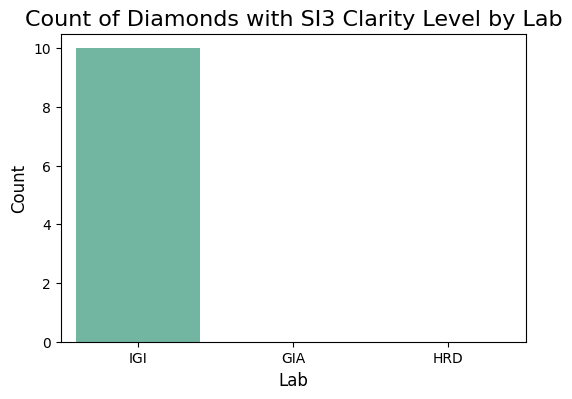

In [ ]:
# Getting all the labs which appear in the dataset:
all_labs = dtf['lab'].unique()

# Counting the number of diamonds with SI3 clarity level - for each lab:
si3_counts = dtf[dtf.clarity == 'SI3']['lab'].value_counts()
si3_counts = si3_counts.reindex(all_labs, fill_value=0)

plt.figure(figsize=(6, 4))
sns.barplot(x=si3_counts.index, y=si3_counts.values, palette="Set2")
plt.title("Count of Diamonds with SI3 Clarity Level by Lab", fontsize=16)
plt.xlabel('Lab', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

We can see that only one lab (IGI) uses this clarity level (SI3); this aligns with the research presnted above, regarding the contreversy of whether to use this clarity level at all in the diamond industry.<br><br>
<b>After recognizing the <u>negative</u> impact of SI3 clarity level compared to all other clarity levels</b>, in this part of the project, I will address this issue, ensuring fair pricing for every diamond, also for SI3 clarity level diamonds, in a way that allows the model to be used for real-world needs.
<br>
To achieve that, I will use 2 techniques:
<ol>
    <li>First of all, in the initial baseline pipeline, the 'clarity' feature was One-Hot-Encoded, as all other categorical columns; however, this resulted in losing the relative meaning of the clarity levels, according to the GIA scale presented above, causing information loss. <b>Therefore, I will use Ordinal Encoding for the 'clarity' feature.</b></li>
    <br>
    <li>However, the more interesting technique in my opinion is altering the regular Ordinal Encoding, such that SI3 clarity level will reflect the negative impact it has on diamond prices.
    <br>
    <b>In other words, instead of giving Ordinal values of 0,1,2,... I will give the <i>SI3</i> clarity level a negative value, <u>representing its negative effect on diamond prices</u>, as explained above.</b>
    </li>
</ol>


While dealing specifically with the SI3 clarity level will not have a significant effect on the overall precision of the model, since we have already seen above that the SI3 clarity level is rearly used (about 0.00455% of the diamonds of the dataset), it is of enormous importance in terms of allowing the model to be used by real users, and will help avoid false pricing by various sellers in the market; <b>in other words, if this model is used by <u>real-life customers</u>, if they report that the diamond they consider purchasing is classified as having clarity level of SI3, it is crucial to make the model perform price reduction based on this data (as happens in real-life and also in), to reflect the contreversy regarding this clarity level</b>.

Last thing before applying the solution to handle this weakness we have just indentified in the baseline pipeline - <u><b>let's further base the weakeness on the Error Analysis</b></u>:


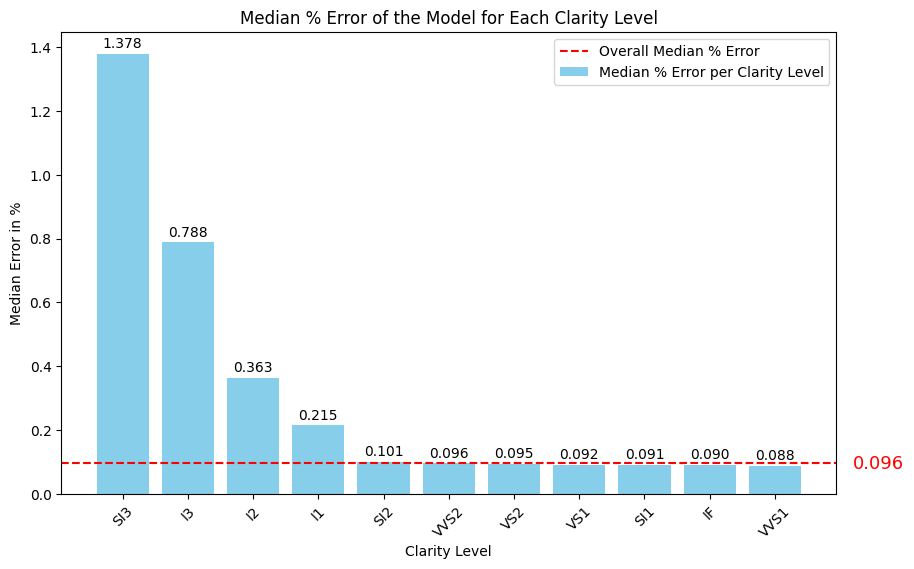

In [176]:
residuals = y_test - prediction_OriginalPipeline

rel_res = residuals / y_test
rel_res = rel_res.abs()

# Adding the 'clarity' column back to dtf_test for grouping
dtf_test['clarity'] = dtf.loc[dtf_test.index, 'clarity']

# presenting the median error percentage per diamonds for each clarity level:
median_error_per_clarity = rel_res.groupby(dtf_test['clarity']).median()

# Sorting the median error percentage per clarity level in descending order:
median_error_per_clarity = median_error_per_clarity.sort_values(ascending=False)

# Visualizing the median error percentage per clarity level:
plt.figure(figsize=(10, 6))
plt.axhline(y=rel_res.median(), color='r', linestyle='--', label='Overall Median % Error')
bars = plt.bar(median_error_per_clarity.index, median_error_per_clarity.values, color='skyblue', label='Median % Error per Clarity Level')

# Adding text on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}', ha='center', va='bottom')

# Adding text next to the line
plt.text(len(median_error_per_clarity) + 0.2, rel_res.median(), f'{rel_res.median():.3f}', color='red', ha='left', va='center', fontsize=13)

plt.title('Median % Error of the Model for Each Clarity Level')
plt.xlabel('Clarity Level')
plt.ylabel('Median Error in %')
plt.xticks(rotation=45)
plt.legend()
plt.show()


We can see that indeed the observation explained above regarding the market attitude towards SI3 clarity level is also reflected in the error analysis; <b>we can see that while the overall median error percentage is: 0.096, the median error percentage for the SI3 clarity level is 1.378</b>.
<br>
<b>In other words, the median error percentage for the SI3 clarity level is <u>more than 14 times larger</u> than the overall median error percentage!</b>
<br><br>
After we have established the base for understanding the problem, let's move on to addressing the weakness: since we have to change the encoding of that column from One-Hot-Encoding to Ordinal Encoding, we will perform part of the preprocessing with this change:

In [177]:
# The baseline pipeline:
# First of all, as we did in class, we divide the data into training and testing sets:
# Using 80% of the data for training and 20% for testing, and setting a random seed for reproducibility (we want to get the same results every time we run the code, and I saw that it is a common value to use):
dtf_train, dtf_test = train_test_split(dtf, test_size=0.2, random_state=42)

# Filling missing values with "unknown" for the "fluor_intensity" and "fancy_color_overtone" columns:
dtf_train["fluor_intensity"] = dtf_train["fluor_intensity"].fillna("unknown")
dtf_test["fluor_intensity"] = dtf_test["fluor_intensity"].fillna("unknown")

# Filling missing values with "unknown" for the "fancy_color_overtone" column:
dtf_train["fancy_color_overtone"] = dtf_train["fancy_color_overtone"].fillna("unknown")
dtf_test["fancy_color_overtone"] = dtf_test["fancy_color_overtone"].fillna("unknown")


# Taking only the categorial columns (we can find them by selecting the columns with the type 'object'):
categorialCols = dtf.select_dtypes(include=['object']).columns

# Taking the categorial columns which are defined as categorial in the dataset description on Kaggle:
cols = ["cut","color", "clarity","cut_quality", "lab", "symmetry", "polish", "eye_clean", "culet_size", "culet_condition", "girdle_min", "girdle_max", "fluor_color", "fluor_intensity", "fancy_color_dominant_color",
        "fancy_color_secondary_color", "fancy_color_overtone", "fancy_color_intensity"]

# Doing Oridnal Encoding to the 'polish' & 'cut_quality' features:
# The categorical columns to do them ordinal encoding:
ordinal_columns_PoorToExcellent = ['polish']
ordinal_columns_FairToIdeal = ['cut_quality']

# Applying Ordinal Encoding to the 'polish' feature:
for col in ordinal_columns_PoorToExcellent:
    encoder = OrdinalEncoder(categories=[['Poor', 'Fair', 'Good', 'Very Good', 'Excellent']])
    dtf_train[col] = encoder.fit_transform(dtf_train[[col]])
    
    # Transform the test data
    dtf_test[col] = encoder.transform(dtf_test[[col]])


# Apply Ordinal Encoding to the 'cut_quality' feature:
for col in ordinal_columns_FairToIdeal:
    encoder = OrdinalEncoder(categories=[['unknown', 'Fair', 'Good', 'Very Good', 'Excellent', 'Ideal']])
    dtf_train[col] = encoder.fit_transform(dtf_train[[col]])
    dtf_test[col] = encoder.transform(dtf_test[[col]])

In [178]:
# Now, I will also do "specific encoding" to the clarity feature:
# Specifying the mapping of clarity values to their corresponding numerical values:
clarity_mapping = {
    'I3': 1,
    'I2': 2,
    'I1': 3,
    'SI3': -1,
    'SI2': 5,
    'SI1': 6,
    'VS2': 7,
    'VS1': 8,
    'VVS2': 9,
    'VVS1': 10,
    'IF': 11
}

ordinal_columns = ['clarity']
one_hot_columns = [col for col in cols if col not in ordinal_columns]

# Removing 'polish' and 'cut_quality' from the list of columns to apply one-hot encoding to - we have already encoded them using Ordinal Encoding...
one_hot_columns.remove('polish')
one_hot_columns.remove('cut_quality')

# Applying the ordinal encoding to the 'clarity' column:
for col in ordinal_columns:
    dtf_train[col] = dtf_train[col].map(clarity_mapping)
    dtf_test[col] = dtf_test[col].map(clarity_mapping)

# Applying One-Hot Encoding to the remaining categorical columns
for col in one_hot_columns:
    dummy_train = pd.get_dummies(dtf_train[col], prefix=col)
    dtf_train = pd.concat([dtf_train, dummy_train], axis=1)
    dtf_train = dtf_train.drop(col, axis=1)
    
    dummy_test = pd.get_dummies(dtf_test[col], prefix=col)
    dtf_test = pd.concat([dtf_test, dummy_test], axis=1)
    dtf_test = dtf_test.drop(col, axis=1)

In [179]:
# Removing from the train set these columns which are in the training set but not in the test set:
missingCols = [x for x in dtf_train.columns if x not in dtf_test.columns]
dtf_train = dtf_train.drop(missingCols, axis=1)


# Separating X from y (X are the features, y is the target variable):
X_train = dtf_train.drop('total_sales_price',axis=1)
X_test = dtf_test.drop('total_sales_price',axis=1)

y_train = dtf_train['total_sales_price']
y_test = dtf_test['total_sales_price']


# Initializing the XGBoost regressor model:
xgb_model = XGBRegressor()

# Training the model on the training data (fitted to the training data):
xgb_model.fit(X_train, y_train)

# Now, we can make predictions on the test data:
prediction_afterStep3 = xgb_model.predict(X_test)


# Evaluating the model using the evaluation metrics we have imported above:
xgb_r2_afterStep3 = r2_score(y_test, prediction_afterStep3)
xgb_mape_afterStep3 = mean_absolute_percentage_error(y_test, prediction_afterStep3)
xgb_mae_afterStep3 = mean_absolute_error(y_test, prediction_afterStep3)
xgb_rmse_afterStep3 = np.sqrt(mean_squared_error(y_test, prediction_afterStep3))

# Print the evaluation metrics
print(f"R^2 Score: {xgb_r2_afterStep3:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape_afterStep3:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae_afterStep3:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_afterStep3:.0f}")

R^2 Score: 0.879
Mean Absolute Percentage Error (MAPE): 0.137
Mean Absolute Error (MAE): 1077
Root Mean Squared Error (RMSE): 9710


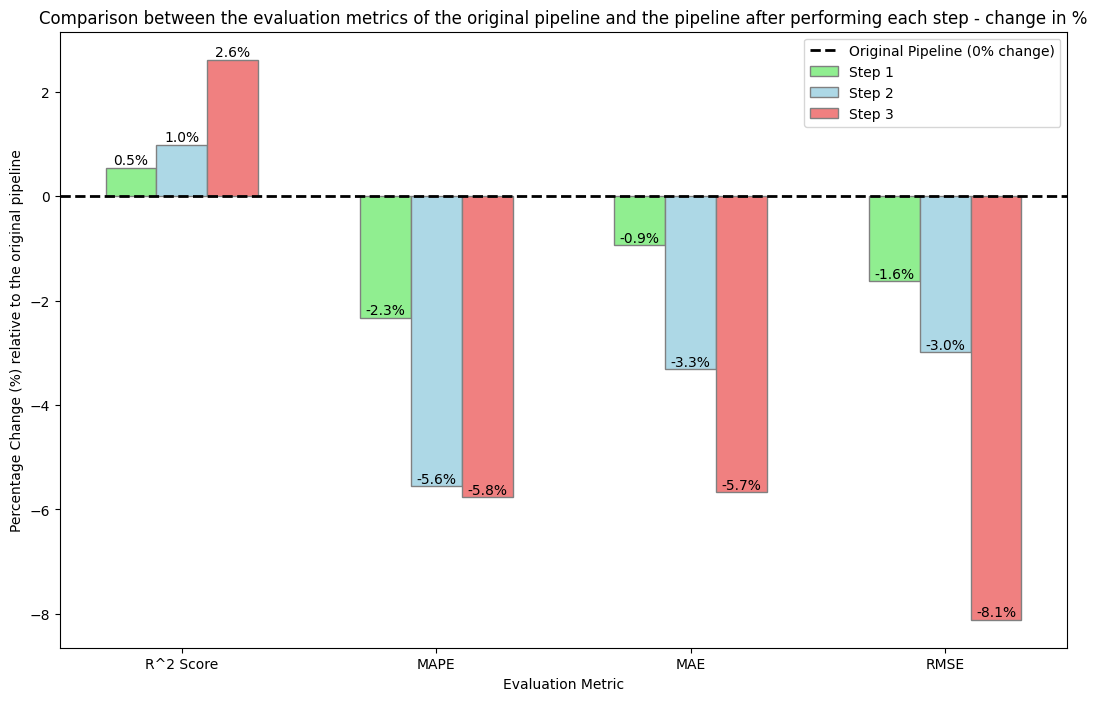

In [180]:
# Updating the comparison plot to also include the evaluation metrics after the 3rd step:
evaluation_metrics = ['R^2 Score', 'MAPE', 'MAE', 'RMSE']
original_values = [xgb_r2_originalPipeline, xgb_mape_originalPipeline, xgb_mae_originalPipeline, xgb_rmse_originalPipeline]
step1_values = [xgb_r2_afterStep1, xgb_mape_afterStep1, xgb_mae_afterStep1, xgb_rmse_afterStep1]
step2_values = [xgb_r2_afterStep2, xgb_mape_afterStep2, xgb_mae_afterStep2, xgb_rmse_afterStep2]
step3_values = [xgb_r2_afterStep3, xgb_mape_afterStep3, xgb_mae_afterStep3, xgb_rmse_afterStep3]
colors = ['lightgreen', 'lightblue', 'lightcoral']

plot_evaluation_metrics_comparison(evaluation_metrics, original_values, step1_values, step2_values, step3_values, step_labels=['Step 1', 'Step 2', 'Step 3'], colors=colors)

As we can see, this step has further improved model's performance - <b>it has improved all these 4 evaluation metrics, with a very significant improvement for the RMSE value and also for the $R^2$ score!</b> Namely, the <b>$R^2$ now has increased by 2.6%</b> relative to the original model, the <b>RMSE score has been improved (decreased) by -8.1%</b>, the <b>MAE has been improved (decreased) by -5.7%</b> and we can also see a slight additional improvement to the MAPE score, more than what was achieved by performing the two previous steps, resulting in <b>improvement of -5.8% also to the MAPE score</b>. These are all very significant improvements, to all 4 evaluation metrics!<br>
Let's move on and perform additional steps, to further improve model's performance:

---

### <b><u>Step 4</u>: Feature Engineering - Removing 8 sabotaging features</b>:
One of the prominent techniques I will perform as part of Feature Engineering is Feature Selection; <b>in this step, I will remove features which are <i><u>counterproductive</u></i> to the model's performance</b>.
<br>
It is important to note that instead of only trying different combinations of features, <b>thanks to the Error Analysis which was performed in part 1 of the project</b>, I can now remove features that I have previously explained that they have negative impact on the model's performance.
<br>
Namely, each time I will focus on a specific feature, explain based on the Error Analysis why it is counterproductive; then, I will remove these counterproductive features, retrain the model, and see whether its performance has improved.

Overall, although I have considered all of these findings as a single step in improving the pipeline to make the workplan clearer, <b><u>this step actually consists of not less than 7 sub-steps</u></b>:
<ul>
    <li>Substep I: Analyzing the <b>depth_percent</b> feature and removing it based on the error analysis.</li>
    <li>Substep II: Analyzing the <b>table_percent</b> feature and removing it based on the error analysis.</li>
    <li>Substep III: Analyzing the <b>girdle_max</b> feature and removing it based on the error analysis.</li>
    <li>Substep IV: Analyzing the <b>girdle_min</b> feature and removing it based on the error analysis.</li>
    <li>Substep V: Analyzing the <b>symmetry</b> feature and removing it based on the error analysis.</li>
    <li>Substep VI: Analyzing the <b>lab</b> feature and removing it based on the error analysis.</li>
    <li>Substep VII: Analyzing <u>both</u> the <b>'fancy_color_overtone'</b> and <b>'fancy_color_secondary_color'</b> features and removing them based on the error analysis.</li>

</ul>

Let's go over each of these 7 substeps:


### Substep I: Analyzing the <b>depth_percent</b> feature and removing it based on the error analysis:
Removing the 'depth_percent' feature is probably the clearest technique to perform based on the error analysis conducted in part 1 of the project.
<br>
<b><u><font size=5.5>Namely, during part 1 of the project we were able to reach the conclusion that the 'depth_percent' feature is sabotaging the model by performing 3 different analyses on the data!</font></u></b>

I will present the three reasons why this feature should be removed:
<br>

#### <b><u>1st Reason for removing the 'depth_percent' feature</u>: looking at the <u>SHAP values of the worst-prediction</u> our model has made:</b>
As part of the error analysis conducted in part 1 of this project, as we learned in class, I used shap values to explain the prediction of a <u>single</u> element; namely, the single element we are intereseted in is the one with the biggest relative error:

In [181]:
feature_names = xgb_model_OriginalPipeline.feature_names_in_
shap_sample = X_train_OriginalPipeline[feature_names].sample(500)

explainer = shap.TreeExplainer(xgb_model_OriginalPipeline)
shap_values = explainer(shap_sample)

X_test_filtered = X_test_OriginalPipeline[feature_names]
test_shap_values = explainer(X_test_filtered)

# Let's find the the worst prediction, with the biggest relative error, so we can analyze it afterwards:
rel_res=residuals/y_test
rel_res=rel_res.abs()

The real price was:

In [182]:
# Finding the worst prediction:
max_id = rel_res[rel_res==rel_res.max()].index[0]
worst_item_real_price = y_test[max_id]
print("While the real value is:", f"${worst_item_real_price:,.0f}")


While the real value is: $1,014


While our model predicted:

In [183]:
pred_series=pd.Series(prediction_OriginalPipeline,index=rel_res.index)

worst_item_prediction = pred_series[max_id]

print("The worst prediction which our model predicted is:", f"${worst_item_prediction:,.0f}")

The worst prediction which our model predicted is: $18,626


Let's look at this problematic point:

In [184]:
# Now, I will find the ordinal id of the worst prediction, so I can analyze it afterwards:
max_ordinal_id= X_test_OriginalPipeline.index.get_loc(max_id)

<font size=5><b>I created a <i>waterfall plot</i> for the worst prediction, <b>showing the contribution of each feature to the prediction, and how each feature affects the prediction</b>.</b></font>
<br>
This may help us understand why the model made such a bad prediction - the worst among all predictions...

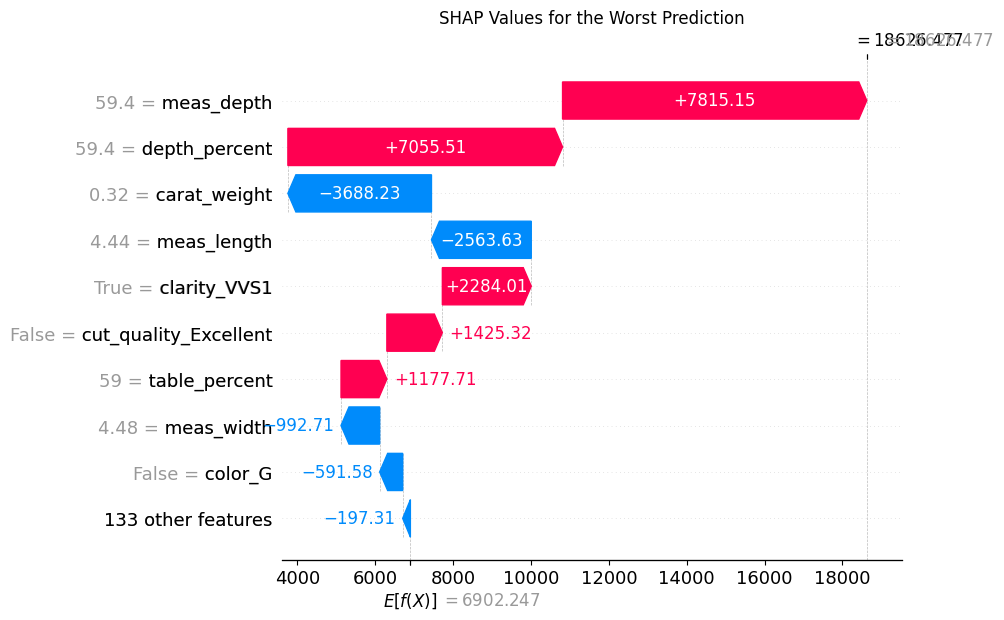

In [185]:
plt.title('SHAP Values for the Worst Prediction')
shap.plots.waterfall(test_shap_values[max_ordinal_id])

In [186]:
# computing the error percentage for the worst prediction, using worst_item_real_price and worst_item_prediction:
error_percentage = (worst_item_prediction - worst_item_real_price) / worst_item_real_price * 100
print(f"The error percentage for the worst prediction is: {error_percentage:.2f}%")

The error percentage for the worst prediction is: 1736.93%


Recall, as I showed in the cells above, that for this worst prediction (with the biggest relative error), our model predicted a price of: $18,626.479, while the real price is: $1,014. As computed in the cell above, <b>the error percentage for this worst prediction is not less than: 1736.93%</b>. To understand why our model gave such a high estimation for this diamond, and what are the features that contributed to this estimation, I have analyzed this worst prediction in more detail, using SHAP values.
<br><br>
<b><i>From the waterfall plot, we can observe that the <u>depth_percent</u> feature contributed much to the high estimation</i></b>; in fact, the <u>depth_percent</u> feature added $7055.51 to the predicted price (<u>which is almost 7 times of the real diamond price</u>!).</b> This results in huge overestimation of the diamond price, and leads us think about testing whether the model's performance without this feature might be better.
 
#### <b><u>2nd Reason for removing 'depth_percent' feature</u>: analyzing its correlation with the target feature - it has a <u>very low correlation value (only 0.03!)</u>:</b>



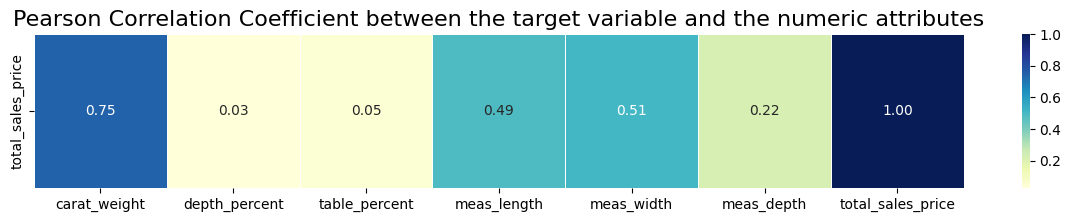

In [187]:
dtf_numeric = dtf.select_dtypes(include=[float, int])
dtf_corr = dtf_numeric.corr(method="pearson").loc[["total_sales_price"]]

fig, ax = plt.subplots(figsize=(15,2))
# Plotting the correlation matrix as a heatmap:
sns.heatmap(dtf_corr, annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=0.5,ax=ax)
plt.title("Pearson Correlation Coefficient between the target variable and the numeric attributes", fontsize=16)
plt.show()

As can be seen in the plot above, the <u>'depth_percent'</u> feature has added $7055.51 to the predicted price, <u>but the correlation between it to the target feature is just 0.03</u>. <b>This also points at the counterproductive nature of the 'depth_percent' feature.</b>

#### <b><u>3rd Reason for removing 'depth_percent' feature</u>: the computations performed in the error analysis in part 1 of the project regarding removing it</u>:</b>
In part 1 of the project, we observed that while the original $R^2$ score, of the original model (without removing any feature) is 0.856, if we remove the sabotaging feature of 'depth_percent', the $R^2$ score will increase to 0.868. This improves the $R^2$ score by 1.4%.</b>
<br>
Let's move on to analyzing and justifying the removal of an additional feature:

### Substep II: Analyzing the <b>table_percent</b> feature and removing it based on the error analysis:
The considerations for removing the 'table_percent' feature are quite similar to the reasons for removing the 'depth_percent' feature explained above. Namely, these are two prominents reasons for removing it:

#### <b><u>1st Reason for removing 'table_percent' feature</u>: looking at the <u>SHAP values of the worst-prediction</u> our model has made:</b>
Looking at the <b><i>waterfall plot</i> of the SHAP values regarding the worst prediction which our model has made</b> (with the biggest relative error), also leads to the conclusion that the 'table_percent' feature is counterproductive, sabotaging the model; recall, as noted above, that for this worst prediction our model predicted a price of: $18,626.479, while the real price is: $1,014. According to the waterfall plot, <b>the 'table_percent' feature added $1,177.71 to the predicted price</b>.</b> This <u>results in huge overestimation of the diamond price</u> (this value which this feature has added to the predicted value is more than the actual price of that diamond!). This leads us think about testing whether the model's performance without this feature might be better.


#### <b><u>2nd Reason for removing 'table_percent' feature</u>: analyzing its correlation with the target feature - it has a <u>very low correlation value (only 0.05!)</u>:</b>
As can be seen in the plot presented above (previously we have observed it for the 'depth_percent', there is no need to show it again), while the <u>'table_percent'</u> feature has added $1,177.71 to the predicted price, <u>the correlation between it to the target feature is just 0.05</u>. <b>This also might be pointing at the counterproductive nature of the 'table_percent' feature.</b>
<br>
Let's move on to analyzing and justifying the removal of an additional feature:

### Substep III: Analyzing the <b>girdle_max</b> feature and removing it based on the error analysis:
We will find below strong considerations for removing the 'girdle_max' feature, showing that analysis of shap values for worst predictions shows that <b>in certain cases this feature has added to the predicted price a value which is more than 5 times greater than the actual diamond price</b>! This also points at the counterproductive nature of the 'girdle_max' feature. In addition, we will see that this column consists of many missing values, when 'unknown' is actually the mode value in that column!

#### <b><u>1st Reason for removing 'girdle_max' feature</u>: looking at the <u>SHAP values of the 5th and 10th worst-predictions</u> our model has made:</b>
Above, we looked into the worst prediction which our model has made (with the biggest relative error); however, we can also look at other big misestimations. <b>Specifically, when looking at the waterfall plot of the SHAP values regarding the <u>5th and 10th worst predictions</u> which our model has made</b>, we will get to the conclusion that the 'girdle_max' feature is counterproductive, sabotaging the model.

5th Worst Prediction:
Actual Diamond Price: $690
Predicted Diamond Price: $8,289
The misestimation is: $-7,599
The error percentage is: 1101.30%


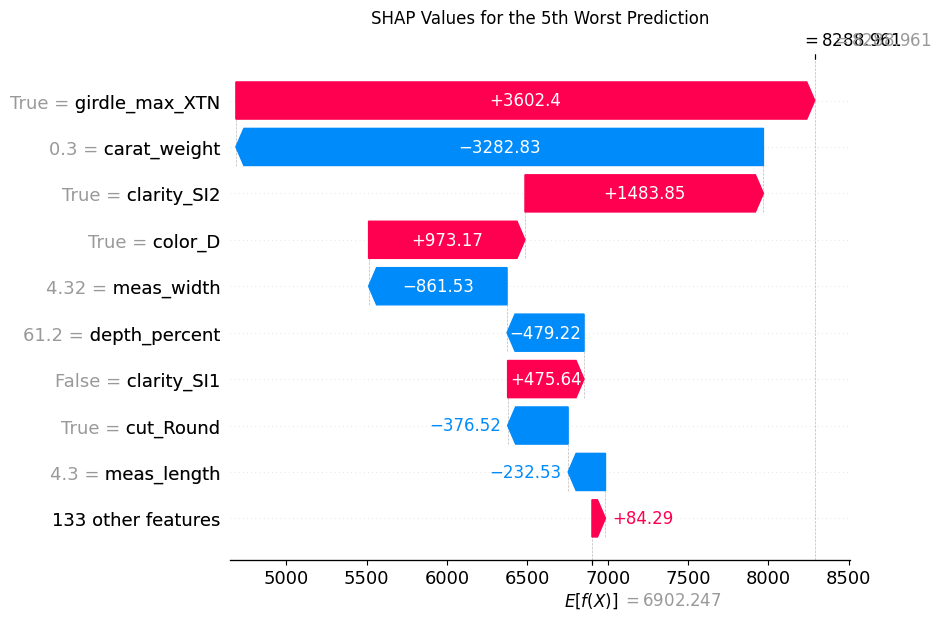

--------------------------------------------------------------
10th Worst Prediction:
Actual Diamond Price: $1,361
Predicted Diamond Price: $11,042
The misestimation is: $-9,681
The error percentage is: 711.32%


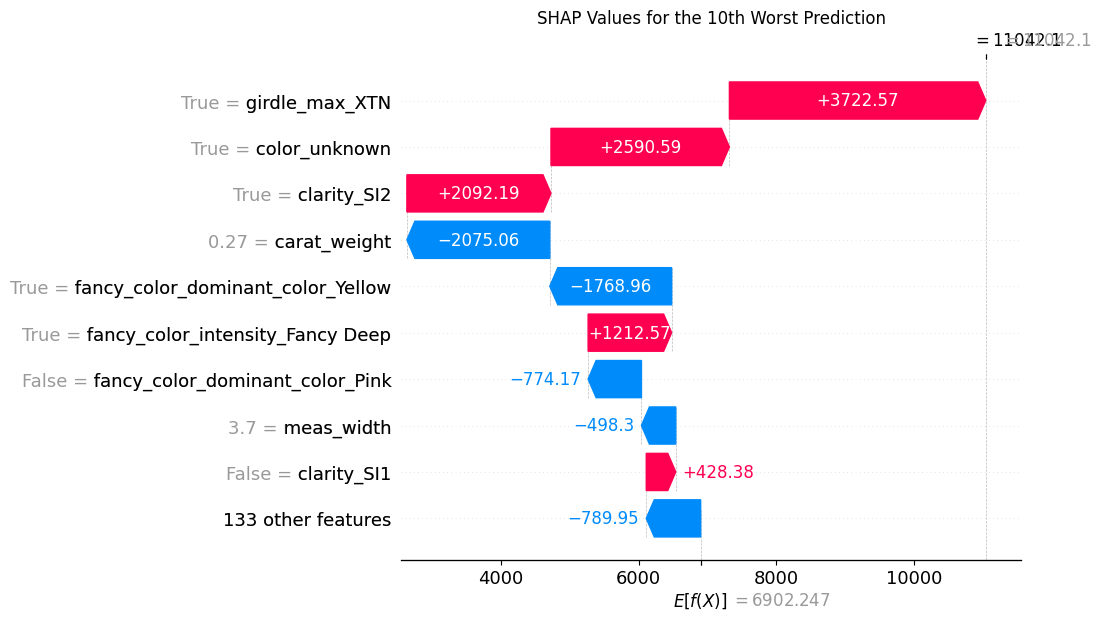

In [188]:
# Now, we look at the 10 worst predictions, and analyze them in the same way, we will show the waterfall plot for the 5th and 10th worst predictions:
worst_predictions = rel_res.sort_values(ascending=False).head(10)

for i, (idx, _) in enumerate(worst_predictions.items()):
    # Showing only for the 5th and 10th worst predictions:
    if i == 4 or i == 9:
        ordinal_id = X_test.index.get_loc(idx)
        actual_price = y_test[idx]
        predicted_price = pred_series[idx]
        print(f"{i+1}th Worst Prediction:")
        print(f"Actual Diamond Price: ${actual_price:,.0f}")
        print(f"Predicted Diamond Price: ${predicted_price:,.0f}")
        print(f"The misestimation is: ${actual_price - predicted_price:,.0f}")
        print(f"The error percentage is: {(predicted_price - actual_price) / actual_price * 100:.2f}%")
        plt.title(f'SHAP Values for the {i+1}th Worst Prediction')
        shap.plots.waterfall(test_shap_values[ordinal_id])
        plt.show()
        # Separating between the two cases, to make it more clear...
        if i == 4:
            print("--------------------------------------------------------------")

Recall that the worst prediction our model has made had an error percentage of 1736.93%; however also the 5th and 10th worst predictions are dramatically bad - having an error percentage of 1101.30% and 711.32%, respectively.
<br>
As can be seen in the two plots presented above:
<ul>
    <li>
        <b>For the 5th worst prediction:</b> the <u>'girdle_max_XTN'</u> (one of the categories of girdle_max column) feature has added $3,602.4 to the predicted price; however, the actual diamond price was only $690! <b>In other words, this feature has added to the predicted price a value which is more than 5 times greater than the actual diamond price!</b> This also points at the counterproductive nature of the 'girdle_max' feature.
    </li>
    <br>
    <li>
        <b>Similarly, for the 10th worst prediction:</b> the <u>'girdle_max_XTN'</u> (one of the categories of girdle_max column) feature has added $3,722.57 to the predicted price; however, the actual diamond price was only $1361! <b>In other words, this feature has added to the predicted price a value which is almost 3 times greater than the actual diamond price!</b> This also points at the counterproductive nature of the 'girdle_max' feature.
    </li>
</ul>
<br>
It is important to note that <u>these are not the only cases where the 'girdle_max' feature seems to be dramatically counterproductive</u>; in order not to make the notebook longer than necessary, I have only shown the above 2 cases, but we could also look for example at the 6th or 8th worst predictions - the 'girdle_max' feature also adds there a very high value to the predicted diamond price, leading to a massive overprediction of the diamond price.
<br><br>
<b>It should also be noted that the value XTN for the 'girdle_max' column is not the only problematic value for that column</b>; for example, looking at the 6th worst prediction shows that also the XTK value for that column has lead to adding a value to the predicted price which is more than the actual diamond price (the 'girdle_max_XTK' has added $867.62 to the predicted price, while the actual diamond price was only $679). Similarly, in the 8th worst prediction, the value VTK for that column had similar effect.
<br><br>


#### <b><u>2nd Reason for removing 'girdle_max' feature</u>: many <i>missing values</i>:</b>
Let's observe the distribution of values ​​for the 'girdle_max' column:

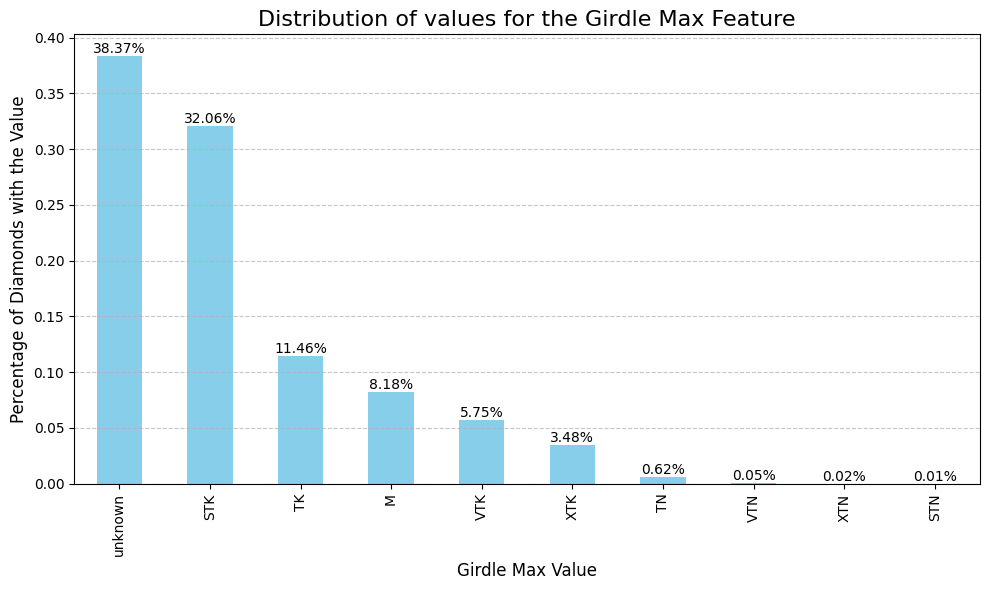

In [229]:
# Presenting a graph showing the distribution of the 'girdle_max' feature:
plt.figure(figsize=(10, 6))
value_counts = dtf['girdle_max'].value_counts(normalize=True)
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of values for the Girdle Max Feature', fontsize=16)
plt.xlabel('Girdle Max Value', fontsize=12)
plt.ylabel('Percentage of Diamonds with the Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text annotations on each bar
for i, v in enumerate(value_counts):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


As can be observed in the plot above, actually <b>the most frequent value in the 'girdle_max' column (the <i>mode</i> value) is actually <u>'unknown'!</u></b> As we have learned in class, while for columns with not many missing values, we can try to use different techniques for filling the missing values inside them (e.g. filling with the mode value/using <i>predictive imputation</i> - as I did in step 2 of this notebook), when having a very high percentage of missing values, sometimes it is best to drop this feature.
<br><br>
So, when having 38.37% missing values, <u>when the mode value is actually 'unknown'</u>, <b>it is very logical and advised to examine the possibility of whether removing this column could improve the performance of our model (as will indeed be the case!)</b>.
To conclude, all of these finding lead to the conclusion that the 'girdle_max' feature might be sabotaging the model, and that it is worthwhile testing whether removing it improves model's performance.
<br>
Let's move on to analyzing the next feature to remove:

### Substep IV: Analyzing the <b>girdle_min</b> feature and removing it based on the error analysis:
Below I will explain the considerations for removing the 'girdle_min' feature; we will see that this column consists of many missing values, when 'unknown' is actually the mode value in that column! This has lead me to the conculusion that it is worthwhile testing whether removing the 'girdle_min' feature might improve model's performance.

#### <b><u>1st Reason for removing 'girdle_min' feature</u>: many <i>missing values</i>:</b>
Let's observe the distribution of values ​​for the 'girdle_min' column:

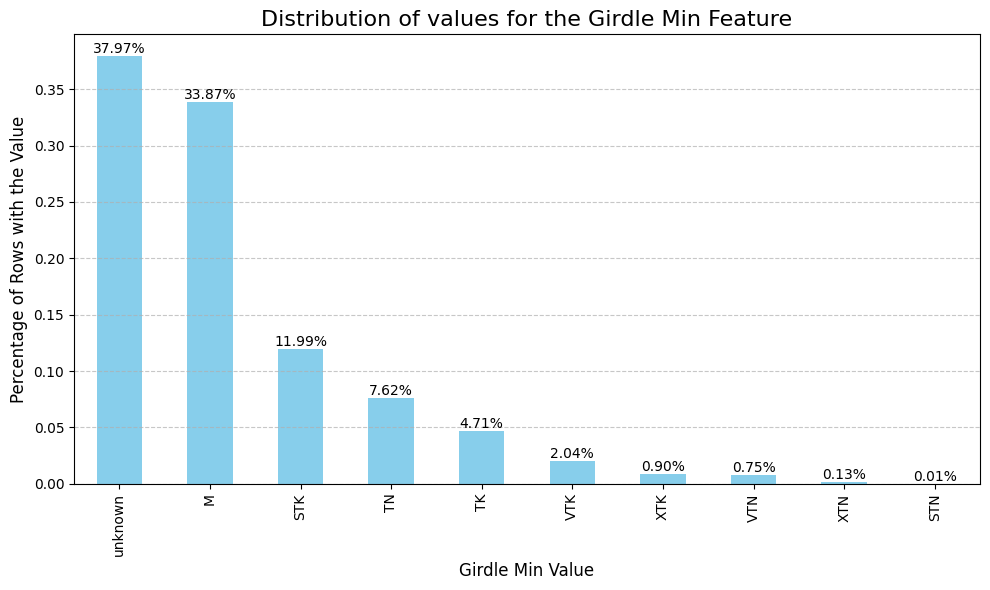

In [190]:
# Presenting a graph showing the distribution of the 'girdle_min' feature:
plt.figure(figsize=(10, 6))
value_counts = dtf['girdle_min'].value_counts(normalize=True)
value_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of values for the Girdle Min Feature', fontsize=16)
plt.xlabel('Girdle Min Value', fontsize=12)
plt.ylabel('Percentage of Rows with the Value', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding text annotations on each bar
for i, v in enumerate(value_counts):
    plt.text(i, v, f'{v:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


As can be observed in the plot above, the situation for the 'girdle_min' feature is very similar to what we have observed above regarding the 'girdle_max' feature; actually, <b>the most frequent value in the 'girdle_min' column (the <i>mode</i> value) is <u>'unknown'!</u></b> As we have learned in class, while for columns with not many missing values, we can try to use different techniques for filling the missing values inside them (e.g. filling with the mode value/using <i>predictive imputation</i> - as I did in step 2 of this notebook), when having a very high percentage of missing values, sometimes it is best to drop this feature.
<br><br>
So, when having 37.97% missing values, when the mode value is actually 'unknown', <b>it is very logical and advised to examine the possibility of whether removing this column could improve the performance of our model (as will indeed be the case!)</b>.
To conclude, all of these finding lead to the conclusion that the 'girdle_min' feature might be sabotaging the model - it is worthwhile to test whether removing it improves model's performance.
<br>
Let's move on to analyzing the next feature to remove:

### Substep V: Analyzing the <b>symmetry</b> feature and removing it based on the error analysis:
We will find below strong considerations for removing the 'symmetry' feature, showing that analysis of shap values for worst predictions shows that <b>in certain cases this feature has reduced a value from the predicted price which is <u>more than the actual diamond price itself</u>, leading to a massive underestimation - and even to <u>predicting a <i>negative</i> diamond price</u>!</b> In addition, we will see that this column is highly unbalanced;  This also might be pointing at the counterproductive nature of the 'symmetry' feature.

#### <b><u>1st Reason for removing 'symmetry' feature</u>: looking at the <u>SHAP values of the 22th and 24th worst-predictions</u> our model has made:</b>
Above, we looked into the worst prediction which our model has made (with the biggest relative error); however, we can also look at other big misestimations. <b>Specifically, when looking at the waterfall plot of the SHAP values regarding the <u>22th and 24th worst predictions</u> which our model has made</b>, we will get to the conclusion that the 'symmtery' feature might be counterproductive, sabotaging the model, and that it is worthwhile to check whether removing it will improve model's performance.

22th Worst Prediction:
Actual Diamond Price: $2,700
Predicted Diamond Price: $-8,809
The misestimation is: $11,509
The error percentage is: -426.26%


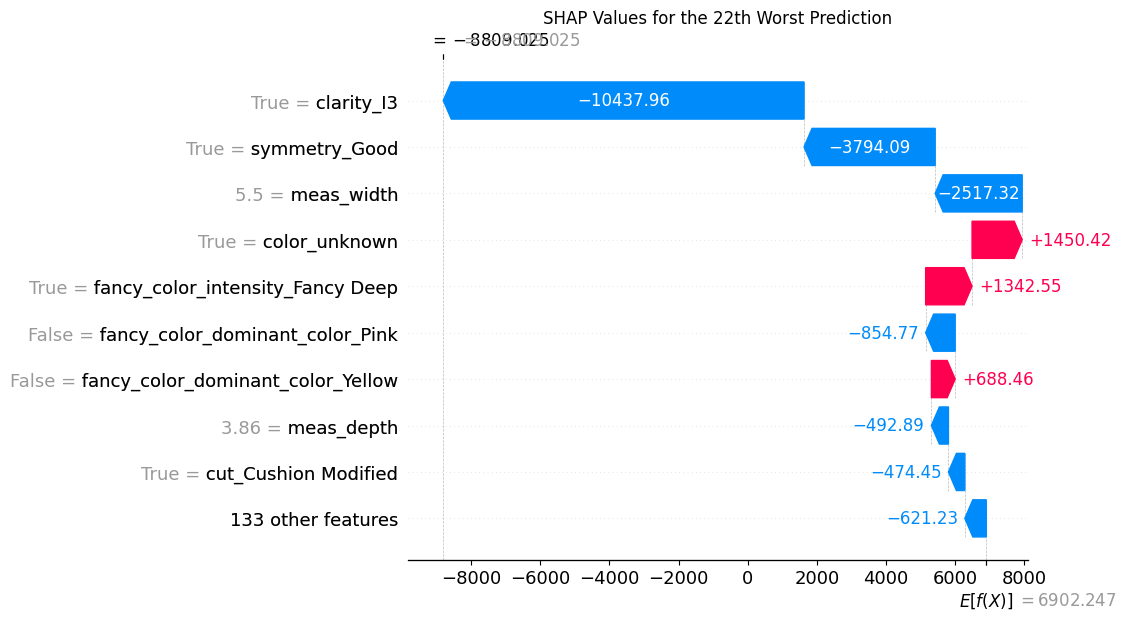

--------------------------------------------------------------
24th Worst Prediction:
Actual Diamond Price: $2,862
Predicted Diamond Price: $14,870
The misestimation is: $-12,008
The error percentage is: 419.55%


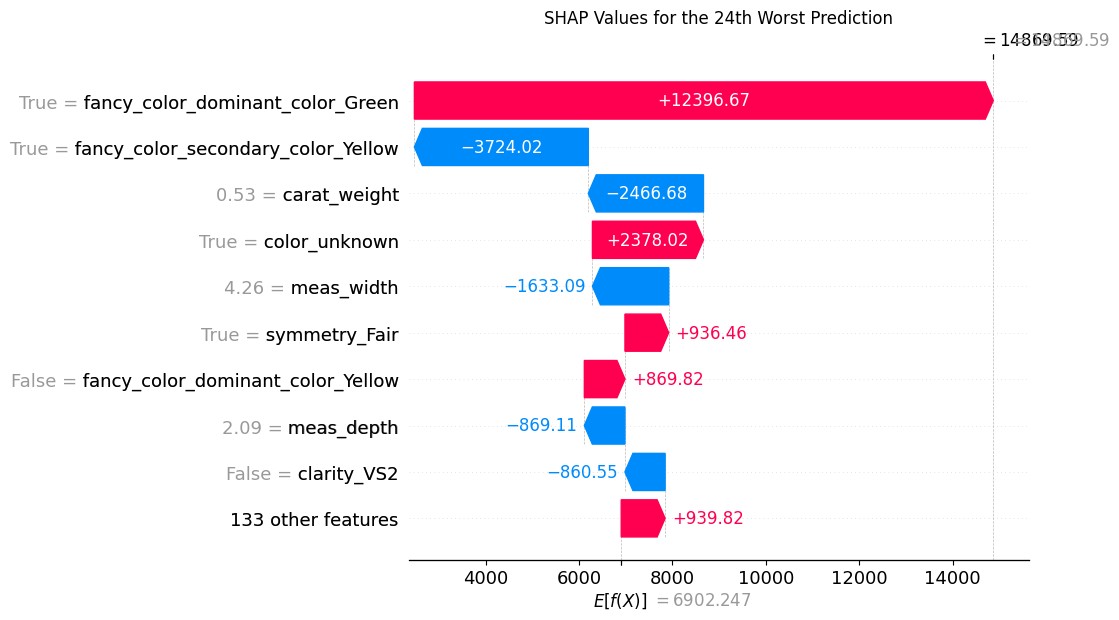

In [191]:
# Now, we look at the 10 worst predictions, and analyze them in the same way, we will show the waterfall plot for the 5th and 10th worst predictions:
worst_predictions = rel_res.sort_values(ascending=False).head(25)

for i, (idx, _) in enumerate(worst_predictions.items()):
    # Showing only for the 5th and 10th worst predictions:
    if i == 21 or i == 23:
        ordinal_id = X_test.index.get_loc(idx)
        actual_price = y_test[idx]
        predicted_price = pred_series[idx]
        print(f"{i+1}th Worst Prediction:")
        print(f"Actual Diamond Price: ${actual_price:,.0f}")
        print(f"Predicted Diamond Price: ${predicted_price:,.0f}")
        print(f"The misestimation is: ${actual_price - predicted_price:,.0f}")
        print(f"The error percentage is: {(predicted_price - actual_price) / actual_price * 100:.2f}%")
        plt.title(f'SHAP Values for the {i+1}th Worst Prediction')
        shap.plots.waterfall(test_shap_values[ordinal_id])
        plt.show()
        # Separating between the two cases, to make it more clear...
        if i == 21:
            print("--------------------------------------------------------------")

Recall that the worst precition our model has made had an error percentage of 1736.93%; <b>however also the 22th and 24th worst predictions are dramatically bad - having an error percentage of -426.26% and 419.55%, respectively</b>.
<br>
As can be seen in the two plots presented above:
<ul>
    <li>
        <b>For the 22th worst prediction (the model has predicted a negative value):</b> the <u>'symmetry_Good'</u> (one of the categories of symmetry column) feature has reduced $3,794.09 from the predicted price; however, the actual diamond price was only $2,700! <b>In other words, this feature has reduced from the predicted price a value which is more than than the actual diamond price!</b> This also points at the counterproductive nature of the 'symmetry' feature.
    </li>
    <br>
    <li>
        <b>Similarly, for the 24th worst prediction:</b> the <u>'symmetry_Fair'</u> (one of the categories of symmetry column) feature has added $936.46 to the predicted price; however, this has also contrinbuted to an overestimation, which also might be pointing at the counterproductive nature of the 'symmetry' feature.
    </li>
</ul>


#### <b><u>2nd Reason for removing 'symmetry' feature</u>: being a <u>highly unbalanced</u> categorical feature:</b>
Let's observe of many percents of the diamond in our dataset are classified as having each type of 'symmetry' classification:

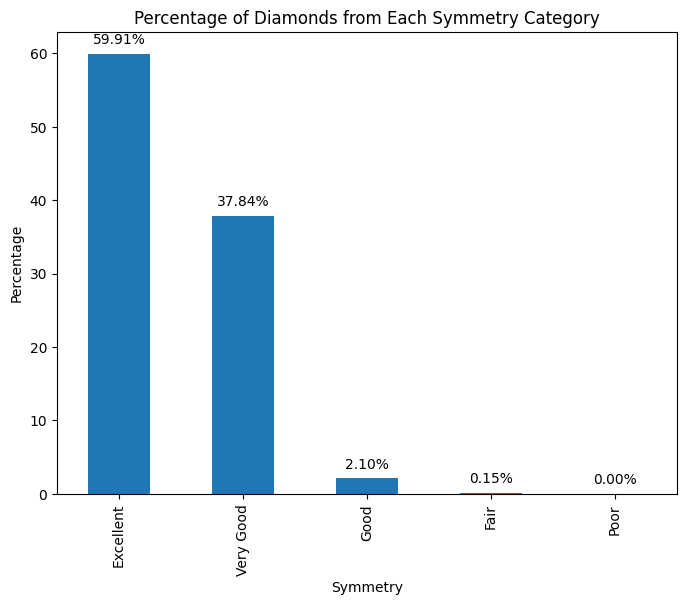

In [192]:
# plotting what % of diamonds are from each symmetry category:
value_counts = dtf['symmetry'].value_counts(normalize=True) * 100
fig, ax = plt.subplots(figsize=(8, 6))
bars = value_counts.plot(kind='bar', ax=ax)
ax.set_title('Percentage of Diamonds from Each Symmetry Category')
ax.set_xlabel('Symmetry')
ax.set_ylabel('Percentage')

# Adding percentage on top of each bar
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{bar.get_height():.2f}%', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

As can be observed from the graph above, <i>'Excellent'</i> and <i>'Very Good'</i> symmetry categories are the most common ones, with a percentage of 59.91% and 37.84%, respectively. It is important to pay attention that actually, <b><u>more than 97%</u></i> of the diamonds are classified as having 'Excellent' or 'Very Good' symmetry categories, which are the best classifications for a symmetry of a diamond!</b>
<br>
On the contrary, <i>'Fair'</i> and <i>'Poor'</i> symmetry categories are the worst classifications for a symmetry of a diamond; we would have wanted to also get representation from these categories in the dataset, so that the model can learn from them as well, and generalize better to new data.<br>
However, practically, <b>these two categories are just not really present in the dataset</b> - only 0.15% of the diaonds are classified as having 'Fair' symmetry, and absolutely 0% are classified as having 'Poor' symmetry.<br><br>
<b>To conclude, while 97.75% of the diamonds are classified as having the best symmetry categories, the worst symmetry categories are almost not represented in the dataset at all - just 0.15% of the diamonds.</b><br>
This makes us suspect that the model <b>might not <i>generalize</i> well to new data</b>, and might not be able to predict well the prices of diamonds with 'Fair' or 'Poor' symmetry categories, since it has not seen enough examples of these categories in the training data. This is an unbalanced column; in some cases, this could also lead to the model <i>memorizing</i> the diamonds with the rare categories, instead of generalizing well to new data. This leads us to suspect whether the 'symmetry' feature is actually counterproductive, and also supports testing whether removing it might improve model's performance.
It should be noted that if I wouldn't have chosen to try and remove this feature, another solution to check for would be unifying categories with low % of diamonds having them. However, since this is not the only reason for considering to remove this feature - it is best to check whether the hypothesis that this feature is counterproductive is true.


### Substep V: Analyzing the <b>lab</b> feature and removing it based on the error analysis:
We will find below strong considerations for removing the 'lab' feature, <b>showing that it is highly unbalanced, and also strong associated and might be <i>multicolinear</i> with the 'fluor_intensity' feature</b>; this also points at the counterproductive nature of the 'lab' feature and leads us to check whether removing it might improve model's performance.

#### <b><u>1st Reason for removing 'lab' feature</u>: being strong associated and might be <i>multicolinear</i> with the 'fluor_intensity' feature:</b>
We will see below that the 'lab' feature</u> is <i>multicolinear</i> with the fluor_intensity feature; as we have learned in class, when having a feature which is strong associated or multicolinear with other features, it is useful to check whether removing it improves model's performance.<br>
Since the 'lab' feature is categorical, I chose to use <b><i><u>Cramer's V Statistic</u></i></b>; this helps assess the strength of association between two categorical variables. It is based on the chi-squared statistic (which we have also discussed in class) and provides a normalized value between 0 and 1, <b>where 0 indicates no association, and 1 indicates a perfect association</b>.<br>
The formula for calculating Cramer's V is:
$$
V = \sqrt{\frac{\chi^2}{n \cdot (\min(C, R) - 1)}}
$$
where:
- $\chi^2$ is the chi-squared statistic (which we have discussed in class, as well as in statistics course).
- $n$ is the number of observations.
- $C$ is the number of columns.
- $R$ is the number of rows.

Let's calculate the Cramer's V statistic between all pairs of categorical variables in the dataset, to understand whether there is something unusual related to the 'lab' feature:

In [193]:
# This function will calcualt ethe Cramer's V statistic between two categorical variables (I will call it for each pair of categorical variables in the dataset):
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Using the 'cramers_v_matrix' function to calculate the Cramer's V statistic between all pairs of categorical variables in the dataset:
def cramers_v_matrix(dtf):
    cols = dtf.columns
    n = len(cols)
    matrix = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            matrix[i, j] = cramers_v(dtf[cols[i]], dtf[cols[j]])
    return pd.DataFrame(matrix, index=cols, columns=cols)

# Now I can get the matrix of Cramer's V statistic between all pairs of categorical variables in the dataset:
cramers_v_matrix(dtf.select_dtypes(include=['object']))


,cut,color,clarity,cut_quality,lab,symmetry,polish,eye_clean,culet_size,culet_condition,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity
cut,1.000000,0.224074,0.051695,0.443361,0.059675,0.326037,0.160754,0.092933,0.047152,0.080694,0.199375,0.223677,0.045033,0.059800,0.226360,0.060721,0.053062,0.236783
color,0.224074,1.000000,0.042340,0.152330,0.143209,0.367099,0.213540,0.053012,0.022678,0.104531,0.147903,0.162245,0.077618,0.085712,0.316251,0.105437,0.082756,0.333272
clarity,0.051695,0.042340,1.000000,0.054608,0.057765,0.079648,0.069095,0.072572,0.017306,0.018231,0.033817,0.039422,0.026507,0.038624,0.052416,0.034284,0.022560,0.044540
cut_quality,0.443361,0.152330,0.054608,1.000000,0.075273,0.334288,0.177490,0.081937,0.032748,0.009491,0.243969,0.334712,0.024019,0.106790,0.152051,0.049691,0.028330,0.154250
lab,0.059675,0.143209,0.057765,0.075273,1.000000,0.035039,0.035043,0.038605,0.206153,0.267667,0.107256,0.133884,0.057437,0.645578,0.040205,0.012480,0.006725,0.040422
symmetry,0.326037,0.367099,0.079648,0.334288,0.035039,1.000000,0.354364,0.056055,0.108925,0.053995,0.195392,0.274111,0.075979,0.065240,0.382300,0.151012,0.090421,0.369130
polish,0.160754,0.213540,0.069095,0.177490,0.035043,0.354364,1.000000,0.032929,0.144582,0.019699,0.084817,0.122662,0.061500,0.071428,0.266986,0.108995,0.064840,0.219144
eye_clean,0.092933,0.053012,0.072572,0.081937,0.038605,0.056055,0.032929,1.000000,0.113243,0.059542,0.174589,0.180698,0.021834,0.020540,0.040126,0.006428,0.006298,0.040214
culet_size,0.047152,0.022678,0.017306,0.032748,0.206153,0.108925,0.144582,0.113243,1.000000,0.048773,0.235661,0.236891,0.071403,0.083971,0.029406,0.017885,0.007327,0.028145
culet_condition,0.080694,0.104531,0.018231,0.009491,0.267667,0.053995,0.019699,0.059542,0.048773,1.000000,0.111107,0.109318,0.018729,0.137752,0.096937,0.027373,0.003152,0.099768


As can be observed in the table above, we can see that <b>the Cramer's V statistic between the 'lab' and 'fluor_intensity' features is <u>0.6455</b>, which is the highest value in the table, and also relatively closer to 1 than to 0</u>. In some applications, according to papers I read online, cramer's v statistic greater than 0.7 is considered very high, so 0.6455 also indicates a relatively strong connection, and should be checked.<br> It should be noted that Cramer's V, which is used for categorical features, doesn't necessarily predict multicolinearity, but a strong association or relationship. While after computing the Cramer's V value I could also encode the categorical feature and then compute the VIF (variance inflation factor), this is not necessary in this case, as after we observed a strong relationship between them, this itself justifies testing whether removing this feature might improve model's performance.
To conclude, this indicates an association between the 'lab' and 'fluor_intensity' features, which means that the 'lab' and 'fluor_intensity' features are relatively highly dependent on each other. In the context of feature selection, this leads us to consider removing one of the features, given that they are highly dependent on each other, and check whether this improves model's performance.

#### <b><u>2nd Reason for removing 'lab' feature</u>: being a <u>highly unbalanced</u> categorical feature:</b>
Let's observe of many percents of the diamond in our dataset are classified as having each type of 'lab' classification:

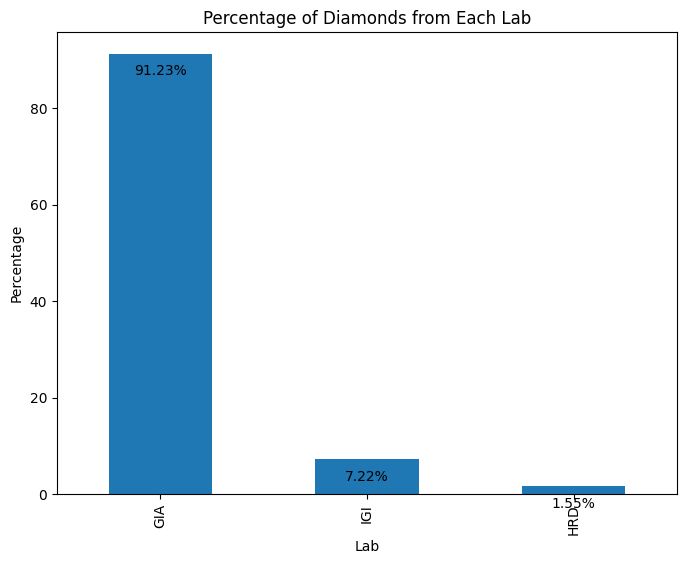

In [194]:
# plotting what % of diamond are from each lab:
value_counts = dtf['lab'].value_counts(normalize=True) * 100
fig, ax = plt.subplots(figsize=(8, 6))
bars = value_counts.plot(kind='bar', ax=ax)
ax.set_title('Percentage of Diamonds from Each Lab')
ax.set_xlabel('Lab')
ax.set_ylabel('Percentage')

# Adding percentage on top of each bar
for bar in bars.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() - 5, f'{bar.get_height():.2f}%', ha='center', va='bottom', color='black', fontsize=10)

plt.show()

As can be observed from the graph above, the <i>'GIA'</i> lab is the most common one, with a percentage of 91.23%. Also, <b><u>more than 98%</u></i> of the diamonds are classified from labs 'GIA' or 'IGI'</b>. On the contrary, the <i>'HRD'</i> lab is hardly represented.<br>
Practically, this column is highly imbalanced; in some cases, such a feature would provide limited information to distinguish between different target outcomes. Moreover, the minority categories ('GIA' and 'IGI') may not have enough samples for the model to learn meaningful patterns, which can reduce the model's ability to generalize well to new data <br>
This makes us suspect that the model <b>might not <i>generalize</i> well to new data</b>, and might not be able to predict well the prices of diamonds from various labs. It has not seen enough examples of diamonds from labs 'IGI' and 'HRD', and it might impact model's performance. This is an unbalanced column; in some cases, this could also lead to the model <i>memorizing</i> the diamonds with the rare categories, instead of generalizing well to new data. This leads us to suspect whether the 'lab' feature is actually counterproductive, and also supports testing whether removing it might improve model's performance.<br>

It should be noted, as noted regarding the 'symmetry' feature, that if I wouldn't have chosen to try and remove this feature, another solution to check for would be unifying categories with low % of diamonds having them. <b>However, since this is not the only reason for considering to remove this feature - it is best to check the hypothesis that this feature is counterproductive</b>.<br>
Let's move on to the last substep, analyzing and justifying the removal of additional last two features:


### Substep VII: Analyzing <u>both</u> the <b>'fancy_color_overtone'</b> and <b>'fancy_color_secondary_color'</b> features and removing them:
<b>This is the easiest substep</b> - we will see that <u>these two features are the two features who have the most missing values in the dataset, <b>having not less than 99.82% and 99.52% missing values!</b></u> This also points at the counterproductive nature of the 'lab' feature and leads us to check whether removing it might improve model's performance.

In [195]:
nanDict = {}
for col in categorialCols:
    nanDict[col] = len(dtf[dtf[col].isnull() | (dtf[col] == "unknown")])

# Now, I will create another dictionary, now the value will be the percentage of fields with NaN or "unknown" value for each categorial column:
nanDictPerc = {}
for key in nanDict.keys():
    nanDictPerc[key] = nanDict[key] / len(dtf) * 100

# printing the names of the 2 columns with the highest percentage of NaN or "unknown" values:
sorted_nanDictPerc = dict(sorted(nanDictPerc.items(), key=lambda item: item[1], reverse=True))
print(f"The 2 columns with the highest percentage of missing values are: {list(sorted_nanDictPerc.keys())[:2]}")

The 2 columns with the highest percentage of missing values are: ['fancy_color_overtone', 'fancy_color_secondary_color']


We can see that these are the two columns with the most missing values! <b>In other words, there is no other column with more missing columns than these two</b>. Let's see exactly how percents of each of these columns are missing values:

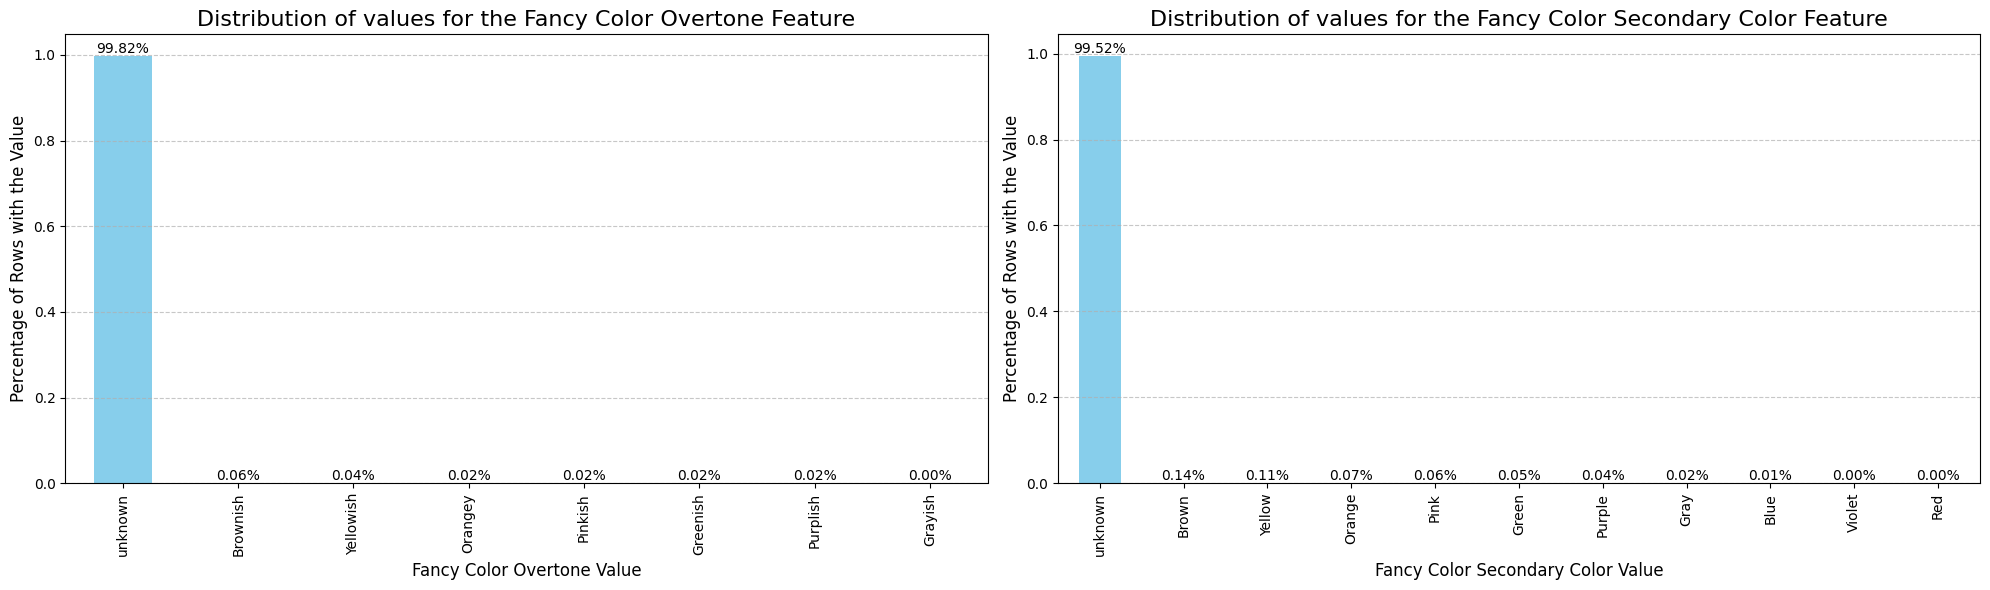

In [196]:
# Presenting graphs showing the distribution of the 'fancy_color_overtone' and 'fancy_color_secondary_color' features (near each other to save space and be convenient to compare):
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

value_counts_overtone = dtf['fancy_color_overtone'].value_counts(normalize=True)
value_counts_overtone.plot(kind='bar', color='skyblue', ax=axes[0])
axes[0].set_title('Distribution of values for the Fancy Color Overtone Feature', fontsize=16)
axes[0].set_xlabel('Fancy Color Overtone Value', fontsize=12)
axes[0].set_ylabel('Percentage of Rows with the Value', fontsize=12)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Adding the % on top of each bar for 'fancy_color_overtone':
for i, v in enumerate(value_counts_overtone):
    axes[0].text(i, v, f'{v:.2%}', ha='center', va='bottom', fontsize=10)

value_counts_secondary_color = dtf['fancy_color_secondary_color'].value_counts(normalize=True)
value_counts_secondary_color.plot(kind='bar', color='skyblue', ax=axes[1])
axes[1].set_title('Distribution of values for the Fancy Color Secondary Color Feature', fontsize=16)
axes[1].set_xlabel('Fancy Color Secondary Color Value', fontsize=12)
axes[1].set_ylabel('Percentage of Rows with the Value', fontsize=12)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adding the % on top of each bar for 'fancy_color_secondary_color':
for i, v in enumerate(value_counts_secondary_color):
    axes[1].text(i, v, f'{v:.2%}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


<b>As we can see, the 'fancy_color_overtone' feature has 99.82% of missing values, and the 'fancy_color_secondary_color' feature has 99.52% of missing values</b>; As we have learned in class, while for columns with not many missing values, we can try to use different techniques for filling the missing values inside them (e.g. filling with the mode value/using <i>predictive imputation</i> - as I did in step 2 of this notebook), when having a very high percentage of missing values, sometimes it is best to drop this feature.
<br><br>
So, when having more than 99% missing values, when the mode value is actually 'unknown', it is very logical and advised to examine the possibility of whether removing this column could improve the performance of our model (as will indeed be the case!).


#### <b>Eventually, after justifying the removal of each of these 8 features, now I can practically test whether this steps improves model's performance! Let's remove all of these 8 features and calculate the evaluation metrics:</b>

In [197]:
# I remove these two columns permanently, in total, these are the columns we remove:
# Numeric columns (they are not One-Hot-Encoded) to remove: ['depth_percent', 'table_percent']
# Categorical columns (they are One-Hot-Encoded) to remove: ['girdle_max', 'girdle_min', 'lab', 'symmetry', 'fancy_color_overtone', 'fancy_color_secondary_color']

def get_encoded_columns(X, original_col):
    return [col for col in X.columns if col.startswith(f"{original_col}_")]

def is_categorical_feature(X, col):
    return len(get_encoded_columns(X, col)) > 0


# Removing the selected features
X_train = X_train.drop(['depth_percent', 'table_percent'], axis=1)
X_test = X_test.drop(['depth_percent', 'table_percent'], axis=1)
selected_features_to_remove_categorical = ['girdle_max', 'girdle_min', 'lab', 'symmetry', 'fancy_color_overtone', 'fancy_color_secondary_color']


# Removing the selected features
for feat in selected_features_to_remove_categorical:
    if is_categorical_feature(X_train, feat):
        encoded_cols = get_encoded_columns(X_train, feat)
        X_train = X_train.drop(encoded_cols, axis=1)
        X_test = X_test.drop(encoded_cols, axis=1)



In [198]:
# Initializing the XGBoost regressor model:
xgb_model = XGBRegressor()

# Training the model on the training data (fitted to the training data):
xgb_model.fit(X_train, y_train)

# Now, we can make predictions on the test data:
prediction_afterStep4 = xgb_model.predict(X_test)

# Evaluating the model using the evaluation metrics we have imported above:
xgb_r2_afterStep4 = r2_score(y_test, prediction_afterStep4)
xgb_mape_afterStep4 = mean_absolute_percentage_error(y_test, prediction_afterStep4)
xgb_mae_afterStep4 = mean_absolute_error(y_test, prediction_afterStep4)
xgb_rmse_afterStep4 = np.sqrt(mean_squared_error(y_test, prediction_afterStep4))

# Print the evaluation metrics
print(f"R^2 Score: {xgb_r2_afterStep4:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape_afterStep4:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae_afterStep4:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_afterStep4:.0f}")

                              

R^2 Score: 0.891
Mean Absolute Percentage Error (MAPE): 0.138
Mean Absolute Error (MAE): 1093
Root Mean Squared Error (RMSE): 9221


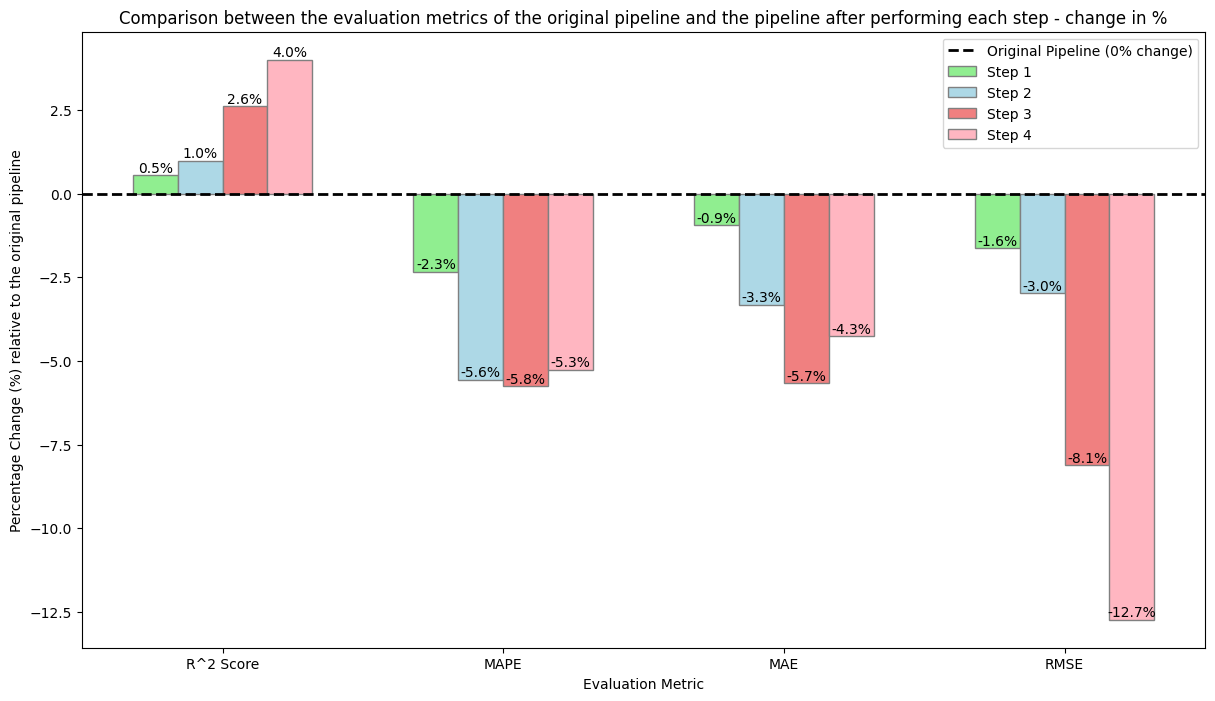

In [199]:
# Updating the comparison plot to also include the evaluation metrics after the 4th step:
evaluation_metrics = ['R^2 Score', 'MAPE', 'MAE', 'RMSE']
original_values = [xgb_r2_originalPipeline, xgb_mape_originalPipeline, xgb_mae_originalPipeline, xgb_rmse_originalPipeline]
step1_values = [xgb_r2_afterStep1, xgb_mape_afterStep1, xgb_mae_afterStep1, xgb_rmse_afterStep1]
step2_values = [xgb_r2_afterStep2, xgb_mape_afterStep2, xgb_mae_afterStep2, xgb_rmse_afterStep2]
step3_values = [xgb_r2_afterStep3, xgb_mape_afterStep3, xgb_mae_afterStep3, xgb_rmse_afterStep3]
step4_values = [xgb_r2_afterStep4, xgb_mape_afterStep4, xgb_mae_afterStep4, xgb_rmse_afterStep4]
colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightpink']

plot_evaluation_metrics_comparison(evaluation_metrics, original_values, step1_values, step2_values, step3_values, step4_values, step_labels=['Step 1', 'Step 2', 'Step 3', 'Step 4'], colors=colors)

As we can see, this step has further improved model's performance; while it achieved a little bit worse result for the MAE and MAPE, <b>it has very significantly improved the RMSE value and the $R^2$ score!</b> The new model (until this step) has $R^2$ score which is <b>4.0%</b> better than the original model, and RMSE score which is <b>-12.7%</b> better (lower) than the score of the original model! It is important to note that this model is still much better in terms of ALL these four evaluation metrics, compared to the original pipeline. In addition, we will see that the little gap that we see in the MAE and MAPE will be improved significantly also. <b>This step is very important since further improving the $R^2$ score, which was already very high, was very hard to achieve when I explored various other steps that can be performed</b>.<br>
Let's move on and perform additional steps to further improve model's performance:

---

### <b><u>Step 4</u>: Hyperparameter Tuning</b>:


<b>As will be shown below, eventually in this step I will perform hyperparameter tuning for 4 hyperparameters, improving model's performance</b>. Instead of only doing trial and error or just using tools like <i>GridSearchCV</i>, to make the process more efficient and more data-science oriented, we can use the <b><u>Loss-Curve Plot</u></b> to guide our hyperparameter tuning process.
<br>
The loss curve is a plot we have learned how to use in Machine-Learning class last year, taught by Prof. Gal Chechik; this plot shows how the RMSE values change over the epochs for both the training and validation sets.
<br><br>
While the <b><i>test set</i></b> is used to evaluate the final model's performance after training is complete, and should not be used during model development, the <b><i>validation set</i></b> is typically <u>a subset of the training data</u> (chosen randomly from the training data), which is used to evaluate model's performance during training. This helps us understand the model's performance on unseen data. Moreover, it helps detect <b><i>overfitting</i></b> and <b><i>underfitting</i></b>.
<br><br>

The loss curve plot shows two lines:
<ol>
    <li>A line representing the <b><i>training loss</i></b>.</li>
    <li>A line representing the <b><i>validation loss</i></b>.</li>
</ol> <br>
<b><u>What is Training Loss?</u></b> <br>
<i>Training loss</i> is the error value that the model is trying to minimize during the training process (by adjusting the model's weights, biases for example by using gradient descent - things learned in ML course); it is calculated based on the difference between the predicted values and the actual target values for the training set.
<br>While it is great to see that the training loss decreases over time, as the model learns from the training data, we should bear in mind that it is essential to monitor the validation loss to ensure that the model is not overfitting to the training data.

<b><u>And what is Validation Loss?</u></b> <br>
<i>Validation loss</i> is the error value calculated based on the difference between the predicted values and the actual target values for the validation set; it is used in order to evaluate model's performance on unseen data that was not used during training. It is important to minimize the validation loss, in order to make sure that the model <b><u><i>generalizes</i> well to new data</u></b>.<br>
Monitoring the validation loss helps detect overfitting, where the model performs well on the training data but poorly on unseen data. In particular, if the validation loss starts to increase while the training loss decreases, it indicates that the model is overfitting to the training data.

Let's see the Loss-Curve plot for our model (according to the pipeline at the end of step 3):

[0]	validation_0-rmse:19993.25732	validation_1-rmse:22628.48676
[1]	validation_0-rmse:16246.46644	validation_1-rmse:19653.65897
[2]	validation_0-rmse:13643.85399	validation_1-rmse:17002.04820
[3]	validation_0-rmse:11980.63537	validation_1-rmse:15511.68689
[4]	validation_0-rmse:10686.08019	validation_1-rmse:14353.64384
[5]	validation_0-rmse:9758.47128	validation_1-rmse:13444.68485
[6]	validation_0-rmse:8980.06995	validation_1-rmse:12706.28365
[7]	validation_0-rmse:8316.03183	validation_1-rmse:12140.21183
[8]	validation_0-rmse:7898.22890	validation_1-rmse:11719.84601
[9]	validation_0-rmse:7613.96218	validation_1-rmse:11518.70716
[10]	validation_0-rmse:7355.79602	validation_1-rmse:11372.81646
[11]	validation_0-rmse:7058.42432	validation_1-rmse:11096.10421
[12]	validation_0-rmse:6727.27033	validation_1-rmse:10758.74544
[13]	validation_0-rmse:6601.97774	validation_1-rmse:10582.40141
[14]	validation_0-rmse:6410.77159	validation_1-rmse:10405.42054
[15]	validation_0-rmse:6294.99504	validation_

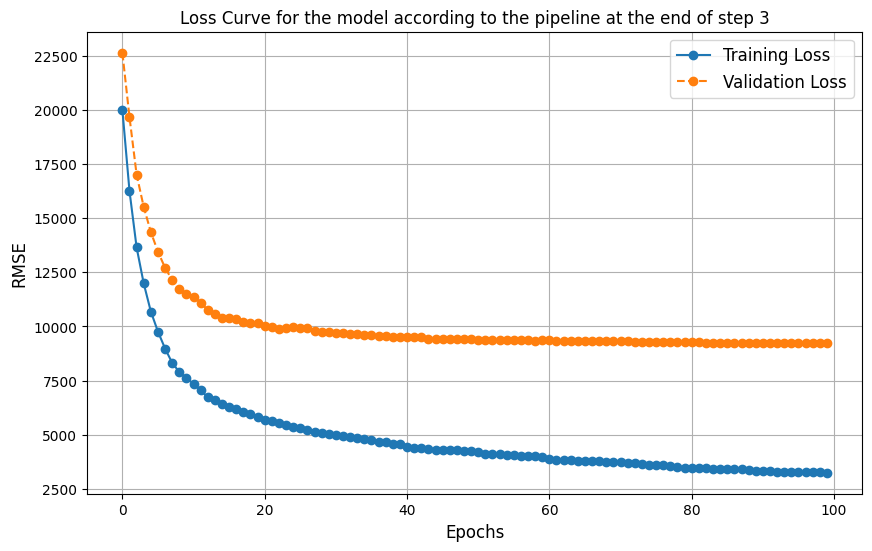

In [200]:
# Plotting the loss curve for the model according to the pipeline at the end of step 3:
eval_set = [(X_train, y_train), (X_test, y_test)]
xgb_model.fit(
    X_train,
    y_train,
    eval_set=eval_set,   
)

# Extracting the evaluation results:
evals_result = xgb_model.evals_result()

# Plotting the loss-curve plot:
plt.figure(figsize=(10, 6))
plt.plot(evals_result['validation_0']['rmse'], label='Training Loss', marker='o')
plt.plot(evals_result['validation_1']['rmse'], label='Validation Loss', marker='o', linestyle='--')
plt.title('Loss Curve for the model according to the pipeline at the end of step 3')
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

As we can see, the loss-curve plot above shows a <b>monotonic decrease of the training loss when the epoch number increases</b> which makes sense since more data is added for training.<br>
Our <u>expectation</u> is that the validation loss will also be improved by increasing number of epochs due to an improved trained model and progressively making fewer errors on the training set; however, it seems that <b>after about ~35 epochs <u>the validation loss starts to flatten out</u> and the gap betwen the training loss and validation losses widens as long as we increase the number of epochs</b>. This is not a healthy situation and may be a <b>preliminary indication of a potential <i>overfitting</i> problem</b>, though not yet occuring since actual overfitting will show increasing validation loss from a certain epoch onwards.<br>

In our case we observe a validation loss plateau while the training loss continues to decrease, and <b>this suggests that the model might be "memorizing" the training data rather than learning to generalize from it and that it has already extracted most of the useful patterns from the validation set and <u>can't improve further without overfitting</u></b>.<br><br>

<b>There are several ways to look into this subject in order to address this issue, trying to improve the performance of the model, including:</b><br>
<ul>
    <li>Applying <b><i><u>regularization</u></i> techniques</b> (<i>L1/L2</i> regularization).</li>
    <li>Applying other hyperparameter tuning (aside from regularization), such as <b><i><u>learning rate and number of estimators</u></i></b>, which impact the way the model operates and how complex we require it to be (further explanation below).</li>
    <li>Another approach might be trying to use early stopping of the training process- this will flatten out both training and validation losses and in certain cases of overfitting may prevent it from happening, apart from saving computational effort. I have tried this technique but without any noticeable improvement which probabably results from the fact that the validation loss did not exhibit actual increase and thereby actual overfitting; in order not to make the notebook longer than necessary (with no improvement) I will not show the attempt to use this approach.</li>
</ul>

<b><u>Applying Regularization</u></b>:<br>
I will apply the most common regularizations, which are:<br>
<ul>
    <li><b><i>L1 regularization via alpha</i></b> as the hyperparameter to be regularized- this can change how sparse is the model by <u>setting some of the weights of the features to be zero</u> thereby enabling removal of irrelevant features.</li>
    <li><b><i>L2 regularization via lambda</i></b> as the hyperparameter to be regularized- this can change the weights of specific features in order to limit their influence and reduce potential overfitting. The number of features is not reduced like in the case of L1 regularization but <u>the influence of some of the features is reduced</u> such that if these features are too dominant and may cause overfitting, the L2 regularization process can reduce the influence of these parameters, yet still being able to get the contribution of these features in an efficient manner.</li>
</ul>
Both these techniques may reduce the conern for overfitting and may reduce the flattenning phenomena that can be observed with the validation loss graph.
<br><br>


Aside from regularizations that apply different weights to parameters, there are other hyperparameters that may improve the way the validation loss graph behaves and help mitigate the potential overfitting problem that may occur. The hyperparameters which seem to be most relevant for tuning in this case are:<br>
<ul>
    <li>
        <b>Learning Rate (<i>learning_rate</i>)</b>: the training data shows improvement that surpasses the improvement of the validated data- this suggests that the training is might be performed too fast and skips some of the points that may help with the validation data. <u>Too fast training may result in overfitting or tendency for overfitting</u> and therefore slowing down the training process by reducing the learning rate will allow the model to fit more aspects of the model and even when the model's learning reaches the plateau, as we observed, it will still keep on learning and refining the model.
    </li>
    <li> 
        <b>Number of Estimators (<i>n_estimators</i>)</b>: increasing the number of estimators in general may contribute to the accuracy of the model but there is a risk of overfitting while adding too much estimators. If the model complexity does not require/justify more than a certain number of estimators, then adding more estimators will artifically improve the training loss while not contibuting to the validation loss and potentially causing overfitting. So I will check wheher tuning this hyperparameter might improve model's performance.
    </li>
</ul>

In order to tune these hyperparameters, it is crucial to first verify whether our model uses the default values of the library for them, or whether we have changed them:


In [201]:
# I will try to get the parameters of the XGBoost model:
# Important note: according to what I read online, if for some hyperparameters the value is 'None', it means that the hyperparameter is not set, and the default value is used:
print(xgb_model.get_params())

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': None, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}


We can see that: `'learning_rate': None, 'n_estimators': None, 'reg_alpha': None, 'reg_lambda': None`. This means we haven't changed yet these hyperparameters - our model uses their default values.

I have implemented a code that goes through several values of the hyperparameters that were investigated- <b>regularization L1 and L2, learning rate and number of estimators</b>, which are all potential hyperparameters that can solve similar issues such as potential overfitting. I found the <b><i>optimal</i> values</b> for our purpose, following is the code that I used in order to optimize these values (the code takes quite a long time to find the optimal values and throughout this work I have run it partially for each parameter in order to optimize it specifically and only at the end I ran a global search; the following code presents a <i>partial</i> hyperparameter search that was part of this investigation process). <b>I have put this code in a comment, because there is no need to run it every time and it takes a few minutes to run, and I want the notebook to be <i><u>reproducible</u></i> and run quickly</b>:

In [202]:
"""
# Now, we try to do hyperparameter tuning, to improve the model's performance:
# I will use GridSearchCV to find the best hyperparameters:

# Defining the hyperparameters we want to tune:
param_grid = {
    'learning_rate': [0.05, 0.1, 0.2, 0.3],
    'n_estimators': [100, 300, 400],
    'alpha': [0.1, 0.7, 2],
    'reg_lambda': [0.1, 0.5, 1]
}


# Initializing the XGBoost regressor model:
xgb_model = XGBRegressor()

# Using GridSearchCV to find the best hyperparameters for the XGBoost model:
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')
grid_search.fit(X_train, y_train)

# Printing the best hyperparameters found by GridSearchCV:
print("Best hyperparameters found by GridSearchCV:")
print(grid_search.best_params_)
print()

# Now, we can make predictions on the test data using the model with the best hyperparameters:
prediction = grid_search.predict(X_test)

# Evaluating the model using the evaluation metrics we have imported above:
xgb_r2 = r2_score(y_test, prediction)
xgb_mape = mean_absolute_percentage_error(y_test, prediction)
xgb_mae = mean_absolute_error(y_test, prediction)
xgb_rmse = np.sqrt(mean_squared_error(y_test, prediction))

# Print the evaluation metrics
print(f"R^2 Score: {xgb_r2:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse:.0f}")
"""


'\n# Now, we try to do hyperparameter tuning, to improve the model\'s performance:\n# I will use GridSearchCV to find the best hyperparameters:\n\n# Defining the hyperparameters we want to tune:\nparam_grid = {\n    \'learning_rate\': [0.05, 0.1, 0.2, 0.3],\n    \'n_estimators\': [100, 300, 400],\n    \'alpha\': [0.1, 0.7, 2],\n    \'reg_lambda\': [0.1, 0.5, 1]\n}\n\n\n# Initializing the XGBoost regressor model:\nxgb_model = XGBRegressor()\n\n# Using GridSearchCV to find the best hyperparameters for the XGBoost model:\ngrid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring=\'r2\')\ngrid_search.fit(X_train, y_train)\n\n# Printing the best hyperparameters found by GridSearchCV:\nprint("Best hyperparameters found by GridSearchCV:")\nprint(grid_search.best_params_)\nprint()\n\n# Now, we can make predictions on the test data using the model with the best hyperparameters:\nprediction = grid_search.predict(X_test)\n\n# Evaluating the model u


Let us analyze the results of these hyperparameters:
<ul>
    <li>
        <b>Learning rate</b>: the default value is 0.3 and in order to improve the validation loss tendency to become flat, I tried to reduce the learning rate in order to dwell more on feature estimation. Values between 0.05 and 0.3 were tested and <u>the optimal value was 0.1</u>.
    </li>
    <li>
        <b>Number of estimators</b>: the default value is 100 and in order to improve the model performance I have tried to increase its value between 100 and 400. A too high value may eventually lead to overfitting and therefore my expectation was that a mid-range value will prevail and indeed <u>I have found 300 to be optimal</u>.
    </li>
    <li>
        <b>L1 regularization (alpha)</b>: in this case, there is no default value (or the default is no regularization) and I have tried to use this parameter in the range of 0.1-2. <u>A value of 0.7 was found to be optimal</u> and it is quite high which means that there is a considerable portion of parameters that are not productive or not contributing and <b>this is not a surprise as I have already removed some of the features already and found in previous steps that some of the features can be removed and thereby improve the performance of the model</b>.
    </li>
    <li>
        <b>L2 regularization (lambda)</b>: similar to L1, there is no default value (the default is no regularization) and I have tried this parameter in the range of 0.1-1. <u>A value of 1.0 was found to be optimal</u> and again it is quite high and exhibits again the presence of parameters that are less productive and less contributing, which aligns with my previous findings.
    </li>
</ul>
<br>
Now, we can finally use these tuned hyperparameter values in our model, and examine the changes in the performance of the model:

In [203]:
# Initializing the XGBoost regressor model:
xgb_model = XGBRegressor(learning_rate=0.1, n_estimators=300, alpha=0.7, reg_lambda=1)

# Training the model on the training data (fitted to the training data):
xgb_model.fit(X_train, y_train)

# Now, we can make predictions on the test data:
prediction_afterStep5 = xgb_model.predict(X_test)


# Evaluating the model using the evaluation metrics we have imported above:
xgb_r2_afterStep5 = r2_score(y_test, prediction_afterStep5)
xgb_mape_afterStep5 = mean_absolute_percentage_error(y_test, prediction_afterStep5)
xgb_mae_afterStep5 = mean_absolute_error(y_test, prediction_afterStep5)
xgb_rmse_afterStep5 = np.sqrt(mean_squared_error(y_test, prediction_afterStep5))

# Print the evaluation metrics
print(f"R^2 Score: {xgb_r2_afterStep5:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape_afterStep5:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae_afterStep5:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_afterStep5:.0f}")

R^2 Score: 0.893
Mean Absolute Percentage Error (MAPE): 0.128
Mean Absolute Error (MAE): 1027
Root Mean Squared Error (RMSE): 9136


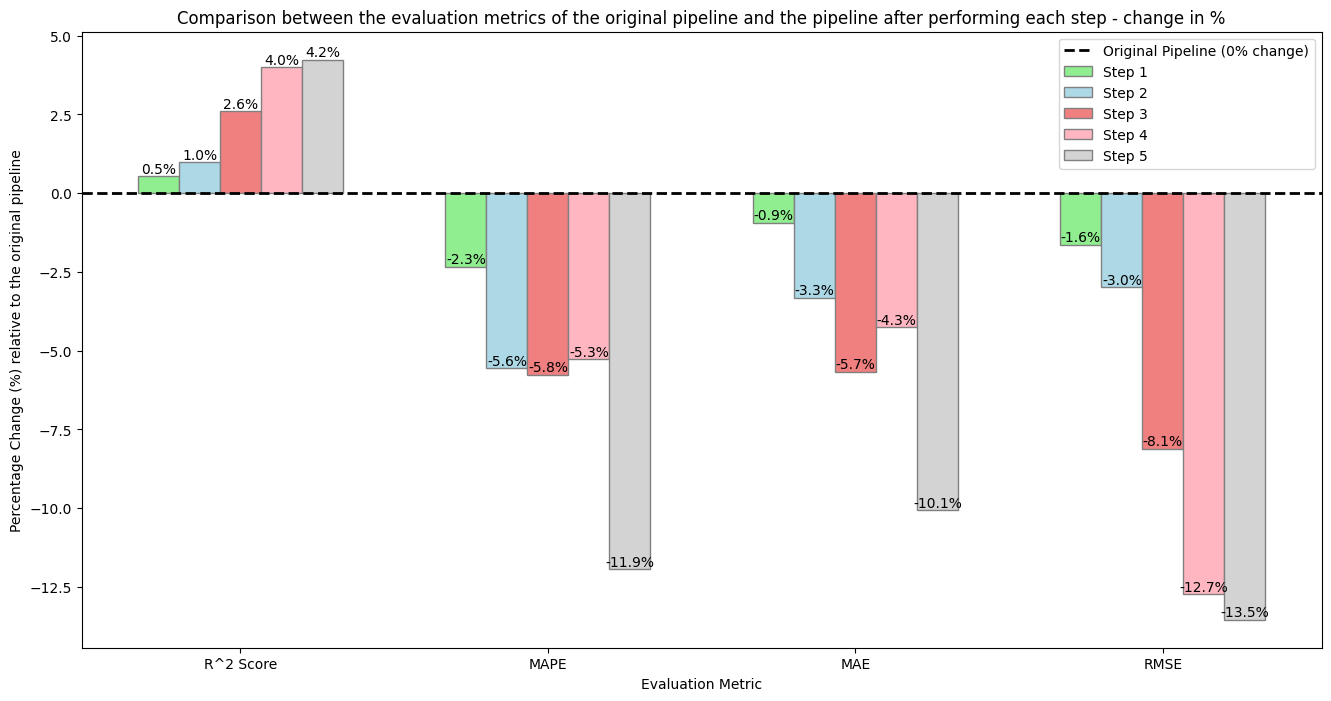

In [204]:
# Updating the comparison plot to also include the evaluation metrics after the 5th step:
evaluation_metrics = ['R^2 Score', 'MAPE', 'MAE', 'RMSE']
original_values = [xgb_r2_originalPipeline, xgb_mape_originalPipeline, xgb_mae_originalPipeline, xgb_rmse_originalPipeline]
step1_values = [xgb_r2_afterStep1, xgb_mape_afterStep1, xgb_mae_afterStep1, xgb_rmse_afterStep1]
step2_values = [xgb_r2_afterStep2, xgb_mape_afterStep2, xgb_mae_afterStep2, xgb_rmse_afterStep2]
step3_values = [xgb_r2_afterStep3, xgb_mape_afterStep3, xgb_mae_afterStep3, xgb_rmse_afterStep3]
step4_values = [xgb_r2_afterStep4, xgb_mape_afterStep4, xgb_mae_afterStep4, xgb_rmse_afterStep4]
step5_values = [xgb_r2_afterStep5, xgb_mape_afterStep5, xgb_mae_afterStep5, xgb_rmse_afterStep5]
colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightpink', 'lightgrey']

plot_evaluation_metrics_comparison(evaluation_metrics, original_values, step1_values, step2_values, step3_values, step4_values, step5_values, step_labels=['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5'], colors=colors)

As can be observed, this hyperparameter tuning has improved all 4 evaluation metrics presented above! <b>Mainly, the improvement in the <i>MAPE</i> and <i>MAE</i> seems to be drastic</b>; comparing to the baseline model, the improved model up to this step has MAPE score which is <b>-11.9% better</b> (lower), RMSE score which is <b>-13.5% better</b> (lower) and MAE score which is <b>-10.1% better</b> (lower). <b>We can also observe an additional improvement to the already-high $R^2$ score, which now is <u>0.893</u></b>, which is a great improvement (especially when the original model $R^2$ score was already very good).<br>
Let's continue and apply the <u>last step</u> in the model improvement process:

---

### <b><u>Step 6</u>: Balancing data for fairness or model accuracy - Applying Box-Cox Transformation (with $\lambda$=0.65, close to a square-root transformation) on the target variable (diamond price)</b>:

Trying this technique in our dataset is <u>deeply rooted in conclusions which may be drawn from graphs and markdowns presented in part 1 of the project</u>, and especially:
<ol>
    <li><b>Vizualization #1 from part 1 of the project</b>, presenting the Distribution of the target variable (total_sales_price, which is the Diamond Price).</li>
    <li>The graph <b>"Residuals of the Model in Percentage (%) as a function of the Actual Diamond Price" which is presented as part of the Error Analysis presented in part 1 of the project</b> (under the subsections "Are you able to find commonalities between the erroneous samples?" and "On which items the model performs the worst? The best? Why do you think that is?").</li>
    <li><b>Analyzing the MAE value</b> for our model, and noticing that based on the calculated MAE value, for "normal" and not super-expensive diamonds, for example - for a $2,000 diamonds, the average error is over 50%!</li>
</ol>
I will explain what conclusions may be drawn from both of them:

#### <b><u>1st Reason for applying Box-Cox transformation ($\lambda$=0.65) on the diamond price</u>: Analysis of vizualization #1 (from part 1 of the project)</i>:</b>


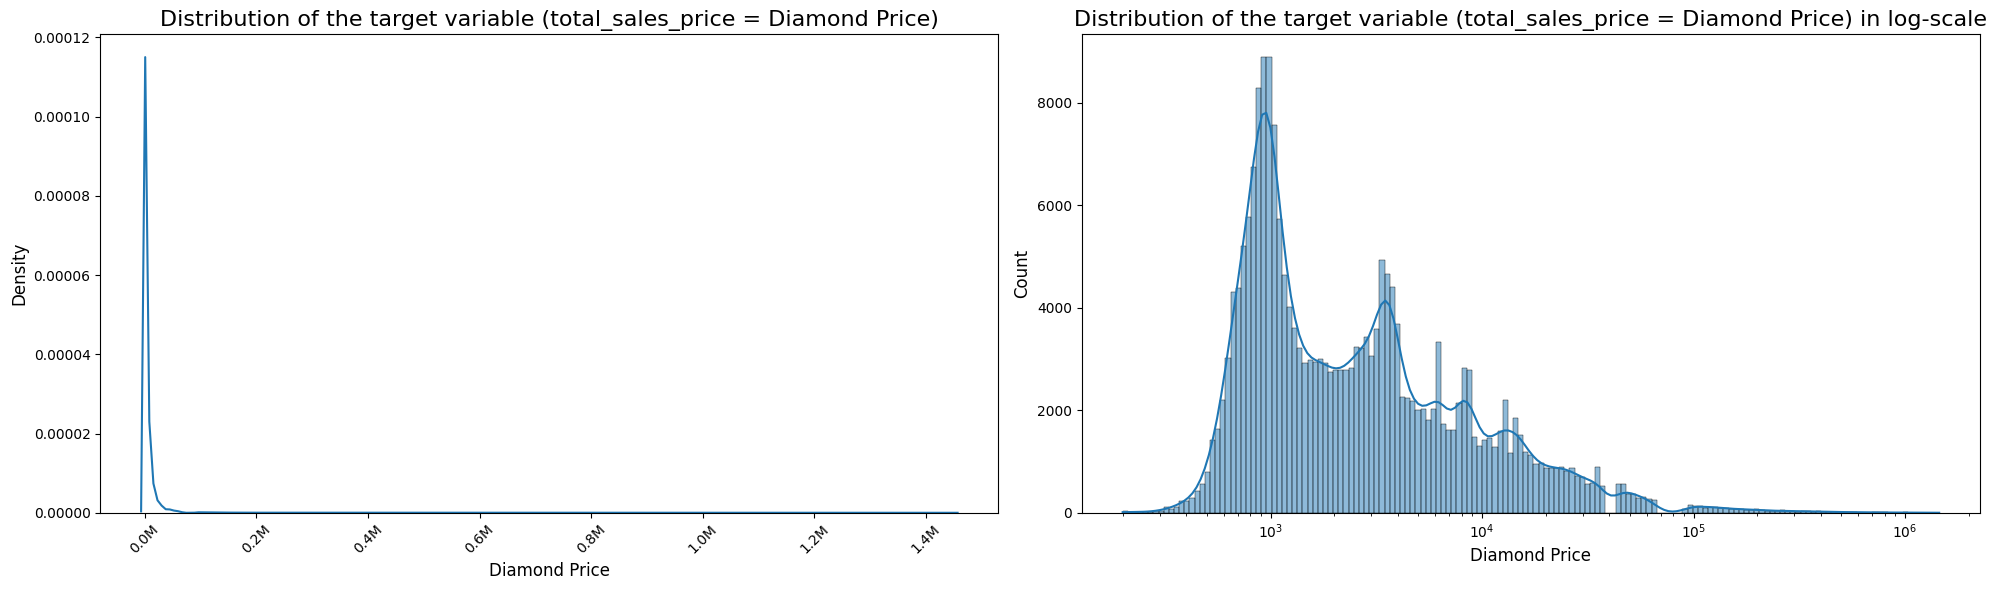

In [205]:
plt.figure(figsize=(20, 6))

# First subplot - KDE plot
plt.subplot(1, 2, 1)
sns.kdeplot(dtf.total_sales_price)
plt.ylabel('Density', fontsize=12)
plt.xlabel('Diamond Price', fontsize=12)
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x / 1e6:.1f}M'))
ticks = np.arange(0, dtf.total_sales_price.max(), step=0.2e6)
plt.xticks(ticks, [f'{tick / 1e6:.1f}M' for tick in ticks], rotation=45)
plt.title('Distribution of the target variable (total_sales_price = Diamond Price)', fontsize=16)

# Second subplot - Histogram with log scale
plt.subplot(1, 2, 2)
sns.histplot(dtf.total_sales_price, kde=True, log_scale=True)
plt.title('Distribution of the target variable (total_sales_price = Diamond Price) in log-scale', fontsize=16)
plt.xlabel('Diamond Price', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.tight_layout()
plt.show()

From the graphs above, we can observe that <b>most prices are still mostly around \$100-\$10,000 and extending up to \$100,000 with a negligible tail beyond that price</b>.
There are some distinct peaks at \$1000 and around \$3500 which are probably related to popular products based on certain social preferences. <br>
<b>As I mentioned in part 1 of the project, this might impact the model's ability to predict price values, given that while most of the diamonds cost around \$100-\$10,000, there are diamonds which cost more than \$100,000</b>. Following the explanation regarding this visualization in part 1 of the project, it already noted that: `"it will be very interesting to calculate the log(price) values and test whether this transform improves the models ability to predict the diamond price"`.
<br><br>
We can see that the diamond prices are <b>heavily right-skewed</b>, so based on what we have learned in class, I assumed that applying sub-linear transformation on the target variable would reduce skeweness, "compress" extraordinary expensive diamond prices (dealing with extreme outliers), making the model more robust. Indeed, we will see that applying such a transformation significantly improves the model's performance.

#### <b><u>2nd Reason for applying Box-Cox transformation ($\lambda$=0.65) on the diamond price</u>: Error Analysis & Examining the residuals</i>:</b>

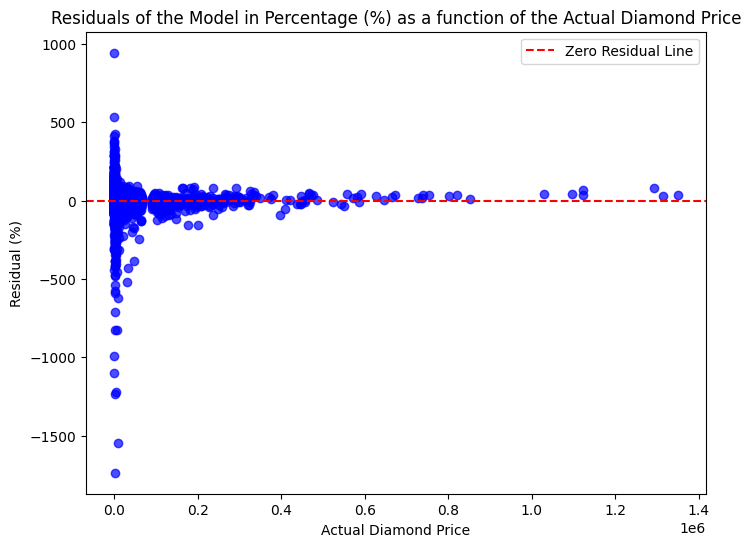

In [206]:
residuals = y_test - prediction_OriginalPipeline
residualsInPercent = residuals / y_test * 100

# Visualize residuals as a percentage, x-axis is the actual diamond price
plt.figure(figsize=(8, 6))
plt.scatter(y_test, residualsInPercent, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Model in Percentage (%) as a function of the Actual Diamond Price')
plt.xlabel('Actual Diamond Price')
plt.ylabel('Residual (%)')
plt.legend()
plt.show()


As can be observed above, when looking at the value of errors in percents, we can see that the more significant residuals (in percents) are around the lower values of the target variable. <b><i>This means that the model is not performing well on the lower values of the target variable! In other words, when looking on the error in percents compared to the price, the model performs better on the higher values of the target variable, and worse on the lower values of the target variable</i></b>.
<br>
As we saw in the distribution of the target variable, the distribution is not normal, and the values are skewed to the right and therefore tends to have a higher prediction error for more expensive diamonds, which stems from of a big difference between "cheap" diamonds and expensive diamonds.


#### <b><u>3rd Reason for applying Box-Cox transformation ($\lambda$=0.65) on the diamond price</u>: Error Analysis & Analyzing the MAE score for our model</i>:</b>
Let's see further support for this claim, by recalling what we have understood in part 1 of the project by analyzing the MAE score which our model gets. The MAE is defined by:

- <b>MAE (Mean Absolute Error)</b>: The average of the absolute differences between the predicted and actual values. It gives an idea of how wrong the predictions are. It is expressed in the same units as the variable (on the contrary to MAPE, for example). Therefore, there are no general values which can be considered as good or bad, it is scale-dependant.
$$
\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} \left| y_i - \hat{y}_i \right|
$$
Let's calculate the MAE for our model:


In [207]:
xgb_mae = mean_absolute_error(y_test, prediction_OriginalPipeline)
print(f"Mean Absolute Error (MAE): {xgb_mae:.0f}")

Mean Absolute Error (MAE): 1141


In [208]:
# To understand the meaning of this MAE result, computing the median price of diamonds in the whole dataset:
median_price = dtf.total_sales_price.median()
print(f"The median price of diamonds in the dataset is: ${median_price:.0f}")
mean_price = dtf.total_sales_price.mean()
print(f"The mean price of diamonds in the dataset is: ${mean_price:.0f}")

The median price of diamonds in the dataset is: $1970
The mean price of diamonds in the dataset is: $6908


As we can see above, our model achieved a MAE score of 1141; this means that the price predictions of our model are, on average, different by $1141. Since this is unit-dependant, I also calculated above the mean price & median price of diamonds in the dataset. Similar to what we have observed in the visualizations section, <b>we get now another indication showing that our data is highly skewed - the mean diamond price ($6908) is much higher than the median diamond price ($1970). In other words, a small number of very expensive diamonds raise the mean, while the majority of diamonds are priced closer to the median.</b>

It is important to understand that while the MAE score ($1141) is 16.5% of the mean diamond price ($6908), which is not ideal but not really terrible, in fact - <b>the MAE score is 58% of the median price</b> ($1970). This is unacceptable, as most of the diamonds are near the median, and not very expensive (relatively speaking).

<b>In simple words, for "normal" and not super-expensive diamonds, for example - for a $2,000 diamonds, the average error is over 50%! And the majority of diamonds in the dataset aren't that expensive, so there is plenty of room for improvement.</b>


<b><u>This suggests, even regardless of the residual-analysis, that the model may be performing better for high-priced diamonds (closer to the mean) than for lower-priced ones (closer to the median)</u>. All of these observations, which were highlighted in the previous part of the project, suggest that there is reason to believe that applying a sub-linear transformation to the target variable may improve the model's overall performance, particularly for the majority of the dataset, which is near the median price.</b>
<br><br>

#### <b><u>Choosing the sub-linear transformation</u></b>:
After testing several types of non-linear (but <i>sub-linear</i>) transformations on the target variable, I have found that even though a sub-linear transformation is preferred, in order not to interfere with the $r^2$ score that we have already improved (since the $r^2$ score is linear in its nature since it tracks absolute errors rather than relative errors), we should use a transformation that is not too much non-linear; and therefore <b>a square-root-like transformation</b> is preferred over a log-transformation.<br><br>
A square-root-like transformation has a better balance of <b>minimizing relative errors</b> (such as <i>MAPE</i> and <i>MAE</i>) resulting from large outliers while still maintaining good results for absolue errors (<i>$r^2$</i> and <i>RMSE</i>) due to better linearity relationship between the features and the target.<br>
Moreover, after we understand that a square-root-like transformation is more appropriate, I have also fine-tuned the actual transformation by using <b><i>Box-Cox</i> transformation</b>.
<b>As we have learned in lecture #5 in the course</b>, the Box-Cox transformation is a family of power transformations that stabilizes variance and makes data more normal-like. It is defined as:

$$
y_{\text{transformed}} = 
\begin{cases} 
\frac{y^\lambda - 1}{\lambda}, & \text{if } \lambda \neq 0 \\
\ln(y), & \text{if } \lambda = 0
\end{cases}
$$
Where $\lambda$ is the transformation parameter that determines the specific form of the transformation.<br> For example, $\lambda$=0.65 describes a square-root trasformation.

> It should also be noted that Box-Cox transformation requires that the original data is positive, but this is not a problem in our case - as the target variable is diamond price, which is indeed positive. In addition, I will note that I tried using direct Box-Cox optimization; however, this technique focuses on making the data more normally distributed, and not on optimizing the specific model's performance metrics (and resulted in worse results than what I achieved below).

Therefore, <u>I have optimized the <b><i>$\lambda$</i> parameter</b> to find the best results</u>, resulting in <b>$\lambda$=0.65 which is close to a square-root transformation</b>.

<b>Now, let's perform the Box-Cox transformation (with $\lambda$=0.65), and analyze how this effects model's performance</b>:

Model's performance using Box-Cox transformation with Lambda=0.65:
R^2 Score: 0.884
Mean Absolute Percentage Error (MAPE): 0.095
Mean Absolute Error (MAE): 962
Root Mean Squared Error (RMSE): 9500


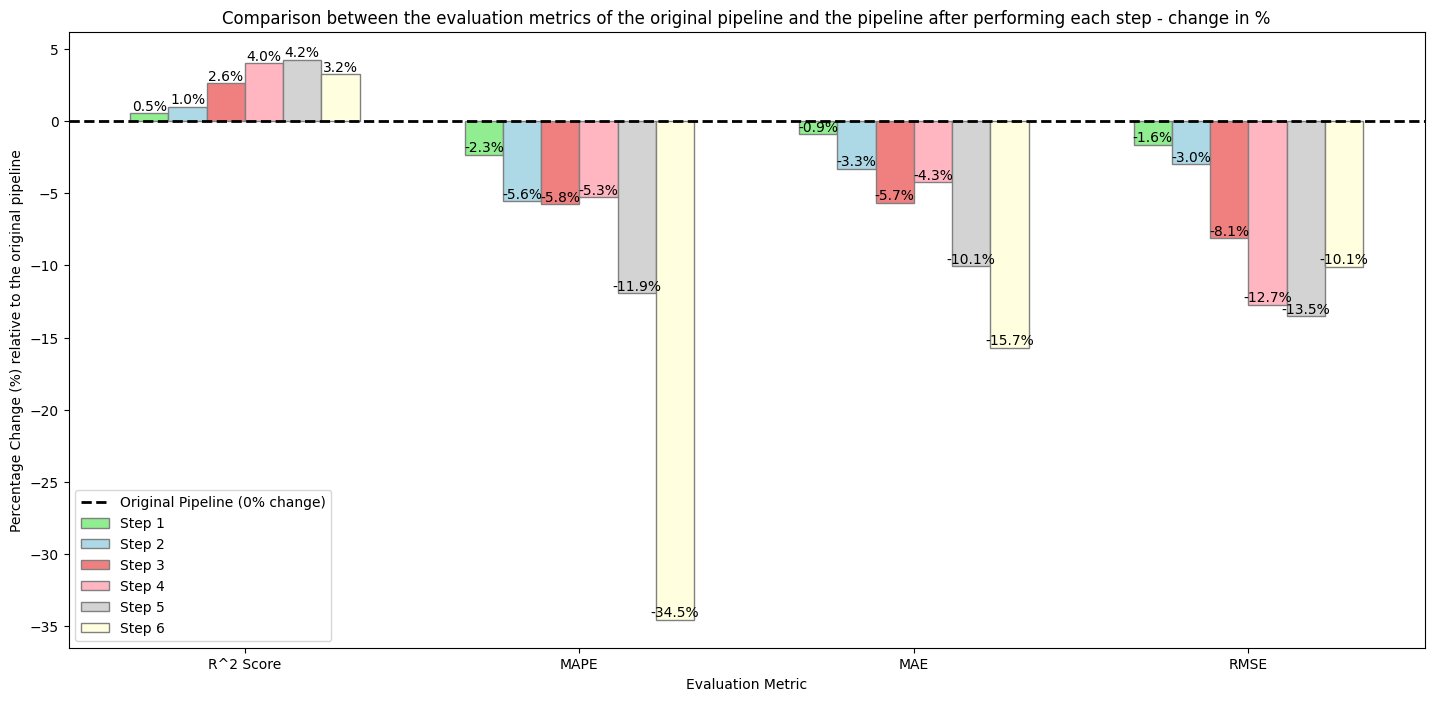

In [ ]:
# Performing the Box-Cox transformation with lambda=0.65 on the diamond price:
lambda_val = 0.65
# Defining a small constant to avoid numerical issues:
epsilon = 1e-6


# Apply the Box-Cox transformation
if lambda_val == 0:
    y_train_transformed = np.log(y_train)
    y_test_transformed = np.log(y_test)
else:
    y_train_transformed = (np.power(y_train, lambda_val) - 1) / lambda_val
    y_test_transformed = (np.power(y_test, lambda_val) - 1) / lambda_val

# Fit model
xgb_model.fit(X_train, y_train_transformed)
pred_transformed = xgb_model.predict(X_test)
# This fixes the problem of getting NaN because there were numerical issues - adding a small constant:
pred_transformed = np.maximum(pred_transformed, epsilon)

# Inverse Box-Cox transformation
if lambda_val == 0:
    predictions = np.exp(pred_transformed)
else:
    predictions = np.power((lambda_val * pred_transformed) + 1, 1 / lambda_val)

# Check for NaN before evaluation
if np.isnan(predictions).any():
    print(f"Error: Lambda {lambda_val}: NaN encountered in predictions.")    

# Calculate metrics
xgb_r2_afterStep6 = r2_score(y_test, predictions)
xgb_mape_afterStep6 = mean_absolute_percentage_error(y_test, predictions)
xgb_mae_afterStep6 = mean_absolute_error(y_test, predictions)
xgb_rmse_afterStep6 = np.sqrt(mean_squared_error(y_test, predictions))

prediction_afterStep6 = predictions

# Printing the evaluation metrics:
print(f"Model's performance using Box-Cox transformation with Lambda={lambda_val}:")
print(f"R^2 Score: {xgb_r2_afterStep6:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape_afterStep6:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae_afterStep6:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_afterStep6:.0f}")

# Updating the comparison plot to also include the evaluation metrics after the 5th step:
evaluation_metrics = ['R^2 Score', 'MAPE', 'MAE', 'RMSE']
original_values = [xgb_r2_originalPipeline, xgb_mape_originalPipeline, xgb_mae_originalPipeline, xgb_rmse_originalPipeline]
step1_values = [xgb_r2_afterStep1, xgb_mape_afterStep1, xgb_mae_afterStep1, xgb_rmse_afterStep1]
step2_values = [xgb_r2_afterStep2, xgb_mape_afterStep2, xgb_mae_afterStep2, xgb_rmse_afterStep2]
step3_values = [xgb_r2_afterStep3, xgb_mape_afterStep3, xgb_mae_afterStep3, xgb_rmse_afterStep3]
step4_values = [xgb_r2_afterStep4, xgb_mape_afterStep4, xgb_mae_afterStep4, xgb_rmse_afterStep4]
step5_values = [xgb_r2_afterStep5, xgb_mape_afterStep5, xgb_mae_afterStep5, xgb_rmse_afterStep5]
step6_values = [xgb_r2_afterStep6, xgb_mape_afterStep6, xgb_mae_afterStep6, xgb_rmse_afterStep6]
colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightpink', 'lightgrey', 'lightyellow']
#'lightyellow', 'lightgrey', 'lightcyan', 'lightmagenta', 'lightorange', 'lightbrown'

plot_evaluation_metrics_comparison(evaluation_metrics, original_values, step1_values, step2_values, step3_values, step4_values, step5_values, step6_values, step_labels=['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5', 'Step 6'], colors=colors)

As we can see, this step has further improved model's performance; while it achieved a little bit worse results for the $R^2$ and RMSE compared to the results after performing only the first 5 steps, <b>it has very significantly improved the <i>MAPE</i> and <i>MAE</i> scores</b>. However, it is important to note that this model is still much better in terms of ALL these four evaluation metrics, compared to the original pipeline - it also improves the $R^2$ score by 3.2% and the <i>RMSE</i> score by 10.1% relative to the original model. <b>This step is very important since is provides a dramatic improvement to the MAPE score (and also to the MAE), which were already improved; achieving improvement of 34.5% in the MAPE score is very significant</b>.<br><br>
<b>It is the combination of these 6 steps that has improved the pipeline, to the point where 3 out of these 4 evaluation metrics have been improved by a double-digit percentage figure</b> (and also the remaining evaluation metric has been improved). I will elaborate and analyze the improved model on the next section, right below:

-----
# 3. Analyzing the Improved Model:
### <b>Feature Importance</b>:
Let's compare between the beeswarm plots of the SHAP values for the <u>original</u> and <u>improved</u> models:

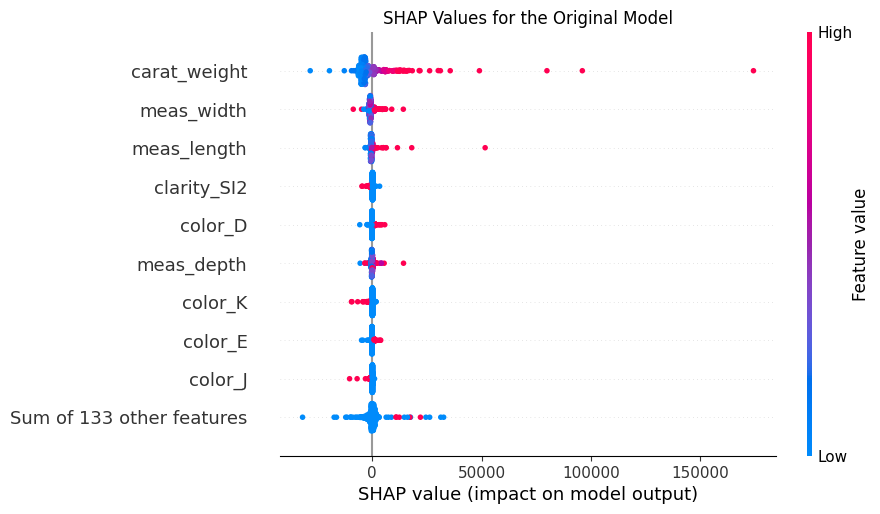

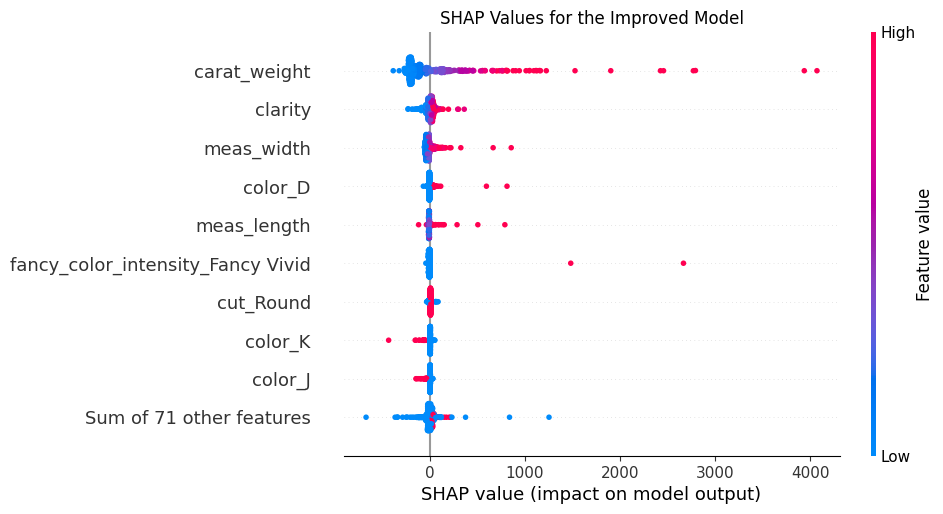

In [210]:
feature_names = xgb_model_OriginalPipeline.feature_names_in_
shap_sample_OriginalPipeline = X_train_OriginalPipeline[feature_names].sample(500)

explainer_OriginalPipeline = shap.TreeExplainer(xgb_model_OriginalPipeline)
shap_values_OriginalPipeline = explainer_OriginalPipeline(shap_sample_OriginalPipeline)

plt.title('SHAP Values for the Original Model')
shap.plots.beeswarm(shap_values_OriginalPipeline)


feature_names = xgb_model.feature_names_in_
shap_sample = X_train[feature_names].sample(500)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(shap_sample)

plt.title('SHAP Values for the Improved Model')
shap.plots.beeswarm(shap_values)

Comparing between the beeswarm plots of the SHAP values for the original and improved pipelines, shows a significant difference which results from step 3 we have performed in the pipeline.<br>
<b>Originally, we can see that the 'clarity' feature (and especially not all of its categories) did <u>not</u> have a significant impact on the model's predictions</b>, according to the beeswarm plot of the original model; however, after the feature engineering step, <b>the clarity feature became a prominent feature in the model</b>, showing right after the carat weight feature in the beeswarm plot.<br>
During step 3 of the model improvement process, I have performed two things:
<ul>
    <li>Instead of performing One-Hot-Encoding, as done in the original pipeline, <b>I used <i>Ordinal Encoding</i> to encode the clarity feature, which preserved the ordinal relationship between the clarity levels</b>.
    </li>
    <li>In addition, I dealt with the anomaly related to the SI3 clarity level, which as explained in step 3 is NOT globally recognized, and we <b>penalized the diamonds with this clarity level (SI3)</b>.
    </li>
</ul>
Overall, we can see that the changes performed in step 3 - ordinal encoding for the 'clarity' feature & dealing with the SI3 clarity level, changes which we already saw that have improved the model by the side-by-side comparison presented in step 3, <u>are also reflected in the SHAP values</u>, showing the significance of the clarity feature, as a prominent feature in the model's predictions.<br><br>
<b>To see the change more clearly, we can also plot the <i>dependence plot</i> for the 'clarity feature', which will show the relationship between the clarity feature and the model's predictions:</b>

Dependence Plot for the Clarity Feature for the improved Pipeline:


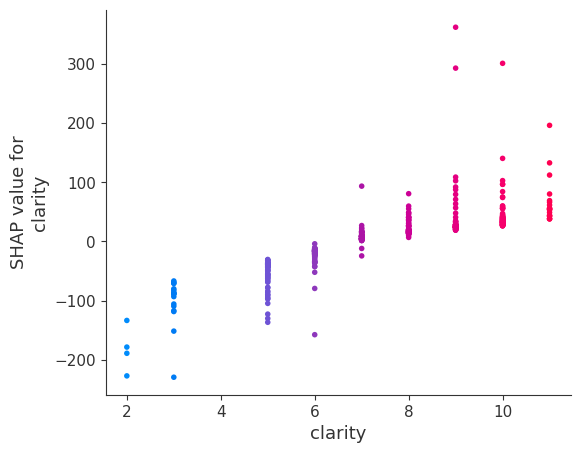

In [211]:
# Plotting a dependence plot for the 'clarity' feature (for the improved pipeline):
print('Dependence Plot for the Clarity Feature for the improved Pipeline:')
shap.dependence_plot('clarity', shap_values.values, shap_sample, interaction_index='clarity')

The dependence plot above shows the relationship between the 'clarity' feature and the model's predictions. <b>We can see that the feature importance, the shap values for our model for the clarity feature increase as the clarity level improves, which is consistent with our prior knowledge that higher clarity diamonds are more valuable</b>.<br>
In order to better see the trend of increase in the shap values as the 'clarity' feature increases, I will filter the shap values to only include the values between the 10th and 90th percentiles (this makes the y-axis be in an appropriate scale, and not "zoomed-out" due to outliers):

Dependence Plot for the Clarity Feature for the improved Pipeline:


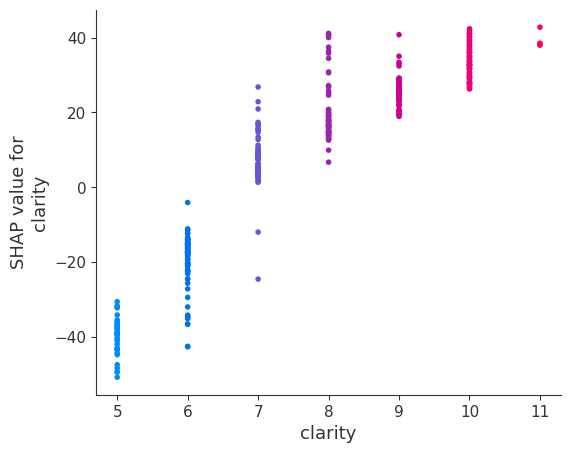

In [212]:
# In order to better see the trend of increase in the shap values as the 'clarity' feature increases, I will filter the shap values to only include the values between the 10th and 90th percentiles:
# Convert feature_names to a list
feature_names_list = feature_names.tolist()

# Taking only the shap values belonging to the 'clarity' feature, between the 10th and 90th percentiles:
shap_clarity = shap_values.values[:, feature_names_list.index('clarity')]
mask = (shap_clarity > np.percentile(shap_clarity, 10)) & (shap_clarity < np.percentile(shap_clarity, 90))
shap_values_25_75 = shap_values[mask]
shap_sample_25_75 = shap_sample[mask]

# Plotting a dependence plot for the 'clarity' feature (for the improved pipeline):
print('Dependence Plot for the Clarity Feature for the improved Pipeline:')
shap.dependence_plot('clarity', shap_values_25_75.values, shap_sample_25_75, interaction_index='clarity')

Now we can better see that the feature importance, the shap values for our model for the clarity feature increase as the clarity level improves; this reflects the ordinal relationship between the clarity levels, <b>which was preserved by using the Ordinal Encoding</b> for the 'clarity' feature during the feature engineering step in the pipeline.
> Note: I have also tried using <i>permutation_importance</i> from <i>sklearn</i> library, and the results were almost the same, so there is no point showing the same thing twice.
<br>

Let's also see the dependence plot of the SHAP values for the 'carat_weight' feature:

Dependence Plot for the Carat Weight Feature for the IMPROVED Pipeline:


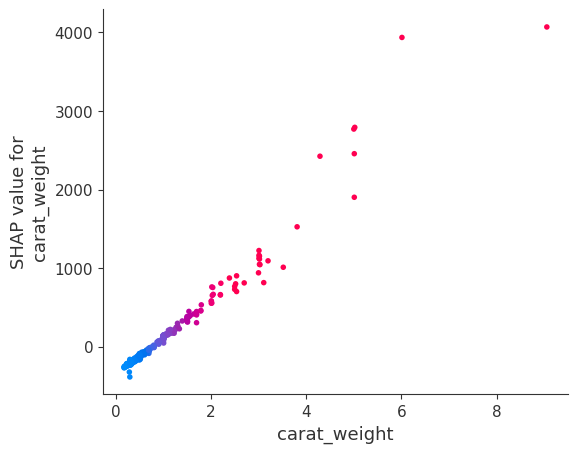

In [213]:
# Plotting a dependence plot for the 'carat_weight' feature (for the improved pipeline)
print('Dependence Plot for the Carat Weight Feature for the IMPROVED Pipeline:')
shap.dependence_plot('carat_weight', shap_values.values, shap_sample, interaction_index='carat_weight')

As can be observed from the plot above, up to a value of approximately 4 of the 'carat_weight' feature, we can see that <b>as the carat_weight value increases, the SHAP value increases in an approximately linear mannar</b>; after that value, the number of samples is quite low - <b>these are relatively rare diamonds, which are very heavy</b>. These high weight diamonds do NOT follow the linear behavior and seem to have a somewhat less definitve behavior, though the number of samples is quite low to provide a model for that; this makes sense, as these diamonds are probably more unique and their price is priced accordingly.<br><br>

Similarly, we can also see that the <i>'meas_width'</i> feature has a similar effect on the diamond price; <b>as its value increases (it is a numerical continuous feature), it makes the model's prediction higher</b>. In particular, we can see that diamonds having a 'meas_width' value of <u>approximately 7</u> and above have a significant influence on model's predictions, driving predictions higher.

Dependence Plot for the Meas Width Feature for the IMPROVED Pipeline:


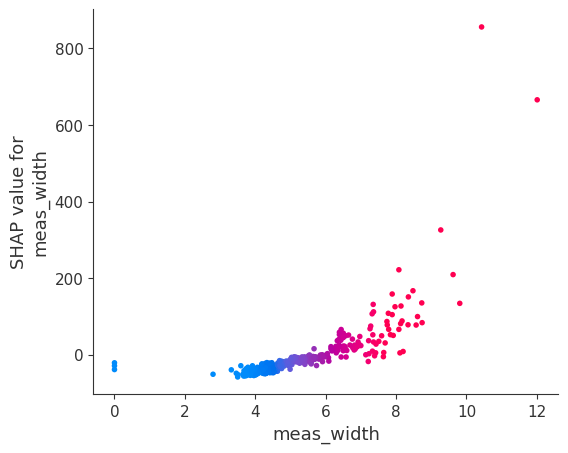

In [214]:
# Plotting a dependence plot for the 'meas_width' feature (for the improved pipeline)
print('Dependence Plot for the Meas Width Feature for the IMPROVED Pipeline:')
shap.dependence_plot('meas_width', shap_values.values, shap_sample, interaction_index='meas_width')

-----
### <b>Explain Model Performance</b>:
Let's compare the results of the improved model against the baseline and explain why it performs better; there are endless evaluation metrics and plots that are relevant and can be shown here, but in order to make it clear I will only <u>calculate and present the most meaningful metrics</u> , after I checked various options, and chose the most important ones (we will see more "popular" evaluation metrics and also more specific ones such as AIC and BIC):
First of all, I will show the plot I have used throught all the model improvement process (after each step I showed this plot with the updated results, adding the results for the current step), now I will show it with all the final results I have gathered throughout the 6 improvement steps:

R^2 Score: 0.884
Mean Absolute Percentage Error (MAPE): 0.095
Mean Absolute Error (MAE): 962
Root Mean Squared Error (RMSE): 9500


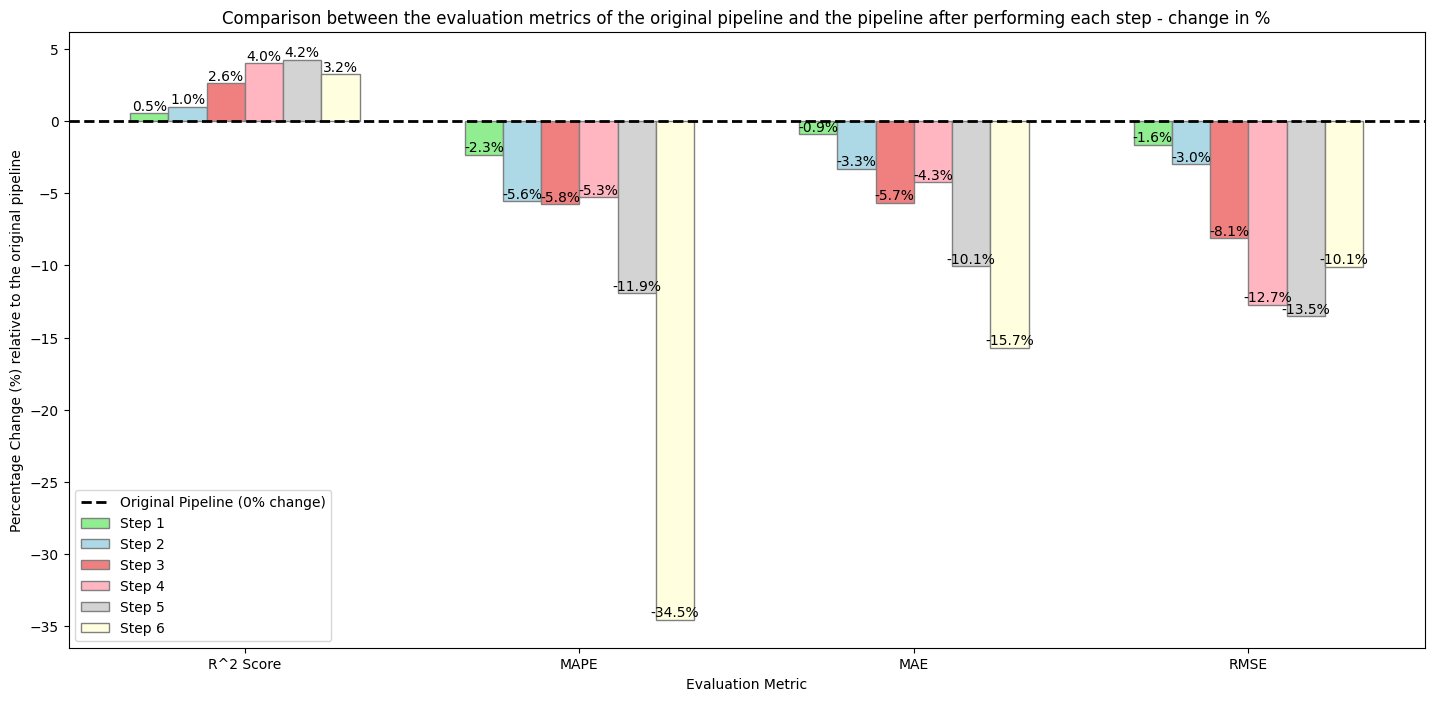

In [215]:
# Print the evaluation metrics
print(f"R^2 Score: {xgb_r2_afterStep6:.3f}")
print(f"Mean Absolute Percentage Error (MAPE): {xgb_mape_afterStep6:.3f}")
print(f"Mean Absolute Error (MAE): {xgb_mae_afterStep6:.0f}")
print(f"Root Mean Squared Error (RMSE): {xgb_rmse_afterStep6:.0f}")
colors = ['lightgreen', 'lightblue', 'lightcoral', 'lightpink', 'lightgrey', 'lightyellow']


plot_evaluation_metrics_comparison(evaluation_metrics, original_values, step1_values, step2_values, step3_values, step4_values, step5_values, step6_values, step_labels=['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5', 'Step 6'], colors=colors)

The plot above shows the <b>continuous improvement in the four evaluation metrics throught the model improvement process</b>; namely, we can really see the improvement between each step to another. <b>The improvements are gradual, and built one on top of the other</b>. In other words, it is the combination between all of these steps that has lead to the significant final improvement in all these four evaluation metrics.<br>
It should be noted that although step 6 is very significant (especially in terms of improving the MAPE score, and also the MAE score) if we care more about the R^2 and RMSE scores, then we should perform steps 1-5, without step 6. However, overall, this step is also beneficial as can be observed.<br>
In particular, we can see that:
<ul>
    <li><b>The R^2</b> score has <b>increased by %3.2 (or even 4.2% without step 6)</b> from the original pipeline. Considering the relatively high R^2 score value we started with, even in the original pipeline (0.856), this is a fantastic improvement (given that R^2 score cannot be bigger than 1.0).</li>
    <li><b>The MAPE</b> (Mean Absolute Percentage Error, is a metric that measures the percentage difference between the predicted and actual values) score has <b>decreased by -34.5%</b> from the original pipeline! This is a dramatic improvement in this score.</li>
    <li><b>The MAE</b> (Mean Absolute Error, the average of the absolute differences between the predicted and actual values) score has <b>decreased by -15.7%</b> from the original pipeline. This is also a very significant improvement relative to the original model, indicating that the model's predictions are much closer to the actual values, which is a very significant improvement.</li>
    <li><b>The RMSE</b> (Root Mean Squared Error, the square root of the average of the squared differences between the predicted and actual values) has <b>decreased by -10.1% (or even -13.5% without step 6)</b> from the original pipeline. This also means that the model's predictions are very close to the actual values, which is a significant improvement.</li>
</ul>
Aside from slight changes throughout the six steps, in most of the cases and metrics there is a monotonic improvement of all aspects for each of the steps taken.
<br>
Let's also see a plot comparing the actual values of each of these 4 evaluation metrics:

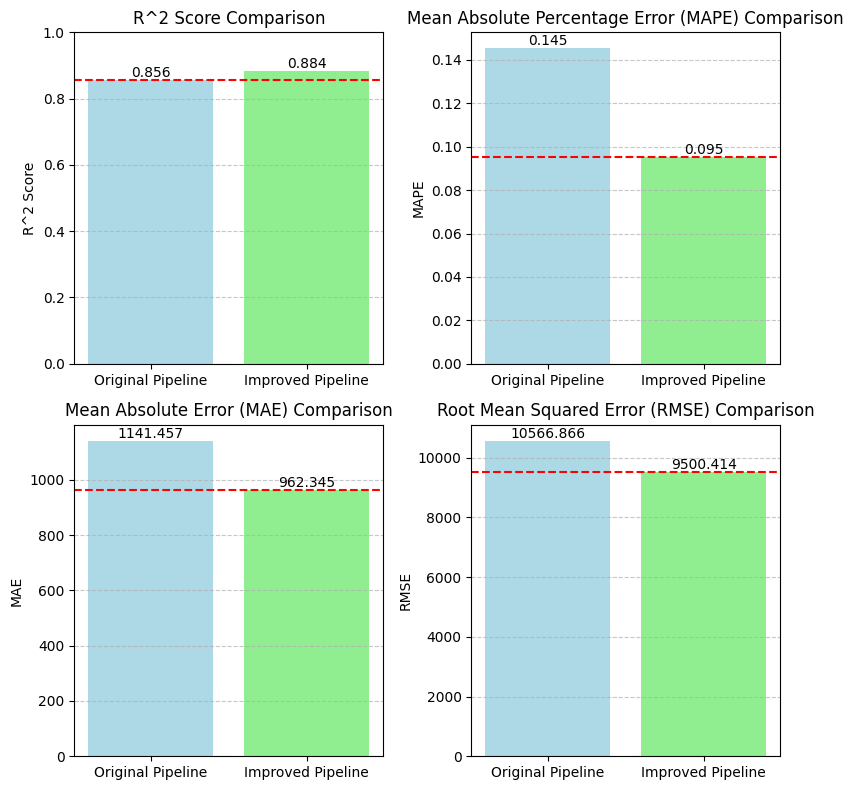

In [232]:
# Plotting a graph comparing each of the 4 evaluation metrics for the original pipeline and the improved pipeline:
plt.figure(figsize=(8, 8))

# Plotting the R^2 Score
plt.subplot(2, 2, 1)
bars = plt.bar(['Original Pipeline', 'Improved Pipeline'], [xgb_r2_originalPipeline, xgb_r2_afterStep6], color=['lightblue', 'lightgreen'])
plt.axhline(y=min(xgb_r2_originalPipeline, xgb_r2_afterStep6), color='red', linestyle='--')
plt.title('R^2 Score Comparison')
plt.ylabel('R^2 Score')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

# Plotting the Mean Absolute Percentage Error (MAPE)
plt.subplot(2, 2, 2)
bars = plt.bar(['Original Pipeline', 'Improved Pipeline'], [xgb_mape_originalPipeline, xgb_mape_afterStep6], color=['lightblue', 'lightgreen'])
plt.axhline(y=min(xgb_mape_originalPipeline, xgb_mape_afterStep6), color='red', linestyle='--')
plt.title('Mean Absolute Percentage Error (MAPE) Comparison')
plt.ylabel('MAPE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

# Plotting the Mean Absolute Error (MAE)
plt.subplot(2, 2, 3)
bars = plt.bar(['Original Pipeline', 'Improved Pipeline'], [xgb_mae_originalPipeline, xgb_mae_afterStep6], color=['lightblue', 'lightgreen'])
plt.axhline(y=min(xgb_mae_originalPipeline, xgb_mae_afterStep6), color='red', linestyle='--')
plt.title('Mean Absolute Error (MAE) Comparison')
plt.ylabel('MAE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

# Plotting the Root Mean Squared Error (RMSE)
plt.subplot(2, 2, 4)
bars = plt.bar(['Original Pipeline', 'Improved Pipeline'], [xgb_rmse_originalPipeline, xgb_rmse_afterStep6], color=['lightblue', 'lightgreen'])
plt.axhline(y=min(xgb_rmse_originalPipeline, xgb_rmse_afterStep6), color='red', linestyle='--')
plt.title('Root Mean Squared Error (RMSE) Comparison')
plt.ylabel('RMSE')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 3), ha='center', va='bottom')

plt.tight_layout()
plt.show()


From the plots above, we can see the values of each of these four evaluation metrics; in particular, we can see that <b>the MAE and MAPE scores have dramatically improved</b>.<br>
<b>We can also visually see that the $R^2$ score is relatively <u>very close to 1.0</u></b> (and indeed, 0.884 is a fantastic $R^2$ for a model, very close to 1.0), and it should be noted that if we care more about the R^2 and RMSE scores, then we should perform steps 1-5, without step 6 (although overall this step is also beneficial) and get an even better $R^2$ score, of 0.893. It is important to understand that the $R^2$ score of the baseline model was already quite good (0.856). For example, I read that <a link="https://www.geeksforgeeks.org/good-r-squared-value-in-r/"> in finance an $R^2$ score above 0.7 is considered good</a>. So improving an already good score is more challenging; however, as can be observed, although the baseline model was already pretty good, the improvements performed throughout this work have further (and quite significantly) improved it and at the same time I managed to improve other parameters significantly (parameters that were not already quite good as R^2)- ranging from 10% to 35% improvement approximately for these parameters.
<br><br>

<b><u>Note regarding adjusted $R^2$</u>:</b>
As we learned in class, when adding features, it is best to use <i>adjusted</i> $R^2$, since it adds a penalty for adding predictors that do not improve the model sufficiently. However, when removing features it should at least stay the same or increase because removing variables reduces the penalty- in other words, adjusted $R^2$ ensures that the model is not penalized for having fewer predictors; Anyway, in our case, it will not matter, as we will see that the $R^2$ and the Adjusted $R^2$ scores of the improved model are equal:

In [217]:
# Computing the ADJUSTED R^2 score for the model:
n = len(y_test)
p = X_test.shape[1]
adjusted_r2 = 1 - (1 - xgb_r2_afterStep6) * (n - 1) / (n - p - 1)
print(f"The Adjusted R^2 score for the model is: {adjusted_r2:.3f}")


The Adjusted R^2 score for the model is: 0.884



#### <b><u>AIC (Akaike Information Criterion) and BIC (Bayesian Information Criterion)</u></b>:
In addition to these four metrics, I would also like to address and explain about AIC and BIC, which we learned about them in lecture #11 in our course, since <u>they are relevant in the context of the improvements I have made throughout this work</u>; <b><i>AIC (Akaike Information Criterion)</i></b> and <b><i>BIC (Bayesian Information Criterion)</i></b> are both model selection criteria used to <b>assess the relative quality of statistical models</b>. They help in comparing models by balancing their <b><i>goodness of fit</i> and <i>complexity</i></b>. They are both based on the likelihood of the model and introduce penalties for models with more parameters to avoid overfitting.<br>
As we learned in class, they look on the amount of features compared to the goodness of fit of the model; intuitively, <b>we would like to have a model with the least amount of features and the best goodness of fit</b>.<br><br>
Let's calculate the AIC and BIC <u>both</u> for the original pipeline model and for the improved pipeline model and compare:

AIC for the Original Pipeline: 895310.941
BIC for the Original Pipeline: 896545.007
AIC for the Improved Pipeline: 885837.359
BIC for the Improved Pipeline: 886532.607
Percentage change in AIC: -1.06%
Percentage change in BIC: -1.12%


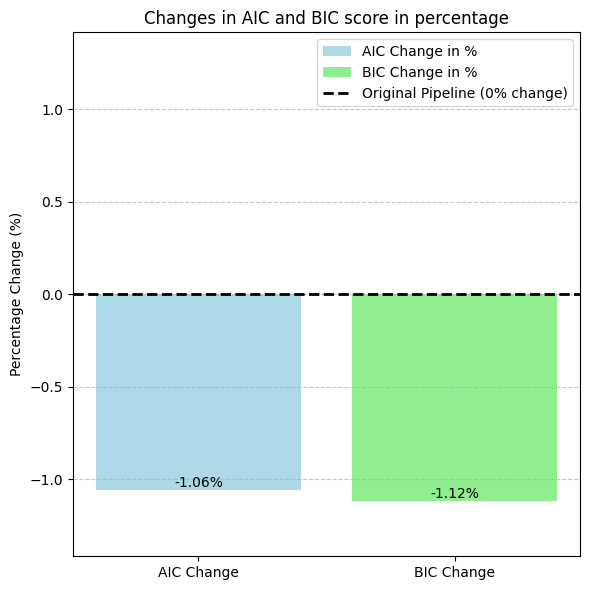

In [234]:
# Part 1: Computing the AIC and BIC for both the original and improved pipelines:
# Compute the MSE for both pipelines
mse_original = mean_squared_error(y_test, prediction_OriginalPipeline)
mse_improved = mean_squared_error(y_test, prediction_afterStep6)

# here i compute: n = number of samples, k = number of parameters
n = len(y_test)
k_original = X_train_OriginalPipeline.shape[1]
k_improved = X_train.shape[1]

# Compute the log-likelihood for both models
log_likelihood_original = -n / 2 * np.log(mse_original) - n / 2 * np.log(2 * np.pi)
log_likelihood_improved = -n / 2 * np.log(mse_improved) - n / 2 * np.log(2 * np.pi)

# Compute AIC and BIC for the original pipeline and for the improved pipeline:
aic_original = 2 * k_original - 2 * log_likelihood_original
bic_original = np.log(n) * k_original - 2 * log_likelihood_original
aic_improved = 2 * k_improved - 2 * log_likelihood_improved
bic_improved = np.log(n) * k_improved - 2 * log_likelihood_improved

# Print the AIC and BIC values
print(f"AIC for the Original Pipeline: {aic_original:.3f}")
print(f"BIC for the Original Pipeline: {bic_original:.3f}")
print(f"AIC for the Improved Pipeline: {aic_improved:.3f}")
print(f"BIC for the Improved Pipeline: {bic_improved:.3f}")


# Part 2: Plotting a graph comparing the percentage change in AIC and BIC:
# Compute the MSE for both pipelines
mse_original = mean_squared_error(y_test, prediction_OriginalPipeline)
mse_improved = mean_squared_error(y_test, prediction_afterStep6)

# here i compute: n = number of samples, k = number of parameters
n = len(y_test)
k_original = X_train_OriginalPipeline.shape[1]
k_improved = X_train.shape[1]

# Compute the log-likelihood for both models
log_likelihood_original = -n / 2 * np.log(mse_original) - n / 2 * np.log(2 * np.pi)
log_likelihood_improved = -n / 2 * np.log(mse_improved) - n / 2 * np.log(2 * np.pi)

# Computing AIC and BIC for the original pipeline and for the improved pipeline:
aic_original = 2 * k_original - 2 * log_likelihood_original
bic_original = np.log(n) * k_original - 2 * log_likelihood_original
aic_improved = 2 * k_improved - 2 * log_likelihood_improved
bic_improved = np.log(n) * k_improved - 2 * log_likelihood_improved

# Calculate percentage change
aic_change = ((aic_improved - aic_original) / aic_original) * 100
bic_change = ((bic_improved - bic_original) / bic_original) * 100

# Print the percentage change
print(f"Percentage change in AIC: {aic_change:.2f}%")
print(f"Percentage change in BIC: {bic_change:.2f}%")

# Plotting the graph:
plt.figure(figsize=(6, 6))
bars = plt.bar(['AIC Change', 'BIC Change'], [aic_change, bic_change], color=['lightblue', 'lightgreen'], label=['AIC Change in %', 'BIC Change in %'])
plt.title('Changes in AIC and BIC score in percentage')
plt.ylabel('Percentage Change (%)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
y_max = max(abs(aic_change), abs(bic_change))
plt.ylim(-y_max-0.3, y_max+0.3)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:.2f}%', ha='center', va='bottom')

# Adding a line representing the original pipeline (0% change)
ax = plt.gca()
ax.axhline(0, color='black', linewidth=2, linestyle='--', label='Original Pipeline (0% change)')

plt.legend()
plt.tight_layout()
plt.show()





<b><u>We can see that the original pipeline has higher (worse) AIC/BIC values, while the improved pipeline has lower (better) AIC/BIC values</u></b>. This aligns with the earlier results showing that the model with the new pipeline performs better than the original model.<br>
Thanks to the improvements performed throughout this work, including <b>removal of some features</b> and also Ordinal Encoding, some of the features which were previously One-Hot-Encoded (One-Hot-Encoding creates additional features per each category in that categorical feature, while Ordinal Encoding doesn't), this inherently reduces model complexity; <b>reduces the number of parameters (this is $k$ in the formula) in the model</b>, which results in better (smaller) AIC and BIC values.


----
# 4. Drawing Conclusions about the Data & Creative Applications:
### <b>Feature Significance</b>:
Let's recall the beeswarm plot of the SHAP values for the improved model, which we have analyzed above:


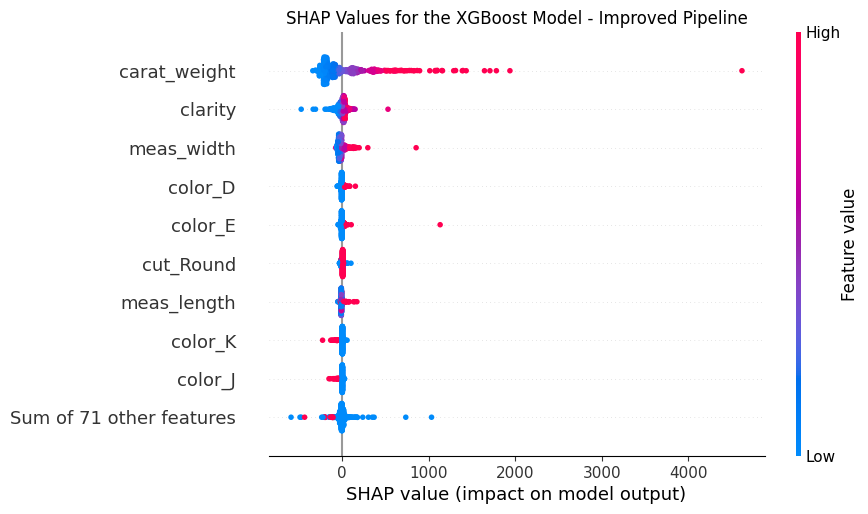

In [219]:
feature_names = xgb_model.feature_names_in_
shap_sample = X_train[feature_names].sample(500)

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer(shap_sample)

plt.title('SHAP Values for the XGBoost Model - Improved Pipeline')
shap.plots.beeswarm(shap_values)

<b><u>A clear visualization of the most influential features in the model</u></b>:<br>
We can also observe the <b><i>Summary Plot</i></b> of the SHAP values; this is a bar plot summarizing <u>the impact of the top features in the model</u>, based on their SHAP values:

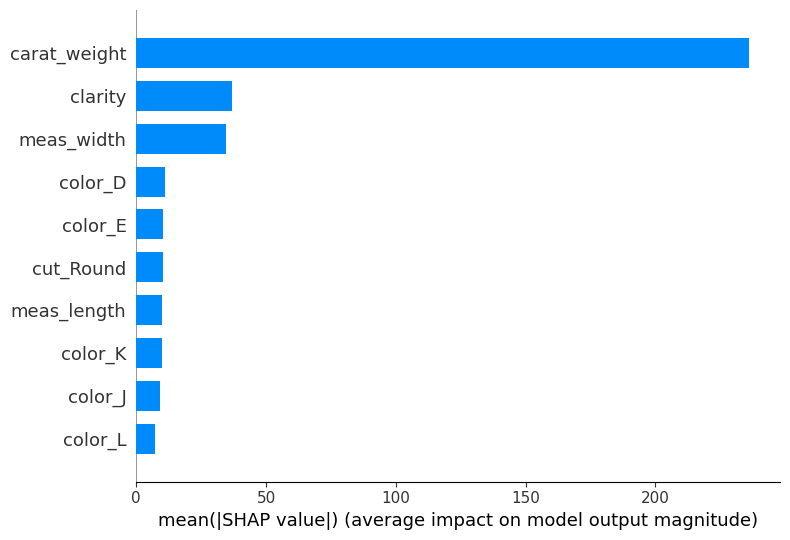

In [220]:
# Presenting the most influential features according to their SHAP values:
shap.summary_plot(shap_values, shap_sample, plot_type='bar', max_display=10)

In the SHAP <i>summary plot</i> above, each bar represents a feature, and the length of each of these bars corresponds to the <b>mean absolute SHAP value of that feature</b>.<br> Therefore, in fact, the length of each bar indicates the average magnitude of the impact that feature has on the model's predictions.<br><br>
<b>I have displayed above the top-10 most influential features; as can be observed below, the top-3 are</b>: 'carat_weight', 'meas_width' and 'clarity'.<br><br>
It is important to note that, not surprisingly, <b>the influence of the <i>'carat_weight'</i> feature on model's predictions is <u>significantly higher</u> than the influence of all the other features</b>. This observation is consistent with the high correlation of this feature with the target variable, as I have already noted during part 1 of this project (in the EDA section).

### <b>Biases or Trends</b>:
I have already showed above (in the 'Feature Importance' subsection) that while in the original model, the 'clarity' feature did <u>not</u> have such a significant impact on the model's predictions</b>, according to the beeswarm plot of the original model, after the feature engineering step, <b>the clarity feature became a prominent feature in the improved model</b>, showing right after the carat weight feature in the beeswarm plot. <b>As we saw, a prominent trend in model's predictions is that as the clarity level of the diamond improves, the model's prediction increases</b>.<br>
<b>In addition, we also saw there that the 'carat_weight' and 'meas_width' had similar effects on the diamond price predictions</b>; as their value increases, model's predictions increase as well.<br>Due to the similarity between these two subsections, in order not to make the notebook longer than necessary, I will not show again things we have already obserevd above; instead, I will show additional interesting findings:<br><br>
<b>Now, I will present a very interesting <i>bias</i> that I have observed, which practically shows the influence of a surprising specific characteristic of diamonds - a <u>negative effect on the predicted price</u></b>.<br>
While for example as we saw above it is expected and obvious that diamonds with better clarity level (such as 'Very Good') will be predicted with higher prices than diamonds with worse clarity levels, other categorical features don't have this inherent ordinal scale. In particular, <b>the <i>'cut'</i> feature</b> (not the 'cut_quality' feature, which describes an ordinal scale of quality) <b>contains various types of diamond cuts such as: 'Round', 'Oval', 'Heart', 'Radiant' etc</b>.<br>

While this feature doesn't have an inherent ordinal scale, we will see that a specific type of cut - the <i>'Heart'</i> cut - has a clear significant negative impact on the model's predictions. <b>To delve deeper into this matter, <u>let's observe the dependence plot of the shap values for the 'cut_Heart' feature</b></u>:

Dependence Plot for the Cut Heart Feature for the IMPROVED Pipeline:


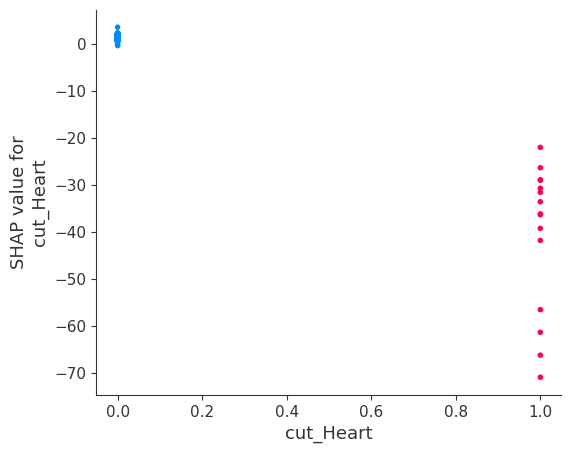

In [221]:
# Plotting a dependence plot for the 'cut_Heart' feature (for the improved pipeline)
print('Dependence Plot for the Cut Heart Feature for the IMPROVED Pipeline:')
shap.dependence_plot('cut_Heart', shap_values.values, shap_sample, interaction_index='cut_Heart')

As can be observed in the dependence plot above, we can clearly see that when the value of the 'cut_Heart' feature is 0 (meaning that the cut of the diamond is NOT 'Heart', but another type of cut, since this was One-Hot-Encoded), the shap values are mostly non-negative, with the vast majority of such diamonds having shap values above 0 (positive shap values). However, when the value of the 'cut_Heart' feature is 1 (<b>meaning that the cut of the diamond is indeed 'Heart'</b>, since this was One-Hot-Encoded), <b>the shap values are NEGATIVE, with absolutely no positive shap values</b>.<br><br>
<b>In other words, we can see that the model appears to have an <i>inverse</i> relationship with diamond with 'Heart' cut</b>; this indicates that this feature might be associated with a negative impact on the predicted diamond price.<br>

We can further understand this phenomenon by observing the dependence plot for another type of cut - 'Emerald', where we will see the opposite influence:

Dependence Plot for the Cut Emerald Feature for the IMPROVED Pipeline:


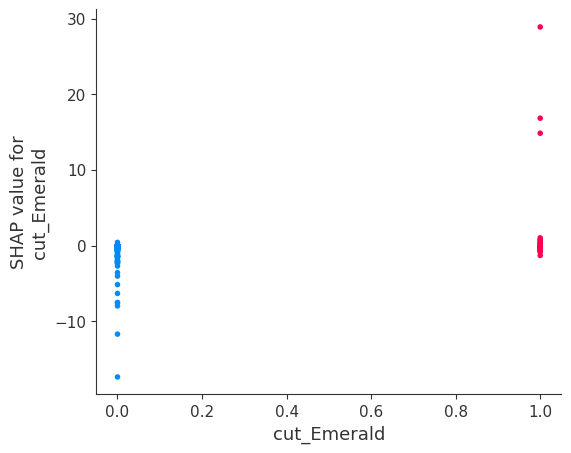

In [222]:
# Plotting a dependence plot for the 'cut_Emerald' feature (for the improved pipeline)
print('Dependence Plot for the Cut Emerald Feature for the IMPROVED Pipeline:')
shap.dependence_plot('cut_Emerald', shap_values.values, shap_sample, interaction_index='cut_Emerald')

As can be seen, <u>in contrast to the 'Heart' cut category</u>, which has lead the model to predict lower diamond prices, <b>we can see that both the 'Emerald' cut category lead the model to predict <i>higher</i> diamond prices</b>.<br>
In my opinion this is a very interesting trend to observe, as this bias reflects (at least from the model's "point of view") a social preference - prefering NOT to buy diamonds with 'Heart' cut (as the model believes this characteristic actually reduces diamond's price).<br>
This is the type of cut discussed:<br>
<center><img src="data/heart-diamond-cut.jpg" height="300"><br><br></center>
This observation would be very interesting to further investigate (as future work, as part of research in tangential knowledge areas), as there may be various reasons for this phenomenon:
<ul>
    <li>It is possible that some people dislike the heart shape, as it might be seen as overly romantic, or <b>less appropriate for everyday use</b>.</li>
    <li>Heart-shaped diamonds <b>may appear smaller</b> than other shapes of the same carat weight due to their figure.</li>
    <li>This is a very specific type of cut, and it is also possible that some people see it as <b><i>childish</i></b>.</li>
</ul>
<br>

Now, I will check whether there are identifiable patterns or biases in the residuals of the model:

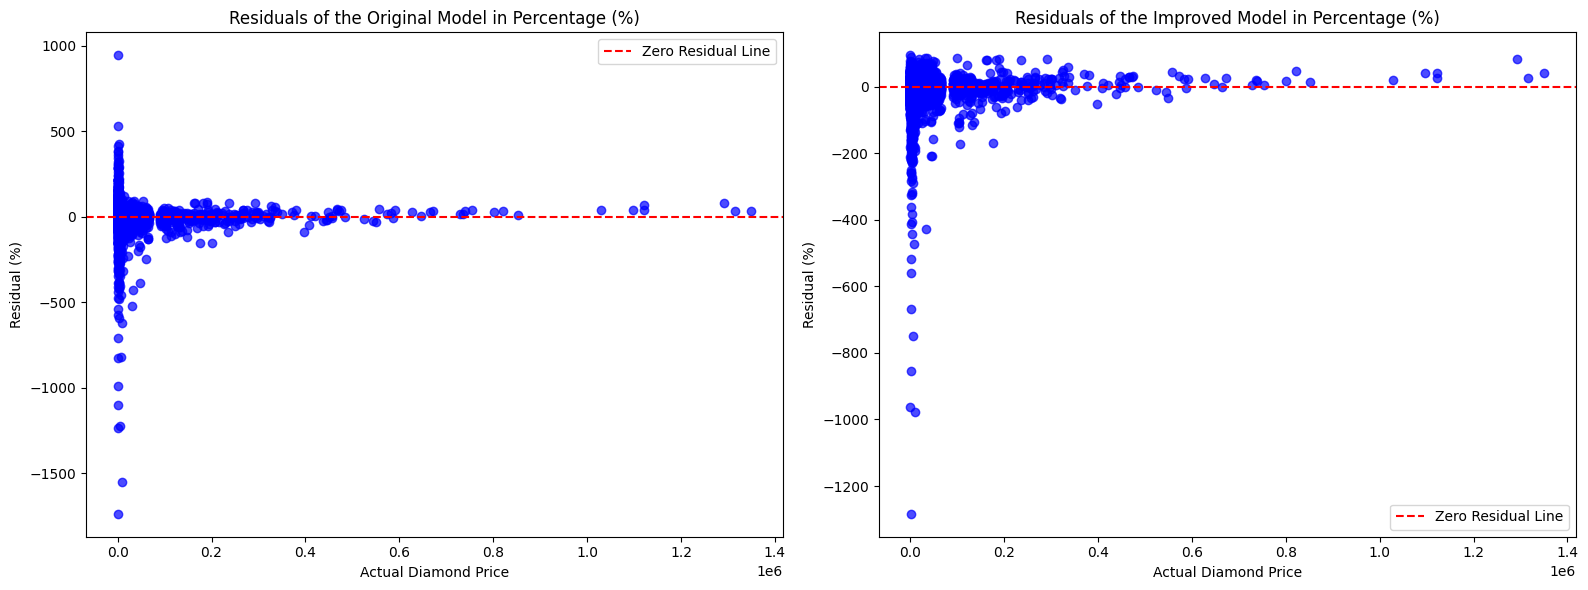

In [223]:
# Visualize residuals for the original model
residuals_original = y_test - prediction_OriginalPipeline
residualsInPercent_original = residuals_original / y_test * 100
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residualsInPercent_original, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Original Model in Percentage (%)')
plt.xlabel('Actual Diamond Price')
plt.ylabel('Residual (%)')
plt.legend()

# Visualize residuals for the improved model
residuals_improved = y_test - prediction_afterStep6
residualsInPercent_improved = residuals_improved / y_test * 100

plt.subplot(1, 2, 2)
plt.scatter(y_test, residualsInPercent_improved, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Improved Model in Percentage (%)')
plt.xlabel('Actual Diamond Price')
plt.ylabel('Residual (%)')
plt.legend()

plt.tight_layout()
plt.show()

As can be observed in the plots above, we can see that <u>the trend</u> for the residuals is that the residuals (in percentage) are more significant for cheaper diamonds; this trend remains true both for the original and the improved model.<br>
However, we can see that the improved model has very significantly limited the <i>positive residuals</i>; <b>while for the original model the positive residuals were up to almost 1000%</b> (which is a lot) and a significant portion was up to 450%, <b>for the improved model the positive residuals are limited to about 100%</b>. This is probably due to the non-linear transformation we have performed on the target variable during step 6 - non-linear transformations tend to affect the performance in a skewed mannar such that one side of the residuals becomes less dominant.<br>
It should also be noted that also <b>the <i>negative residuals</i> are also improved in the improved model</b>, but to a lesser extent.<br>

Let's observe an additional trend:

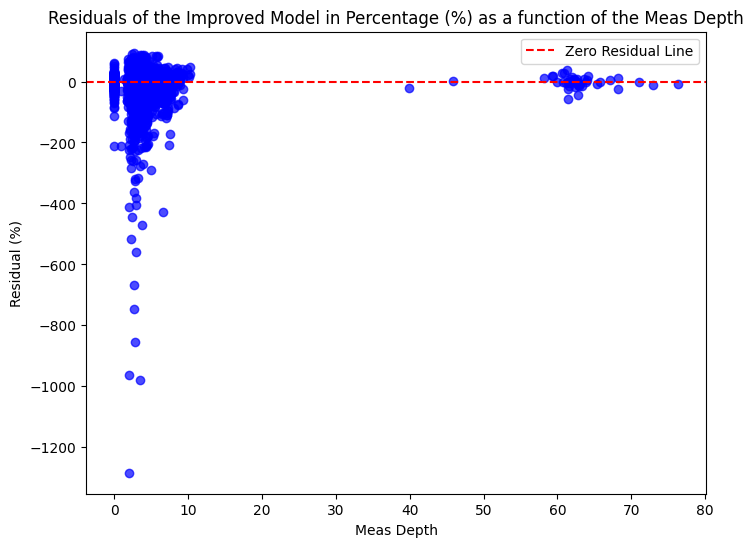

In [235]:
# Visualize residuals
residuals = y_test - prediction_afterStep6
residualsInPercent = residuals / y_test * 100
plt.figure(figsize=(8, 6))
plt.scatter(X_test['meas_depth'], residualsInPercent, alpha=0.7, color='blue')
plt.axhline(0, color='red', linestyle='--', label='Zero Residual Line')
plt.title('Residuals of the Improved Model in Percentage (%) as a function of the Meas Depth')
plt.xlabel('Meas Depth')
plt.ylabel('Residual (%)')
plt.legend()
plt.show()

As can be observed, the residuals are more significant for diamonds with lower 'meas_depth' value; in particular, we can see that the 'meas_depth' feature values are spread mainly within two distinct ranges:
<ul>
    <li>
        <b>Values between 0 to 10</b>: for these 'meas_depth' values, <b>the residuals are much <u><i>more</i> significant</u></b> - this means that the model performs worse (in percents) for diamonds with such 'meas_depth' values.
    </li>
    <li>
        <b>Values between approximately 60 to 80 (and also a few diamonds vith values around 40-50)</b>: for these 'meas_depth' values, the residuals are much <u><i>less</i> significant</u> - this means that the model performs better (in percents) for diamonds with such 'meas_depth' values.
    </li>
</ul>

This reveals an interesting pattern showing for diamonds with which characteristics the model performs better or worse.<br>

<b>Before moving on to presenting data insights, let's see a last trend I found very interesting</b>:

The average error percentage per polish level is:
polish
Poor         1.217435
Good         0.569714
Very Good    0.116905
Excellent    0.085793
Name: total_sales_price, dtype: float64


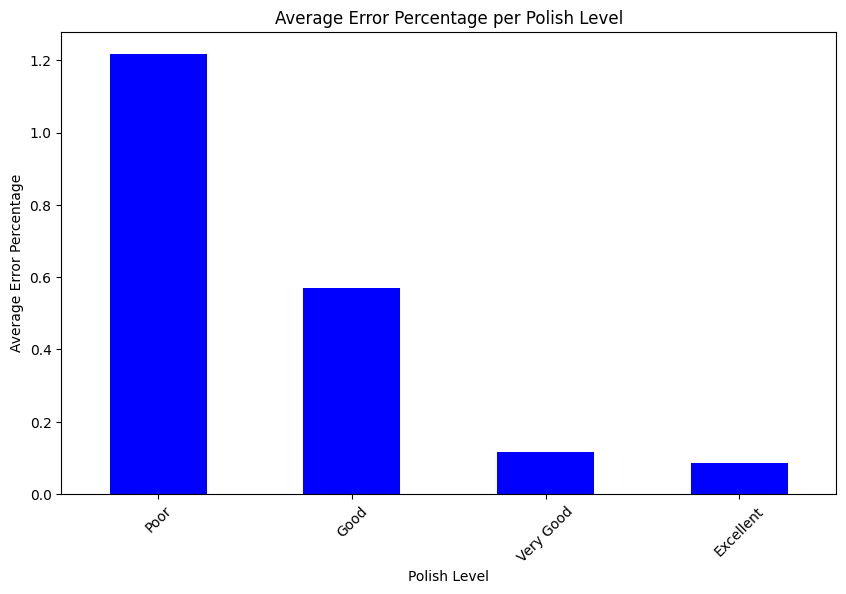

In [225]:
residuals = y_test - prediction_afterStep6
residualsInPercent = residuals / y_test * 100
rel_res = residuals / y_test
rel_res = rel_res.abs()

# presenting the average error percentage per diamonds for each polish level:
avg_error_per_polish = rel_res.groupby(dtf['polish']).mean()

# Sorting the average error percentage per polish level in descending order:
avg_error_per_polish = avg_error_per_polish.sort_values(ascending=False)

# Printing the average error percentage per polish level:
print("The average error percentage per polish level is:")
print(avg_error_per_polish)

# Visualizing the average error percentage per polish level:
plt.figure(figsize=(10, 6))
avg_error_per_polish.plot(kind='bar', color='blue')
plt.title('Average Error Percentage per Polish Level')
plt.xlabel('Polish Level')
plt.ylabel('Average Error Percentage')
plt.xticks(rotation=45)
plt.show()


As can be observed above, it is clear that the model performs better for diamonds with better polish levels; we can see that <b>when the diamond has one of the worst polish levels ('Poor' or 'Good'), the model predicts its price with a <u>much more significant error</u> (in %)</b>. However, <b>when the diamond has one of the best polish levels ('Very Good' or 'Excellent'), the model predicts its price with a <u>much smaller error</u> (in %)</b>. This also provides an interesting trend regarding the effect of a specific feature on model's performance.<br>

<b>Let's move on to present the most interesting data insights & surprising findings in this work</b>:

### <b>Data Insights</b>:
<b>In this subsection, I will elaborate on surprising findings:</b>
Without a doubt, I think that the most surprising findings, which resulted from the EDA & error analysis, are the two anomalies - <b>one related to the clarity level in general</b> and <b>the other related specifically to the <i>SI3</i> clarity level</b>; As elaborated in step 3 of improving the pipeline, where this issue was addressed, the initial finding that has raised a question was found in part 1 - where I presented a plot showing that <b>at first glance when analyzing the median diamond price per <i>clarity</i> level, it seems that for some reason the price decreases as the diamond's clarity level increases</b>.<br>
This finding was very strange, as according to several resources I have read to get familiar with how diamonds prices are evaluated, the carat weight of the diamond is the most meaningful parameter, but <b>the second most important parameter in real-life is the diamond's clarity level</b>.<br><br>

In other words, <b>the initial analyzation brought up a <u>contradicting</u> conclusion to what is known in real-life knowledge regarding the diamond industry</b>; this was not logical, as I chose a dataset decribing real diamonds. Therefore, I chose to address this question during visualization #3 in part 1 of the project; there, I showed that actually the analysis should be more complex - we shouldn't inspect the median price of diamonds per clarity level, but the median price <b><i>PER CARAT</i></b> of diamonds per clarity level:<br>


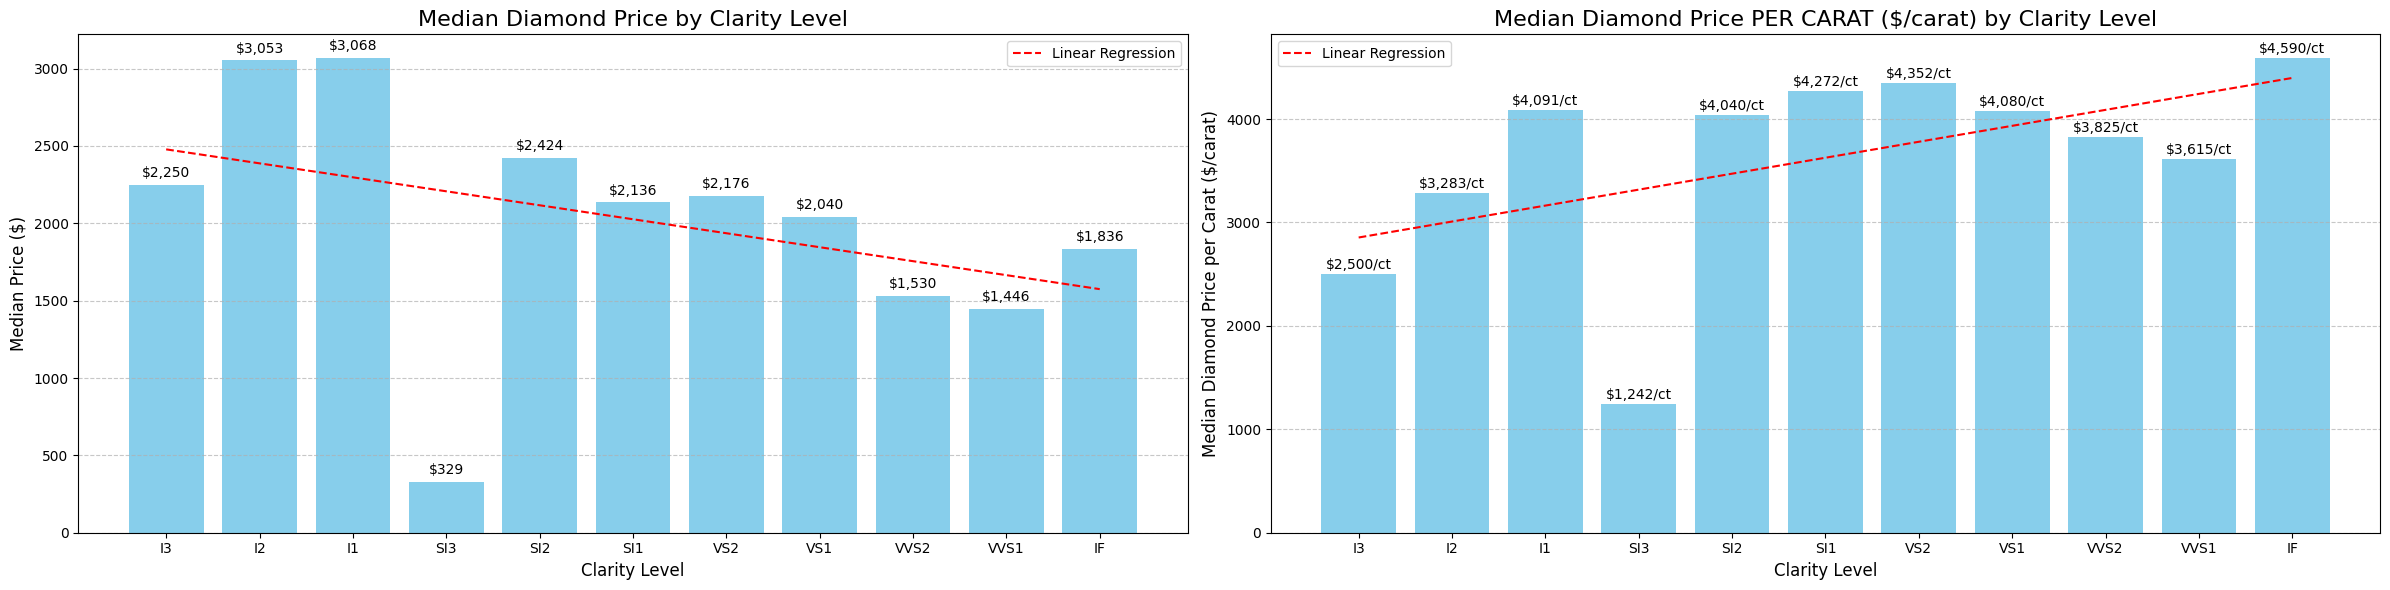

In [226]:
# Writing the order of diamond clarity from the worst to the best (according to the GIA scale, which I explained in part 1 of the project):
clarity_order = ['I3', 'I2', 'I1', 'SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']

# Now, I will calculate the median diamond prices for each clarity level:
clarity_medians = dtf.groupby('clarity')['total_sales_price'].median()
clarity_medians = clarity_medians.reindex(clarity_order)

# I will create a figure with the two subplots side by side, so I can compare between them:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 6))
fig.subplots_adjust(wspace=0.4)

# ALEF: I will plot the median diamond prices for each clarity level in the first subplot:
clarity_order = ['I3', 'I2', 'I1', 'SI3', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
ax1.bar(clarity_order, clarity_medians[clarity_order], color='skyblue')
ax1.set_title('Median Diamond Price by Clarity Level', fontsize=16)
ax1.set_xlabel('Clarity Level', fontsize=12)
ax1.set_ylabel('Median Price ($)', fontsize=12)

# To also see the actual values on top of each bar (the median diamond price for each clarity level):
for i, v in enumerate(clarity_medians[clarity_order]):
   ax1.text(i, v + 50, f'${v:,.0f}', ha='center', fontsize=10)

ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the linear regression line to the plot, to see the trend of the median diamond prices:
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(range(len(clarity_order)), clarity_medians[clarity_order])
x = np.array(range(len(clarity_order)))
ax1.plot(x, slope1*x + intercept1, color='red', linestyle='--', label='Linear Regression')
ax1.legend()

# Calculating the median carat weight for each clarity level:
carat_medians = dtf.groupby('clarity')['carat_weight'].median()
# VERY IMPORTANT STEP that took time to think- I normalize the prices (price per carat)!
normalized_medians = clarity_medians / carat_medians

# Second subplot - Normalized prices
ax2.bar(clarity_order, normalized_medians[clarity_order], color='skyblue')
ax2.set_title('Median Diamond Price PER CARAT ($/carat) by Clarity Level', fontsize=16)
ax2.set_xlabel('Clarity Level', fontsize=12)
ax2.set_ylabel('Median Diamond Price per Carat ($/carat)', fontsize=12)

# To also see the actual values on top of each bar (the median diamond price per carat for each clarity level):
for i, v in enumerate(normalized_medians[clarity_order]):
   ax2.text(i, v + 50, f'${v:,.0f}/ct', ha='center', fontsize=10)

ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the linear regression line to the plot, to see the trend of the median diamond prices per carat:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(range(len(clarity_order)), normalized_medians[clarity_order])
ax2.plot(x, slope2*x + intercept2, color='red', linestyle='--', label='Linear Regression')
ax2.legend()

plt.tight_layout()

# Show the plot
plt.show()


As shown in the plot above, when inspecting the price <i>PER CARAT</i>, the trend completely reverses! Indeed, <b>this way we can see that the median price PER CARAT increases as the diamond's clarity level increases, aligning with real-life guidelines in the diamond industry</b>.<br><br>
This was a prominent insight, and it is very interesting to understand that it also results from social preferences; actually there is a <b><i>trade-off</i></b> for the customer between diamonds with better clarity level, while having smaller carat_weight (or vice versa).</b>
<br><br>

The other very interesting insight related to the clarity level feature is specifically related to the <i>SI3</i> clarity level; I am not a professional in the diamond industry, and even after I did short research regarding evaluating prices of diamonds (as a background for this work), I didn't see any "warning" regarding the SI3 clarity level.<br>
However, as explained above during step 3 of improving the pipeline, when I inspected prices of diamonds per each clarity level (even when computing the price per carat), there was an unexplained anomaly related to the SI3 clarity level.<br>
<b>While the trend of increase in the price per carat as the clarity level improves was consistent and clear, for some reason, <u>diamonds classfied as having SI3 clarity level were much cheaper</u> than all the other clarity levels (as can be seen in the plot above).<br><br></b>
Therefore, I decided to delve into the subject, and after reading articles from professional websites regarding the diamond industry, it turns out that although this clarity level (SI3) has been introduced by the <i>European Gemological Laboratory (EGL)</i>, <b>it is NOT recognized globally as part of the GIA Diamond Grading Scale</b>, and <a href="https://willyou.com/buying-guides/4cs/clarity/si3"><b>considered "misleading for inexperienced shoppers"</b></a>. The SI3 clarity level is not part of the official GIA scale, and in fact, this clarity level is rarely used nor recognized, and this is also the situation in our dataset (as I presented during step 3 of improving the pipeline).
<br>
In addition, as explined earlier, we can observe a very interesting trend regarding the 'cut' feature: <b>it seems that having a <i>'Heart'</i> type of cut actually redcues the preicted price of diamonds</b>; As noted, this is very interesting, as this bias reflects (at least from the model's "point of view") a social preference - <b>prefering NOT to buy diamonds with 'Heart' cut</b> (as the model believes this characteristic actually reduces diamond's price).<br>
<br>
To conclude, it was very interesting to experience researching findings about the dataset, finding anomalies which don't align with real-life guidelines in the field, and then actually thanks to the anomalies found, find out real-life conclusion that aren't trivial and were not known even after the background research about the diamond industry.<br>

#### <b>Are specific features driving predictions more than expected?</b>
At the beginning of the work, based on background research about the diamond industry I expected that the top-2 most important features for determining the diamond price would be the carat_weight and clarity features; however, as explained in the <b>Feature Importance</b> subsection above, <b>when observing the SHAP values according to the <u>original pipeline</u>, while the carat_weight indeed had significant impact on model's predictions, the clarity feature was not used as important as we would expect it to be.</b><br>
This was very surprising, and somewhat contradicting real-life guidelines regarding diamond price evaluation. This also was problematic in terms of model interprebility, as in real-life it is known that clarity dramatically effects diamond prices, but it seemed not to be the case according to the original pipeline.<br><br>
However, thanks to the improvements made in step 3 of this work, as I showed above, <b>when observing the SHAP values according to the <u>improved pipeline</u>, we can see that indeed clarity level improvement has a very meaningful effect on the diamond price (after the carat_weight feature), as we expected at first</b>.<br>

In addition, we saw above (<b>according to <i>summary plot of the SHAP values</i></b>) that the <b>'meas_depth'</b> feature is the <u>8th most influential feature</u>, among the top-10 most influential features; this is also surprising and <u>wasn't expected</u>, as <b>according to the EDA process conducted in the 1st part of this project</b>, the correlation between this feature to the target variable was quite low (<b>having only 0.22 pearson correlation coefficient</b>).

<br>
I would also like to remind that, as we saw above, <b>it was quite surprising to find out that the 'Heart' category of the 'cut' feature actually makes the model predict lower prices</b>; as I noted above, this was really surprising, as on the contrary to features like 'cut_quality' which have inherent ordinal scale (e.g. 'Very Good', 'Excellent'), there was no reason to believe that this cut category would have such an effect on the model's predictions. Moreover, I would like to add that <b>there is no trivial explanation for this phenomenon, which we could perticipate beforehand, as the mean price of diamonds having 'Heart' cut category is <u>not</u> that low compared to the other cut categories</b>:



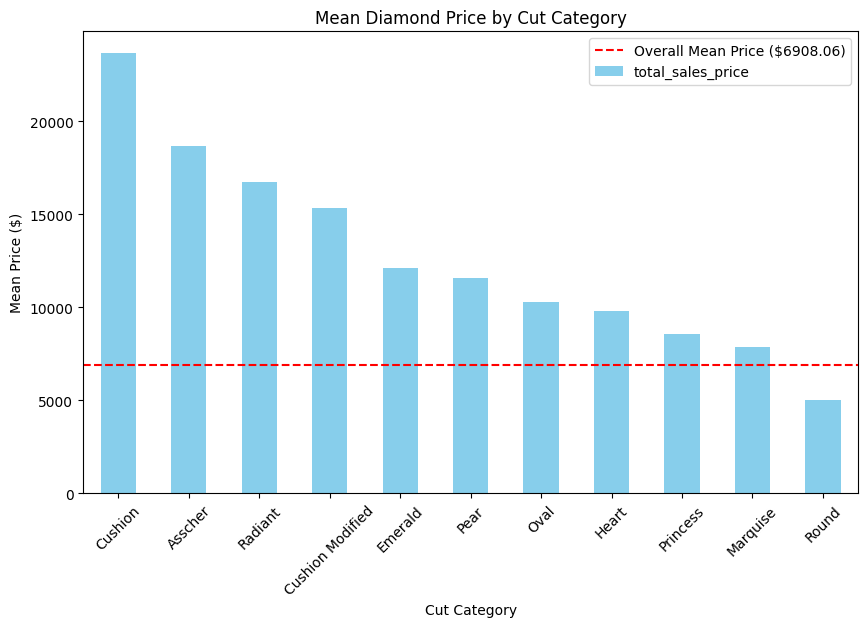

In [227]:
# Showing a graph with the mean diamond prices for each 'cut' category:
cut_means = dtf.groupby('cut')['total_sales_price'].mean()

# Sorting the mean diamond prices for each 'cut' category in descending order:
cut_means = cut_means.sort_values(ascending=False)

# Plotting the mean diamond prices for each 'cut' category:
plt.figure(figsize=(10, 6))
cut_means.plot(kind='bar', color='skyblue')
plt.title('Mean Diamond Price by Cut Category')
plt.xlabel('Cut Category')
plt.ylabel('Mean Price ($)')
plt.xticks(rotation=45)

# Adding a horizontal line for the overall mean price
overall_mean_price = dtf['total_sales_price'].mean()
plt.axhline(overall_mean_price, color='red', linestyle='--', label=f'Overall Mean Price (${overall_mean_price:.2f})')

plt.legend()
plt.show()


Therefore, it was quite surprising to see it had such an effect on model's predictions, driving predictions lower.

### <b>Potential Applications for the dataset & findings</b>:

One of the main reasons for which I chose the diamonds dataset is that it is <b>a real-world problem that is relevant to many people</b>; for example, different stakeholders that might be interested in using this model are:
<ol>
    <li>
        <b>"Simple" people, <u>non-professionals</u> in the diamond industry</b>: <u>almost 100% of the people around us have bought/will buy a diamond at some point in their lives</u> - whether it is a diamond ring, a diamond necklace etc., and for different occasions - engagement, wedding etc. Therefore, building a model which can accurately predict the price of a diamond based on its characteristics is a very valuable tool for many people.
    </li>
    <br>
    <li>
        <b>Moreover, this tool can be used also by <u>diamond traders</u></b>: today there is still a face-to-face negotiation process when buying or selling diamonds; for example, <a href="https://www.ynet.co.il/economy/article/hy9tvd7cc">in the Israel Diamond Exchange located at the Bursa in Ramat-Gan, there is still face-to-face trading of diamonds like it was throughout history around the world</a>. Having such a tool, which can instantly & accurately predict the price of a diamond based on its characteristics can be very useful for diamond traders.
    </li>
    <br>
    <li>
        <b>In addition, this tool can be used by <u>diamond manufacturers</u></b>, to predict the price of a diamond based on its characteristics, and to decide whether it is worth manufacturing a diamond with certain characteristics or not. They can also see if there are certain preferences in the market for certain diamond characteristics, and they can <b>adjust their manufacturing process accordingly</b>.
    </li>
</ol>
<br>

The main goal of this project was to build a machine learning model that can accurately predict the price of a diamond based on its characteristics. Therefore, I have invested many efforts in trying to identify problematic points where the model might be underestimating or overestimating the price of the diamonds, and I have tried to improve the model and address these issues.<br>

<b>Maybe <u>the most prominent example for such an issue</u>, that would have been very problematic if the model would have been used in real life, is the anomaly related to the <i>SI3 clarity level</i>, which I have identified and addressed in the 4th step of the pipeline.</b><br>
In a nutshell, as explained earlier, <b><u>the SI3 clarity level is NOT recognized globally</u></b>, and it is NOT part of the GIA clarity scale (although some labs still use this clarity scale, and classify diamonds they sell as having SI3 clarity level, instead of classifying them as having an inferior, GIA scale approved, clarity level). Therefore, it was crucial to address this issue and <b>make the contreversy regarding this clarity level be reflected in the model's predictions</b> - reducing the price of diamonds with SI3 clarity level (as what happens in real life).<br>
Otherwise, if the model would have been used in real life, a person using it, who isn't familiar with the diamond industry, <u>would have been misled</u> by the model's predictions, and would have overestimated the price of diamonds with SI3 clarity level.<br>
For example, I asked my family members and none of them knew that the SI3 clarity level is not recognized globally (they didn't buy a diamond with that clarity level, but they didn't know that SI3 is not recognized globally and weren't aware of the conreversy regarding it, so it is crucial that the model will detect such a problematic characteristic of a diamond). In other words, on top of the improvement of the model's performance, also "tiny" things like this can make a big difference in real-world applications.<br><br>

And, of course, when talking about useful applications for the model, we should bear in mind <i><u>its outstanding performance</u></i>:
<ul>
    <li><b>R^2</b> Score improved (increased) by <b>3.2%</b> (or even by <b>4.2%</b> without step 6, reachhing an R^2 score of <b>0.893</b>).</li>
    <li>Mean Absolute Percentage Error (<b>MAPE</b>) improved (decreased) by <b>-34.5%</b>.</li>
    <li>Mean Absolute Error (<b>MAE</b>) improved (decreased) by <b>-15.7%</b>.</li>
    <li>Root Mean Squared Error (<b>RMSE</b>) improved (decreased) by <b>-10.1%</b> (or even by <b>-13.5%</b> without step 6).</li>
</ul>
<b>Having a model with such a great performance is a great achievement, and may be very useful for many people in the real-world, thanks to precise predictions of the diamond prices based on their characteristics.</b>
